#  Vaccination Shot Prediction Using MAchine Learning

Objective is to perform a  classification of whether a person took the H1N1 vaccine or not.

# Data Collection

Data was collected from  Centers for Disease Control and Prevention (National Public Health Agency of the United States).<br>
The data contains  170 + features containing behaviour, knowledge, concern, opinion, demographics and health realted queries of the surveyee regarding H1N1 influenza virus.<br><br>
The data was collected from https://www.cdc.gov/nchs/nis/data_files_h1n1.htm

# Libraries used in Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, RocCurveDisplay, ConfusionMatrixDisplay

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import  RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import naive_bayes
from catboost import CatBoostClassifier
import xgboost as xgb

# Importing dataset

In [4]:
df = pd.read_csv("H1N1.CSV")

In [5]:
df.head()

,INT_MONTH,LANGUAGE,SAMP_DESIG,SEQNUMHH,SEQNUMP,SUBGROUP,VACC1_H1N1_M,VACC1_H1N1_T,VACC1_H1N1_Y,VACC1_SEAS_M,...,RACEETH4_I,RACE_I_R,RENT_OWN_R,SEX_I,CEN_REG,FLUWT,HHS_REGION,MSA3_I,MSA_DEF,STATE
0,OCT09,1,FR,38548,385481,A,NaN,NaN,NaN,NaN,...,3,1,2.0,2,4,213.304270,6,1,NOV 2008,35
1,OCT09,1,FR,18823,188231,A,NaN,NaN,NaN,10.0,...,4,3,2.0,2,2,5160.215000,5,2,NOV 2008,39
2,OCT09,1,FR,18823,188232,C,NaN,NaN,NaN,10.0,...,1,3,2.0,2,2,20235.802976,5,2,NOV 2008,39
3,NOV09,1,FR,54046,540461,A,NaN,NaN,NaN,10.0,...,3,1,1.0,2,4,804.891317,10,3,NOV 2008,16
4,OCT09,1,FR,21986,219861,A,NaN,NaN,NaN,NaN,...,3,1,1.0,2,4,2849.547713,10,1,NOV 2008,41


# Data summary

In [6]:
df.shape

(70944, 171)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70944 entries, 0 to 70943
Columns: 171 entries, INT_MONTH to STATE
dtypes: float64(153), int64(14), object(4)
memory usage: 92.6+ MB


In [8]:
df.describe()

,LANGUAGE,SEQNUMHH,SEQNUMP,VACC1_H1N1_M,VACC1_H1N1_T,VACC1_H1N1_Y,VACC1_SEAS_M,VACC1_SEAS_T,VACC1_SEAS_Y,VACC2_H1N1_M,...,Q95_OCCPN,RACEETH4_I,RACE_I_R,RENT_OWN_R,SEX_I,CEN_REG,FLUWT,HHS_REGION,MSA3_I,STATE
count,70944.000000,70944.000000,70944.000000,16076.000000,16838.000000,16076.000000,31024.000000,32153.000000,31024.000000,1755.000000,...,28693.000000,70944.000000,70944.000000,67213.000000,70944.000000,70944.000000,70944.000000,70944.000000,70944.000000,70944.000000
mean,1.045980,28306.569308,283066.894480,8.968649,1.162371,2009.198495,9.666001,1.055205,2009.040291,7.478063,...,12.941554,2.827681,1.238526,2.912026,1.571084,2.703837,4218.164806,5.353871,1.973951,28.630821
std,0.248418,16367.321043,163673.209285,3.814291,0.368802,0.398879,1.861818,0.228383,0.196645,4.807225,...,14.985142,0.656012,0.577033,12.568070,0.494925,1.032971,6977.696029,2.699119,0.741232,15.789905
min,1.000000,1.000000,11.000000,1.000000,1.000000,2009.000000,1.000000,1.000000,2009.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.030860,1.000000,1.000000,1.000000
25%,1.000000,14123.750000,141238.500000,9.000000,1.000000,2009.000000,9.000000,1.000000,2009.000000,2.000000,...,5.000000,3.000000,1.000000,1.000000,1.000000,2.000000,787.226497,3.000000,1.000000,16.000000
50%,1.000000,28293.500000,282936.000000,11.000000,1.000000,2009.000000,10.000000,1.000000,2009.000000,11.000000,...,10.000000,3.000000,1.000000,1.000000,2.000000,3.000000,2025.366299,5.000000,2.000000,29.000000
75%,1.000000,42499.250000,424993.500000,11.000000,1.000000,2009.000000,10.000000,1.000000,2009.000000,12.000000,...,17.000000,3.000000,1.000000,2.000000,2.000000,4.000000,4722.788381,8.000000,3.000000,42.000000
max,3.000000,56658.000000,566581.000000,12.000000,2.000000,2010.000000,12.000000,2.000000,2010.000000,12.000000,...,98.000000,4.000000,3.000000,99.000000,2.000000,4.000000,192422.453196,10.000000,3.000000,56.000000


In [9]:
df.columns

Index(['INT_MONTH', 'LANGUAGE', 'SAMP_DESIG', 'SEQNUMHH', 'SEQNUMP',
       'SUBGROUP', 'VACC1_H1N1_M', 'VACC1_H1N1_T', 'VACC1_H1N1_Y',
       'VACC1_SEAS_M',
       ...
       'RACEETH4_I', 'RACE_I_R', 'RENT_OWN_R', 'SEX_I', 'CEN_REG', 'FLUWT',
       'HHS_REGION', 'MSA3_I', 'MSA_DEF', 'STATE'],
      dtype='object', length=171)

# Features for Analysis

### As the data contains 171 columns but all are not related to behaviour and demographic thus we will remove the rest

### Columns that are to kept are related to following topics
- **BEHAVIORAL INDICATOR**
    - B_H1N1_ANTIV: TAKING ANTIVIRAL MEDICATIONS
    - B_H1N1_AVOID: AVOID CLOSE CONTACT WITH OTHERS WITH FLULIKE SYMPTOMS
    - B_H1N1_FMASK: BOUGHT A FACE MASK
    - B_H1N1_HANDS: WASHING HANDS
    - B_H1N1_LARGE: REDUCED TIME AT LARGE GATHERINGS
    - B_H1N1_RCONT: REDUCED CONTACT OUTSIDE THE HOME
    - B_H1N1_TOUCH: AVOID TOUCHING EYES, NOSE, OR MOUTH
- **OPINION**
    - HQ23: EFFECTIVENESS OF H1N1 VACCINE
    - HQ24: RISK OF GETTING SICK WITH H1N1 FLU WITHOUT VACCINE
    - HQ24_B: WORRY ABOUT GETTING SICK FROM THE H1N1 VACCINE
- **CONCERN**
    - CONCERN_DKNW_F: H1N1 CONCERN LEVEL UNKNOWN
    - CONCERN_NONE_F:NOT AT ALL CONCERNED ABOUT H1N1 FLU
    - CONCERN_NOTV_F:NOT VERY CONCERNED ABOUT H1N1 FLU
    - CONCERN_REFD_F:H1N1 CONCERN LEVEL REFUSED
    - CONCERN_SOME_F:SOMEWHAT CONCERNED ABOUT H1N1 FLU
    - CONCERN_VERY_F:VERY CONCERNED ABOUT H1N1 FLU
- **KNOWLEDGE**
    - KNOW_H1N1_ALOT_F: A LOT OF KNOWLEDGE ABOUT H1N1 FL
    - KNOW_H1N1_DKNW_F: KNOWLEDGE LEVEL ABOUT H1N1 FLU UNKNOWN
    - KNOW_H1N1_LITL_F: A LITTLE KNOWLEDGE ABOUT H1N1 FLU
    - KNOW_H1N1_NONE_F: NO KNOWLEDGE ABOUT H1N1 FLU
    - KNOW_H1N1_REFD_F: KNOWLEDGE LEVEL ABOUT H1N1 FLU REFUSED
- **VACC_H1N1_COUNT: NUMBER OF H1N1 FLU VACCINATIONS**
- **OTHERS**
    - DOCREC_H1N1_F: DOCTORS RECOMMENDATION FOR H1N1 VACCINE
    - INSURE: HAS HEALTH INSURANCE COVERAGE
    - HEALTH_WORKER_F: WORKS IN HEALTH CARE FIELD FLAG
    - CHRONIC_MED_F: CHRONIC MEDICAL CONDITION FLAG
    - PATIENT_CONTACT_F: DIRECT PATIENT CONTACT FLAG
    - CLOSE_UNDER6MO_F: CLOSE CONTACT WITH CHILD UNDER 6 MONTHS FLAG
    - AGEGRP: AGE GROUP
    - EDUCATION_COMP: ADULT SELF-REPORTED EDUCATION LEVEL
    - INC_CAT1: HOUSEHOLD INCOME CATEGORY
    - RENT_OWN_R: IS HOME RENTED OR OWNED
    - SEX_I: GENDER OF PERSON
    - MARITAL: MARITAL STATUS
    - RACE_I_R: RACE WITH MULTIRACE CATEGORY
    - Q95: WORK STATUS
    - Q95INDSTR: EMPLOYMENT INDUSTRY TYPE CODE
    - MSA3_I: 3-CATEGORY MSA STATUS
    - HHS_REGION: HHS SURVEILLANCE REGION NUMBER

In [10]:
columns_to_keep = [
    'B_H1N1_ANTIV', 'B_H1N1_AVOID', 'B_H1N1_FMASK', 'B_H1N1_HANDS', 'B_H1N1_LARGE',
    'B_H1N1_RCONT', 'B_H1N1_TOUCH', 'HQ23', 'HQ24', 'HQ24_B', 'CONCERN_DKNW_F',
    'CONCERN_NONE_F', 'CONCERN_NOTV_F', 'CONCERN_REFD_F', 'CONCERN_SOME_F', 'CONCERN_VERY_F',
    'KNOW_H1N1_ALOT_F', 'KNOW_H1N1_DKNW_F', 'KNOW_H1N1_LITL_F', 'KNOW_H1N1_NONE_F', 'KNOW_H1N1_REFD_F',
    'DOCREC_H1N1_F', 'INSURE', 'HEALTH_WORKER_F', 'CHRONIC_MED_F', 'PATIENT_CONTACT_F',
    'CLOSE_UNDER6MO_F', 'AGEGRP', 'EDUCATION_COMP', 'INC_CAT1', 'RENT_OWN_R',
    'SEX_I', 'MARITAL', 'RACE_I_R', 'Q95', 'Q95_INDSTR',
    'MSA3_I','HHS_REGION','VACC_H1N1_COUNT'
]

# Drop columns not in columns_to_keep
df = df[columns_to_keep]

In [11]:
df.shape

(70944, 39)

In [12]:
df.describe()

,B_H1N1_ANTIV,B_H1N1_AVOID,B_H1N1_FMASK,B_H1N1_HANDS,B_H1N1_LARGE,B_H1N1_RCONT,B_H1N1_TOUCH,HQ23,HQ24,HQ24_B,...,INC_CAT1,RENT_OWN_R,SEX_I,MARITAL,RACE_I_R,Q95,Q95_INDSTR,MSA3_I,HHS_REGION,VACC_H1N1_COUNT
count,56481.000000,56194.000000,56615.000000,56559.000000,56486.000000,56474.000000,56374.000000,56017.000000,55930.000000,55852.000000,...,55731.000000,67213.000000,70944.000000,53595.000000,70944.000000,53896.000000,28693.000000,70944.000000,70944.000000,70369.000000
mean,0.049433,0.726608,0.069257,0.825174,0.355203,0.338297,0.679764,15.781656,6.525478,3.481200,...,5.140353,2.912026,1.571084,1.466163,1.238526,2.527646,13.440874,1.973951,5.353871,0.267120
std,0.216771,0.445704,0.253893,0.379822,0.478579,0.473134,0.466571,29.368038,15.981437,6.449134,...,1.935466,12.568070,0.494925,0.498858,0.577033,7.786411,11.269766,0.741232,2.699119,0.499743
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,2.000000,...,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,1.000000,3.000000,0.000000
50%,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,2.000000,3.000000,3.000000,...,6.000000,1.000000,2.000000,1.000000,1.000000,1.000000,15.000000,2.000000,5.000000,0.000000
75%,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,4.000000,...,7.000000,2.000000,2.000000,2.000000,1.000000,3.000000,16.000000,3.000000,8.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,99.000000,99.000000,99.000000,...,7.000000,99.000000,2.000000,2.000000,3.000000,99.000000,98.000000,3.000000,10.000000,2.000000


# Data Cleaning

## 1.Checking null values

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70944 entries, 0 to 70943
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   B_H1N1_ANTIV       56481 non-null  float64
 1   B_H1N1_AVOID       56194 non-null  float64
 2   B_H1N1_FMASK       56615 non-null  float64
 3   B_H1N1_HANDS       56559 non-null  float64
 4   B_H1N1_LARGE       56486 non-null  float64
 5   B_H1N1_RCONT       56474 non-null  float64
 6   B_H1N1_TOUCH       56374 non-null  float64
 7   HQ23               56017 non-null  float64
 8   HQ24               55930 non-null  float64
 9   HQ24_B             55852 non-null  float64
 10  CONCERN_DKNW_F     56656 non-null  float64
 11  CONCERN_NONE_F     56656 non-null  float64
 12  CONCERN_NOTV_F     56656 non-null  float64
 13  CONCERN_REFD_F     56656 non-null  float64
 14  CONCERN_SOME_F     56656 non-null  float64
 15  CONCERN_VERY_F     56656 non-null  float64
 16  KNOW_H1N1_ALOT_F   566

## 2.Dropping rows having null values most of the features

In [14]:
# List of columns to check for null values
columns_to_check = ['CONCERN_DKNW_F', 'CONCERN_NONE_F', 'CONCERN_NOTV_F', 'CONCERN_REFD_F', 
                    'CONCERN_SOME_F', 'CONCERN_VERY_F', 'KNOW_H1N1_ALOT_F', 'KNOW_H1N1_DKNW_F', 
                    'KNOW_H1N1_LITL_F', 'KNOW_H1N1_NONE_F', 'KNOW_H1N1_REFD_F']

# Drop rows with null values in the specified columns
df = df.dropna(subset=columns_to_check, how='all')

In [15]:
df.isnull().sum()

B_H1N1_ANTIV           175
B_H1N1_AVOID           462
B_H1N1_FMASK            41
B_H1N1_HANDS            97
B_H1N1_LARGE           170
B_H1N1_RCONT           182
B_H1N1_TOUCH           282
HQ23                   639
HQ24                   726
HQ24_B                 804
CONCERN_DKNW_F           0
CONCERN_NONE_F           0
CONCERN_NOTV_F           0
CONCERN_REFD_F           0
CONCERN_SOME_F           0
CONCERN_VERY_F           0
KNOW_H1N1_ALOT_F         0
KNOW_H1N1_DKNW_F         0
KNOW_H1N1_LITL_F         0
KNOW_H1N1_NONE_F         0
KNOW_H1N1_REFD_F         0
DOCREC_H1N1_F         3081
INSURE               25808
HEALTH_WORKER_F       1725
CHRONIC_MED_F         2065
PATIENT_CONTACT_F     4526
CLOSE_UNDER6MO_F      1766
AGEGRP                   0
EDUCATION_COMP        3023
INC_CAT1             13299
RENT_OWN_R            3385
SEX_I                    0
MARITAL               3061
RACE_I_R                 0
Q95                   2760
Q95_INDSTR           27963
MSA3_I                   0
H

In [16]:
(df.isnull().sum() /  df.shape[0]) * 100

B_H1N1_ANTIV          0.308882
B_H1N1_AVOID          0.815448
B_H1N1_FMASK          0.072367
B_H1N1_HANDS          0.171209
B_H1N1_LARGE          0.300056
B_H1N1_RCONT          0.321237
B_H1N1_TOUCH          0.497741
HQ23                  1.127859
HQ24                  1.281418
HQ24_B                1.419091
CONCERN_DKNW_F        0.000000
CONCERN_NONE_F        0.000000
CONCERN_NOTV_F        0.000000
CONCERN_REFD_F        0.000000
CONCERN_SOME_F        0.000000
CONCERN_VERY_F        0.000000
KNOW_H1N1_ALOT_F      0.000000
KNOW_H1N1_DKNW_F      0.000000
KNOW_H1N1_LITL_F      0.000000
KNOW_H1N1_NONE_F      0.000000
KNOW_H1N1_REFD_F      0.000000
DOCREC_H1N1_F         5.438082
INSURE               45.552104
HEALTH_WORKER_F       3.044691
CHRONIC_MED_F         3.644804
PATIENT_CONTACT_F     7.988563
CLOSE_UNDER6MO_F      3.117057
AGEGRP                0.000000
EDUCATION_COMP        5.335710
INC_CAT1             23.473242
RENT_OWN_R            5.974654
SEX_I                 0.000000
MARITAL 

Columns 'INSURE', 'Q95_INDSTR' , 'INC_CAT1' contain too many NULL values

## 3.Droping columns having too many NULL values

In [17]:
# close to half the values of these columns are NULL so discarding
df.drop(['INSURE', 'Q95_INDSTR' , 'INC_CAT1'],axis=1,inplace = True)

## 4. Imputing Missing Values

In [18]:
df.nunique()

B_H1N1_ANTIV          2
B_H1N1_AVOID          2
B_H1N1_FMASK          2
B_H1N1_HANDS          2
B_H1N1_LARGE          2
B_H1N1_RCONT          2
B_H1N1_TOUCH          2
HQ23                  6
HQ24                  6
HQ24_B                6
CONCERN_DKNW_F        2
CONCERN_NONE_F        2
CONCERN_NOTV_F        2
CONCERN_REFD_F        2
CONCERN_SOME_F        2
CONCERN_VERY_F        2
KNOW_H1N1_ALOT_F      2
KNOW_H1N1_DKNW_F      2
KNOW_H1N1_LITL_F      2
KNOW_H1N1_NONE_F      2
KNOW_H1N1_REFD_F      2
DOCREC_H1N1_F         2
HEALTH_WORKER_F       2
CHRONIC_MED_F         2
PATIENT_CONTACT_F     2
CLOSE_UNDER6MO_F      2
AGEGRP                5
EDUCATION_COMP        4
RENT_OWN_R            4
SEX_I                 2
MARITAL               2
RACE_I_R              3
Q95                   5
MSA3_I                3
HHS_REGION           10
VACC_H1N1_COUNT       3
dtype: int64

In [19]:
MODE= [
    'B_H1N1_ANTIV', 'B_H1N1_AVOID', 'B_H1N1_FMASK', 'B_H1N1_HANDS', 'B_H1N1_LARGE',
    'B_H1N1_RCONT', 'B_H1N1_TOUCH', 'HQ23', 'HQ24', 'HQ24_B',
    'DOCREC_H1N1_F', 'HEALTH_WORKER_F', 'CHRONIC_MED_F', 'PATIENT_CONTACT_F',
    'CLOSE_UNDER6MO_F', 'SEX_I', 'MARITAL', 'RACE_I_R','VACC_H1N1_COUNT']


MEDIAN = ['AGEGRP', 'EDUCATION_COMP', 'RENT_OWN_R' ,'Q95']

for col in MODE:
    if df[col].isnull().sum():
        df[col].loc[(df[col].isnull())] = df[col].mode().max()
        
for col in MEDIAN:
    if df[col].isnull().sum():
        df[col].loc[(df[col].isnull())] = df[col].median()

### Sanity Check 

In [20]:
df.isnull().sum()

B_H1N1_ANTIV         0
B_H1N1_AVOID         0
B_H1N1_FMASK         0
B_H1N1_HANDS         0
B_H1N1_LARGE         0
B_H1N1_RCONT         0
B_H1N1_TOUCH         0
HQ23                 0
HQ24                 0
HQ24_B               0
CONCERN_DKNW_F       0
CONCERN_NONE_F       0
CONCERN_NOTV_F       0
CONCERN_REFD_F       0
CONCERN_SOME_F       0
CONCERN_VERY_F       0
KNOW_H1N1_ALOT_F     0
KNOW_H1N1_DKNW_F     0
KNOW_H1N1_LITL_F     0
KNOW_H1N1_NONE_F     0
KNOW_H1N1_REFD_F     0
DOCREC_H1N1_F        0
HEALTH_WORKER_F      0
CHRONIC_MED_F        0
PATIENT_CONTACT_F    0
CLOSE_UNDER6MO_F     0
AGEGRP               0
EDUCATION_COMP       0
RENT_OWN_R           0
SEX_I                0
MARITAL              0
RACE_I_R             0
Q95                  0
MSA3_I               0
HHS_REGION           0
VACC_H1N1_COUNT      0
dtype: int64

In [21]:
df.shape

(56656, 36)

# Target Variable

Creating the target variable H1N1_TAKEN from VACC_H1N1_COUNT

In [22]:
df.VACC_H1N1_COUNT.value_counts()

0.0    44736
1.0    11506
2.0      414
Name: VACC_H1N1_COUNT, dtype: int64

In [23]:
df['H1N1_TAKEN'] = df['VACC_H1N1_COUNT'].map({0.0: 0, 1.0: 1, 2.0: 1})

In [24]:
df.H1N1_TAKEN.value_counts(normalize=True)   # class imbalance problem

0    0.789607
1    0.210393
Name: H1N1_TAKEN, dtype: float64

In [25]:
df.drop('VACC_H1N1_COUNT',axis=1,inplace = True)

In [26]:
df.shape

(56656, 36)

## 3. Exploratory Data Analysis and Visualizations

Firstly Analyzing the number of people who took vaccine and not

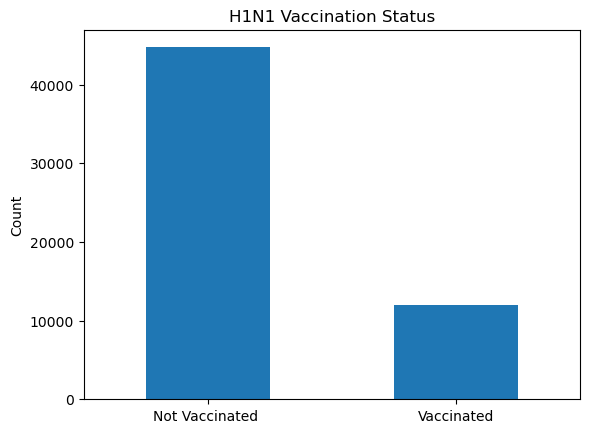

In [27]:
# Graph for relationship between H1N1 vaccination status
df.H1N1_TAKEN.value_counts().plot.bar()
plt.title('H1N1 Vaccination Status')
plt.ylabel('Count')
plt.xticks([0,1],['Not Vaccinated ', 'Vaccinated'], rotation = 0)
plt.show()

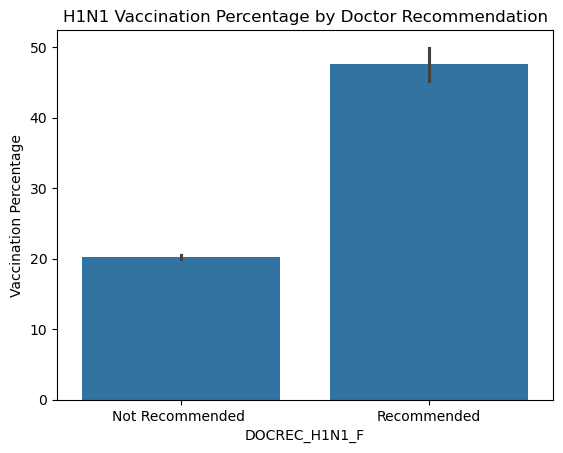

In [28]:
# Graph for relationship between H1N1 vaccination and Doctor recommendation
sns.barplot(x=df['DOCREC_H1N1_F'], y=df['H1N1_TAKEN']*100)
plt.title('H1N1 Vaccination Percentage by Doctor Recommendation')
plt.xticks([0,1],['Not Recommended ', 'Recommended'], rotation = 0)
plt.ylabel('Vaccination Percentage')
plt.show()

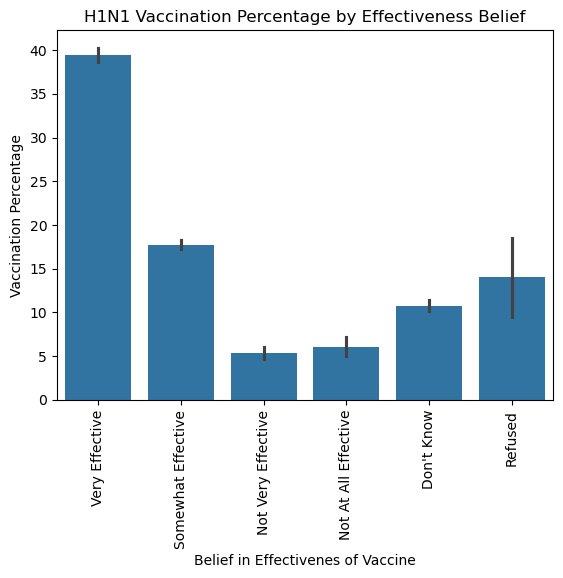

In [29]:
# Graph for vaccine percentage differrentiation depending on opinion of effectiveness of H1N1 Vaccine
sns.barplot(x=df['HQ23'], y=df['H1N1_TAKEN']*100)
plt.xlabel('Belief in Effectivenes of Vaccine')
plt.ylabel('Vaccination Percentage')
plt.title('H1N1 Vaccination Percentage by Effectiveness Belief')
plt.xticks([0,1,2,3,4,5],["Very Effective", "Somewhat Effective", "Not Very Effective", "Not At All Effective", "Don't Know", "Refused"], rotation = 90)

plt.show()


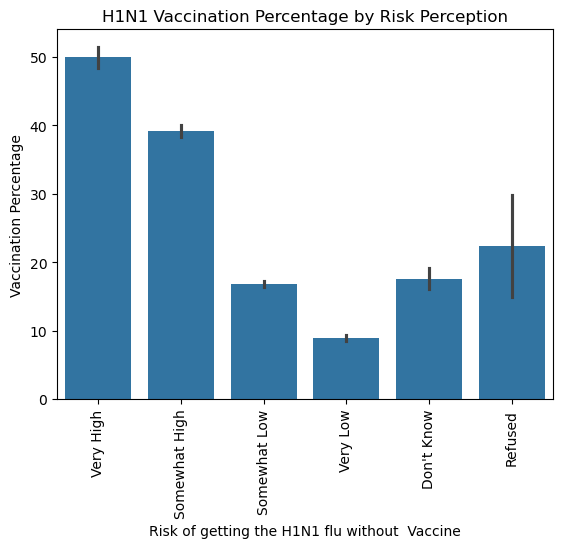

In [30]:
# Risk graph exploring vaccine percentage depending on risk perception of H1N1
sns.barplot(x=df['HQ24'], y=df['H1N1_TAKEN']*100)
plt.xlabel('Risk of getting the H1N1 flu without  Vaccine')
plt.ylabel('Vaccination Percentage')
plt.title('H1N1 Vaccination Percentage by Risk Perception')
plt.xticks([0,1,2,3,4,5],["Very High", "Somewhat High", "Somewhat Low", "Very Low", "Don't Know", "Refused"], rotation = 90)

plt.show()

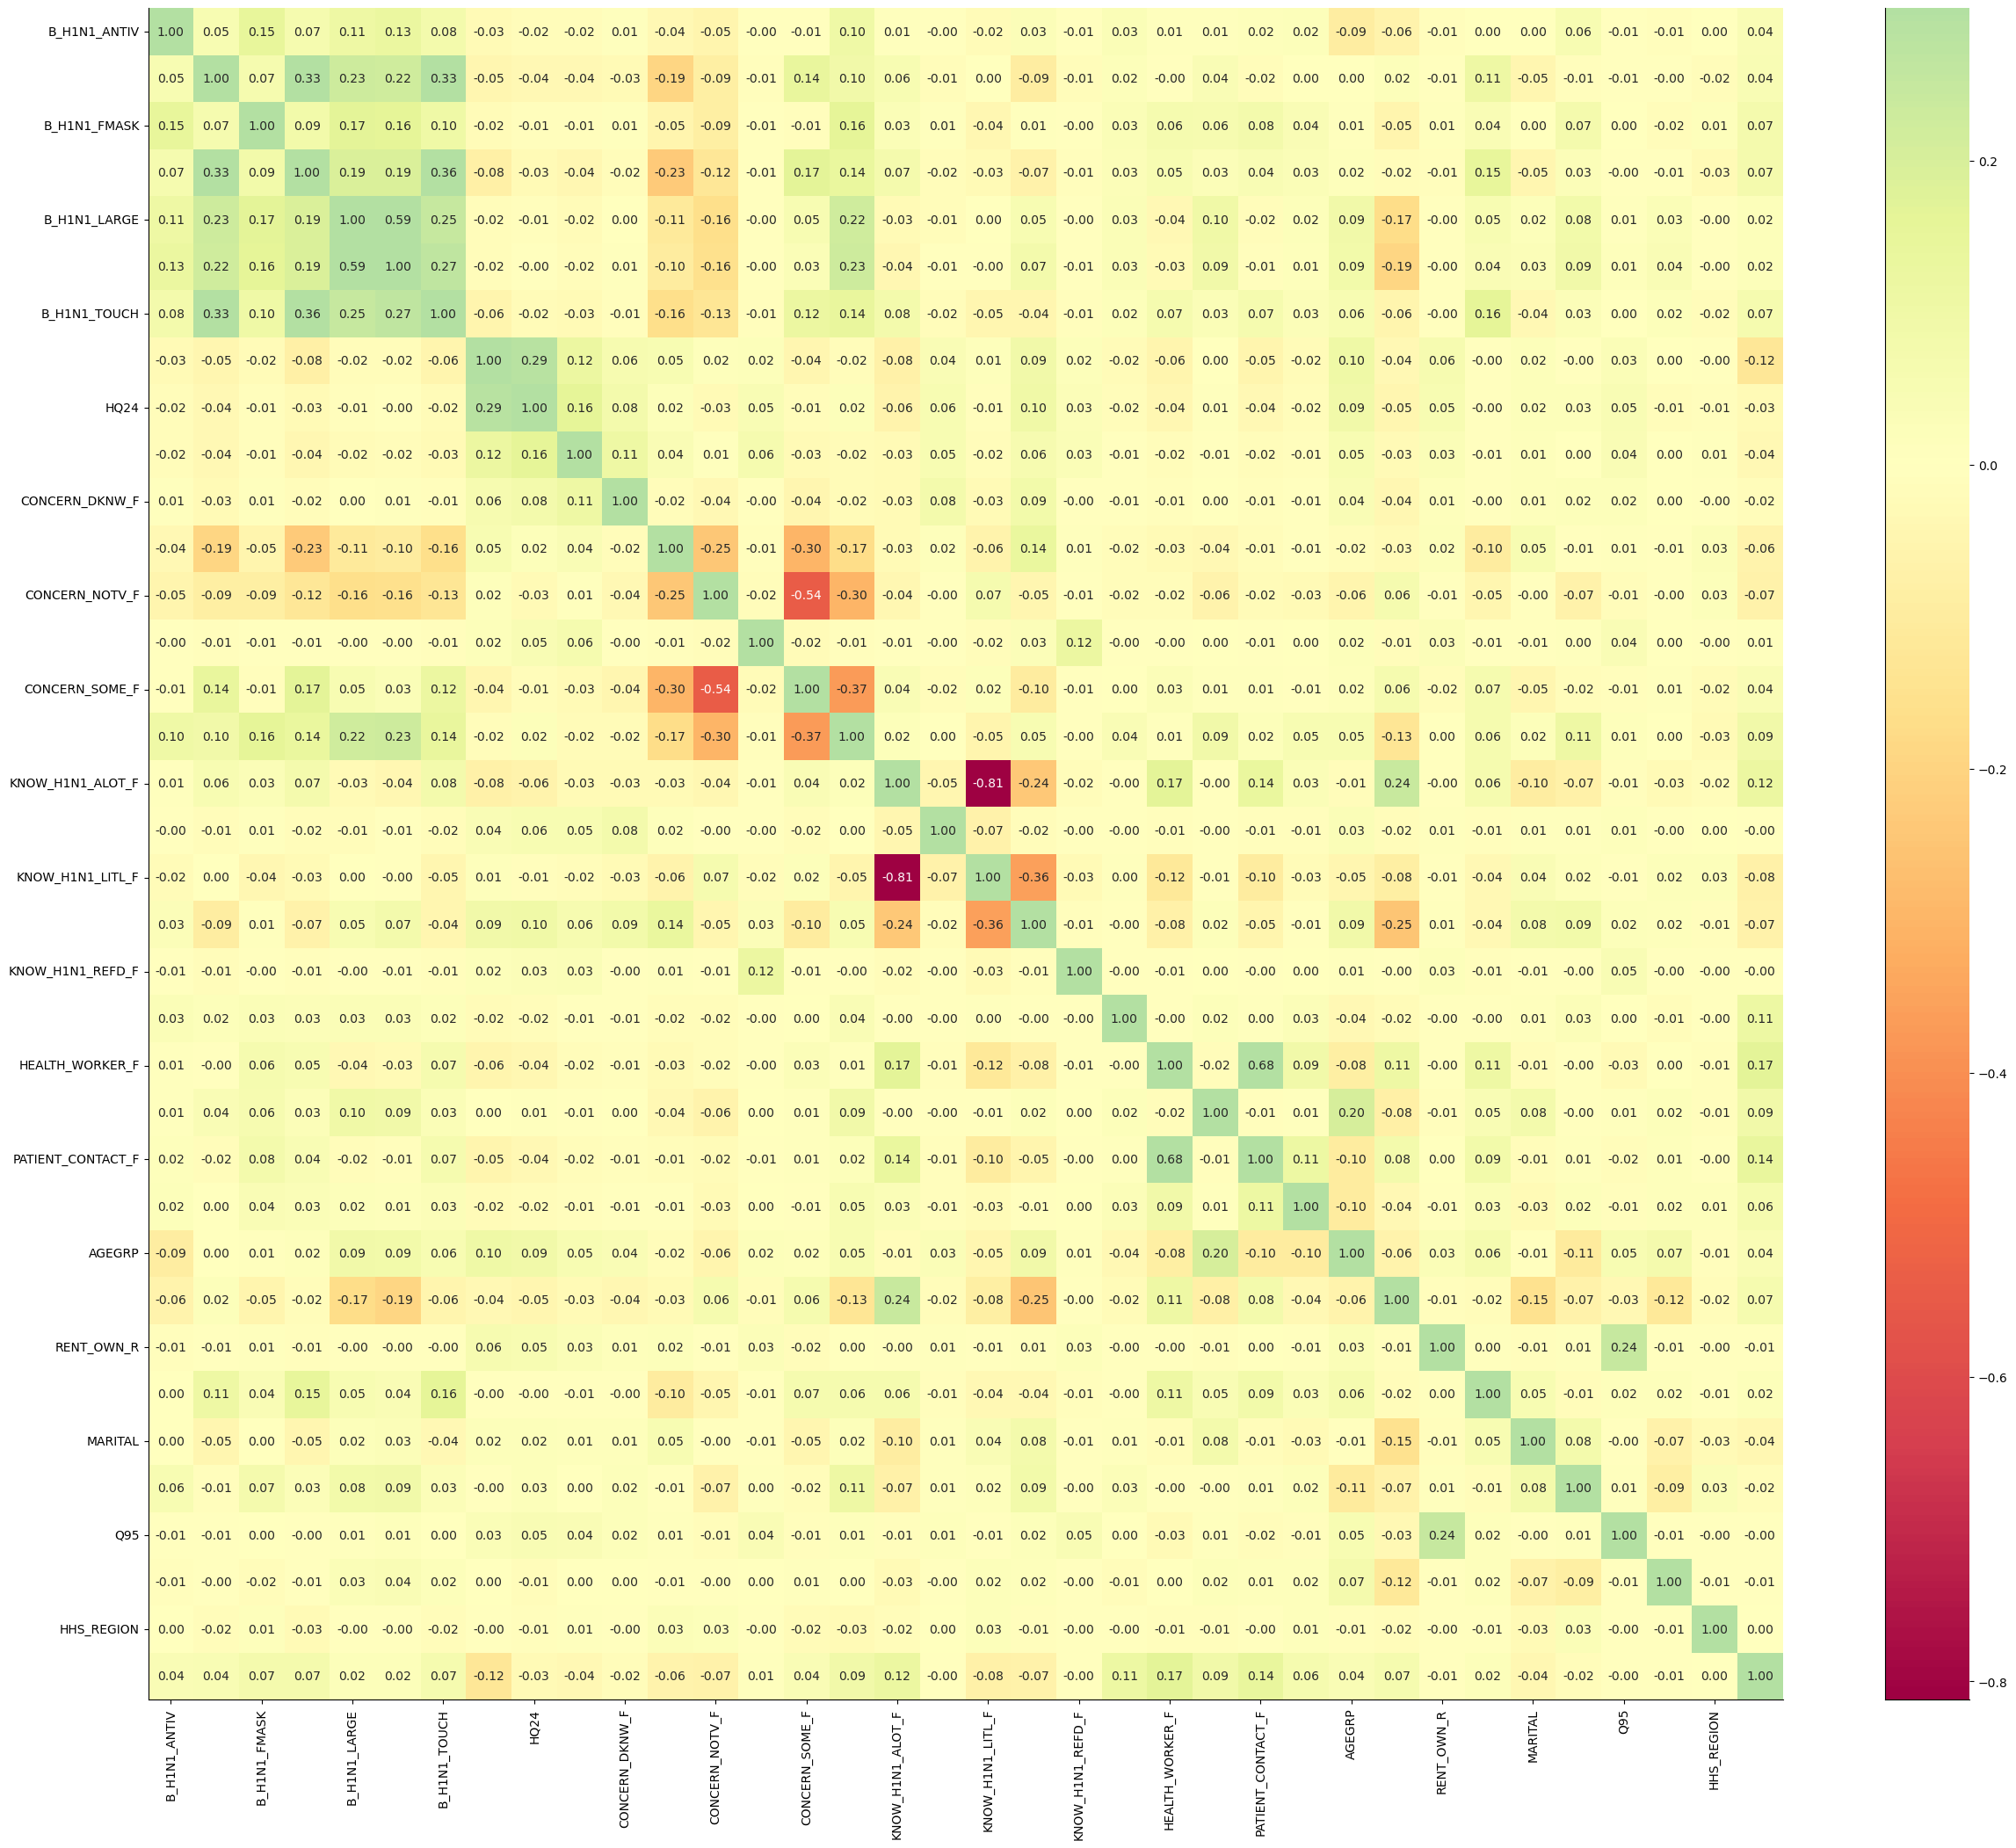

In [31]:
# Plotting Correlation Maps of the Features
g = sns.heatmap(df.corr(),  vmax=.3, center=0,  annot=True, fmt='.2f', cmap='Spectral')
sns.despine()
g.figure.set_size_inches(30,25)
plt.show()

# Data Preprocessing

In [32]:
X = df.drop(columns = ['H1N1_TAKEN'], axis=1)
y = df['H1N1_TAKEN']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [34]:
scaler= MinMaxScaler()  # Scaling the numbers by MinMaxScaler

In [35]:
X_train = scaler.fit_transform(X_train)

In [36]:
X_train.shape

(45324, 35)

In [37]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.010204,0.010204,0.010204,...,0.0,0.50,0.666667,0.0,1.0,1.0,1.0,0.0,1.0,0.888889
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.010204,0.010204,0.030612,...,0.0,0.50,1.000000,0.0,0.0,0.0,0.0,0.0,0.5,0.444444
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.000000,1.000000,1.000000,...,0.0,0.75,1.000000,0.0,0.0,1.0,0.0,0.0,0.5,0.333333
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.010204,0.020408,0.020408,...,0.0,0.00,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.020408,0.020408,0.020408,...,0.0,0.00,1.000000,0.0,0.0,1.0,0.0,0.0,0.5,0.777778


In [38]:
X_test = scaler.transform(X_test)

In [39]:
X_test.shape

(11332, 35)

In [40]:
pd.DataFrame(X_test).head()

,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,34
0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.010204,0.010204,0.010204,...,1.0,0.25,1.0,0.000000,1.0,0.0,0.5,0.0,0.0,0.444444
1,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.010204,0.030612,0.030612,...,0.0,1.00,1.0,0.000000,1.0,0.0,0.0,0.0,0.5,0.333333
2,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.020408,0.020408,...,0.0,0.50,1.0,0.000000,1.0,0.0,0.0,0.0,0.5,0.333333
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.775510,0.030612,0.020408,...,0.0,0.00,0.0,0.010204,0.0,0.0,0.0,0.0,0.5,0.333333
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.010204,0.030612,0.030612,...,0.0,0.50,0.0,0.000000,0.0,0.0,0.0,0.0,0.5,0.777778


# Model evaluation

In [41]:
def evaluate(model, X_train, X_test, y_train, y_test):
    
    #  predictions
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    
    x=round(accuracy_score(y_test, test_pred),4)
    
    print("Training Scores:")
    print("Train Accuracy --->",accuracy_score(y_train, train_pred))
    print("Train Precision --->",precision_score(y_train, train_pred))
    print("Train Recall --->",recall_score(y_train, train_pred))
    print("Train F1_Score --->",f1_score(y_train, train_pred))
    print("")
    
    print("Testing Scores:")
    print("Test Accuracy --->",accuracy_score(y_test, test_pred))
    print("Test Precision --->",precision_score(y_test, test_pred))
    print("Test Recall --->",recall_score(y_test, test_pred))
    print("Test F1_Score --->",f1_score(y_test, test_pred))
    
    return x



### MODEL 1: logistic regression

In [42]:
logreg = LogisticRegression(random_state=42)

# Fitting the logistic regression model on the training data
logreg.fit(X_train, y_train)

# Evaluating the logistic regression for various metrics
logreg_score=evaluate(logreg, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.7944135557320625
Train Precision ---> 0.5638921453692849
Train Recall ---> 0.10088087248322147
Train F1_Score ---> 0.1711439245685821

Testing Scores:
Test Accuracy ---> 0.796240734204024
Test Precision ---> 0.5921375921375921
Test Recall ---> 0.10109060402684564
Test F1_Score ---> 0.17269795772124685


### MODEL 2: Decision Tree Classifier

In [43]:
dtc = DecisionTreeClassifier()

# fitting the model to the training data
dtc.fit(X_train, y_train)

# Evaluating the decision tree model for various metrics
dtc_score=evaluate(dtc, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.9991615920924897
Train Precision ---> 1.0
Train Recall ---> 0.996015100671141
Train F1_Score ---> 0.9980035725543763

Testing Scores:
Test Accuracy ---> 0.7252912107306742
Test Precision ---> 0.3588850174216028
Test Recall ---> 0.3888422818791946
Test F1_Score ---> 0.3732635393597745


### MODEL 3: Extra Tree Classifier 

In [44]:
ext =  ExtraTreeClassifier(random_state=42)

# fitting the  Extra Tree model to the training data
ext.fit(X_train, y_train)

# Evaluate the  Extra Tree  model for various metrics
ext_score=evaluate(ext, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.9991615920924897
Train Precision ---> 1.0
Train Recall ---> 0.996015100671141
Train F1_Score ---> 0.9980035725543763

Testing Scores:
Test Accuracy ---> 0.7214084009883516
Test Precision ---> 0.3374000841396719
Test Recall ---> 0.33640939597315433
Test F1_Score ---> 0.33690401176223483


### MODEL 4: Random Forest Classifier

In [45]:
rfc = RandomForestClassifier(random_state=42)

# Fitting the random forest model to the training data
rfc.fit(X_train, y_train)

# Evaluating various metrics of the random forest classifier
rfc_score=evaluate(rfc, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.9991174653605154
Train Precision ---> 0.9992639327024185
Train Recall ---> 0.9965394295302014
Train F1_Score ---> 0.9978998214848263

Testing Scores:
Test Accuracy ---> 0.812124955877162
Test Precision ---> 0.6217765042979942
Test Recall ---> 0.27307046979865773
Test F1_Score ---> 0.3794812008160886


### MODEL 5: Bernoulli Naive Bayes Classifier 

In [46]:
bnb = naive_bayes.BernoulliNB()

# fitting the  Bernoulli Naive Bayes model to the training data
bnb.fit(X_train, y_train)

# Evaluate the  Bernoulli Naive Bayes  model for various metrics
bnb_score=evaluate(bnb, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.7836686964963375
Train Precision ---> 0.48078296899557077
Train Recall ---> 0.352873322147651
Train F1_Score ---> 0.4070154218324766

Testing Scores:
Test Accuracy ---> 0.779562301447229
Test Precision ---> 0.46779661016949153
Test Recall ---> 0.34731543624161076
Test F1_Score ---> 0.3986519017814155


### MODEL 6: Gaussian Naive Bayes Classifier 

In [47]:
gnb = naive_bayes.GaussianNB()

# fitting the  Gaussian Naive Bayes model to the training data
gnb.fit(X_train, y_train)

# Evaluate the  Gaussian Naive Bayes  model for various metrics
gnb_score=evaluate(gnb, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.710285941223193
Train Precision ---> 0.3589864281791794
Train Recall ---> 0.4798657718120805
Train F1_Score ---> 0.4107166898532514

Testing Scores:
Test Accuracy ---> 0.7134662901517825
Test Precision ---> 0.3636650868878357
Test Recall ---> 0.4828020134228188
Test F1_Score ---> 0.41484952243647505


### MODEL 7: kNN Classifier

In [48]:
kNN = KNeighborsClassifier()

# Fitting the KNN model to the training data
kNN.fit(X_train, y_train)

# evaluating the KNN model for various metrics
kNN_score=evaluate(kNN, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8222795869737887
Train Precision ---> 0.6719294172277688
Train Recall ---> 0.3034815436241611
Train F1_Score ---> 0.41811746008813117

Testing Scores:
Test Accuracy ---> 0.7672079068125662
Test Precision ---> 0.3788167938931298
Test Recall ---> 0.16652684563758388
Test F1_Score ---> 0.23135198135198135


### MODEL 8: Gradient Boosting Classifier

In [49]:
gbc =  GradientBoostingClassifier(random_state=42)

# Fitting the gradient boosting classifier to the training data
gbc.fit(X_train, y_train)

# Evaluate the gradient boosting model for various metrics
gbc_score=evaluate(gbc, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8211102285764716
Train Precision ---> 0.6645161290322581
Train Recall ---> 0.3024328859060403
Train F1_Score ---> 0.4156817526664745

Testing Scores:
Test Accuracy ---> 0.817949170490646
Test Precision ---> 0.6442048517520216
Test Recall ---> 0.30075503355704697
Test F1_Score ---> 0.4100657706605662


### MODEL 9: XG Boosting Classifier

In [50]:
xg = xgb.XGBClassifier(random_state=42)

# fitting the xg boosting model to the training data
xg.fit(X_train, y_train)

# Evaluate the gradient boosting model for various metrics
xg_score=evaluate(xg, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8587723943164769
Train Precision ---> 0.7865106927435569
Train Recall ---> 0.45123741610738255
Train F1_Score ---> 0.5734657159992004

Testing Scores:
Test Accuracy ---> 0.8159195199435227
Test Precision ---> 0.6142638036809815
Test Recall ---> 0.33598993288590606
Test F1_Score ---> 0.4343817787418655


### MODEL 10: Cat Boosting Classifier

In [51]:
# Setting up the Cat Boosting model to go through the pipeline
cb = CatBoostClassifier()

# fitting the Cat Boosting  model to the training data
cb.fit(X_train, y_train)

Learning rate set to 0.052503
0:	learn: 0.6626502	total: 145ms	remaining: 2m 25s
1:	learn: 0.6356531	total: 153ms	remaining: 1m 16s
2:	learn: 0.6124511	total: 159ms	remaining: 52.9s
3:	learn: 0.5908749	total: 166ms	remaining: 41.2s
4:	learn: 0.5728137	total: 172ms	remaining: 34.1s
5:	learn: 0.5569954	total: 178ms	remaining: 29.4s
6:	learn: 0.5433869	total: 183ms	remaining: 25.9s
7:	learn: 0.5311204	total: 189ms	remaining: 23.5s
8:	learn: 0.5197012	total: 196ms	remaining: 21.6s
9:	learn: 0.5098084	total: 203ms	remaining: 20.1s
10:	learn: 0.5013545	total: 211ms	remaining: 18.9s
11:	learn: 0.4935456	total: 218ms	remaining: 17.9s
12:	learn: 0.4868956	total: 226ms	remaining: 17.1s
13:	learn: 0.4804550	total: 234ms	remaining: 16.5s
14:	learn: 0.4748008	total: 249ms	remaining: 16.3s
15:	learn: 0.4699803	total: 261ms	remaining: 16s
16:	learn: 0.4655456	total: 273ms	remaining: 15.8s
17:	learn: 0.4617714	total: 283ms	remaining: 15.4s
18:	learn: 0.4580374	total: 291ms	remaining: 15s
19:	learn: 0.

161:	learn: 0.4063248	total: 1.47s	remaining: 7.58s
162:	learn: 0.4062664	total: 1.48s	remaining: 7.58s
163:	learn: 0.4061981	total: 1.48s	remaining: 7.57s
164:	learn: 0.4060954	total: 1.49s	remaining: 7.55s
165:	learn: 0.4060165	total: 1.51s	remaining: 7.58s
166:	learn: 0.4059548	total: 1.52s	remaining: 7.57s
167:	learn: 0.4059114	total: 1.53s	remaining: 7.56s
168:	learn: 0.4058511	total: 1.53s	remaining: 7.54s
169:	learn: 0.4057419	total: 1.54s	remaining: 7.53s
170:	learn: 0.4056523	total: 1.55s	remaining: 7.52s
171:	learn: 0.4055845	total: 1.56s	remaining: 7.51s
172:	learn: 0.4054873	total: 1.57s	remaining: 7.49s
173:	learn: 0.4054203	total: 1.57s	remaining: 7.48s
174:	learn: 0.4052984	total: 1.58s	remaining: 7.46s
175:	learn: 0.4052147	total: 1.59s	remaining: 7.44s
176:	learn: 0.4051353	total: 1.6s	remaining: 7.42s
177:	learn: 0.4050031	total: 1.6s	remaining: 7.4s
178:	learn: 0.4048934	total: 1.61s	remaining: 7.38s
179:	learn: 0.4048283	total: 1.62s	remaining: 7.36s
180:	learn: 0.4

340:	learn: 0.3917806	total: 2.94s	remaining: 5.68s
341:	learn: 0.3917142	total: 2.95s	remaining: 5.67s
342:	learn: 0.3916474	total: 2.96s	remaining: 5.67s
343:	learn: 0.3915797	total: 2.97s	remaining: 5.66s
344:	learn: 0.3915278	total: 2.98s	remaining: 5.65s
345:	learn: 0.3914617	total: 2.98s	remaining: 5.64s
346:	learn: 0.3913778	total: 2.99s	remaining: 5.63s
347:	learn: 0.3913228	total: 3s	remaining: 5.62s
348:	learn: 0.3912712	total: 3.01s	remaining: 5.61s
349:	learn: 0.3911659	total: 3.02s	remaining: 5.6s
350:	learn: 0.3910783	total: 3.02s	remaining: 5.59s
351:	learn: 0.3910393	total: 3.03s	remaining: 5.58s
352:	learn: 0.3909952	total: 3.04s	remaining: 5.57s
353:	learn: 0.3909203	total: 3.04s	remaining: 5.56s
354:	learn: 0.3908711	total: 3.05s	remaining: 5.54s
355:	learn: 0.3908137	total: 3.06s	remaining: 5.53s
356:	learn: 0.3907563	total: 3.06s	remaining: 5.52s
357:	learn: 0.3906691	total: 3.07s	remaining: 5.51s
358:	learn: 0.3906131	total: 3.08s	remaining: 5.49s
359:	learn: 0.39

513:	learn: 0.3810715	total: 4.41s	remaining: 4.17s
514:	learn: 0.3809942	total: 4.42s	remaining: 4.16s
515:	learn: 0.3809053	total: 4.42s	remaining: 4.15s
516:	learn: 0.3808820	total: 4.43s	remaining: 4.14s
517:	learn: 0.3808172	total: 4.44s	remaining: 4.13s
518:	learn: 0.3807504	total: 4.45s	remaining: 4.12s
519:	learn: 0.3806993	total: 4.46s	remaining: 4.11s
520:	learn: 0.3806224	total: 4.47s	remaining: 4.11s
521:	learn: 0.3805366	total: 4.48s	remaining: 4.1s
522:	learn: 0.3805033	total: 4.5s	remaining: 4.1s
523:	learn: 0.3804604	total: 4.51s	remaining: 4.09s
524:	learn: 0.3804094	total: 4.52s	remaining: 4.09s
525:	learn: 0.3803362	total: 4.53s	remaining: 4.08s
526:	learn: 0.3802658	total: 4.54s	remaining: 4.07s
527:	learn: 0.3801889	total: 4.54s	remaining: 4.06s
528:	learn: 0.3801275	total: 4.55s	remaining: 4.05s
529:	learn: 0.3800987	total: 4.56s	remaining: 4.04s
530:	learn: 0.3800557	total: 4.57s	remaining: 4.04s
531:	learn: 0.3800080	total: 4.58s	remaining: 4.03s
532:	learn: 0.3

682:	learn: 0.3720922	total: 5.86s	remaining: 2.72s
683:	learn: 0.3720519	total: 5.87s	remaining: 2.71s
684:	learn: 0.3720006	total: 5.88s	remaining: 2.71s
685:	learn: 0.3719553	total: 5.89s	remaining: 2.7s
686:	learn: 0.3718900	total: 5.9s	remaining: 2.69s
687:	learn: 0.3718419	total: 5.91s	remaining: 2.68s
688:	learn: 0.3718077	total: 5.92s	remaining: 2.67s
689:	learn: 0.3717596	total: 5.93s	remaining: 2.66s
690:	learn: 0.3717278	total: 5.94s	remaining: 2.65s
691:	learn: 0.3716907	total: 5.95s	remaining: 2.65s
692:	learn: 0.3716399	total: 5.95s	remaining: 2.64s
693:	learn: 0.3715827	total: 5.96s	remaining: 2.63s
694:	learn: 0.3715216	total: 5.97s	remaining: 2.62s
695:	learn: 0.3714531	total: 5.98s	remaining: 2.61s
696:	learn: 0.3713939	total: 5.99s	remaining: 2.6s
697:	learn: 0.3713717	total: 5.99s	remaining: 2.59s
698:	learn: 0.3713036	total: 6s	remaining: 2.58s
699:	learn: 0.3712727	total: 6.01s	remaining: 2.58s
700:	learn: 0.3712028	total: 6.02s	remaining: 2.57s
701:	learn: 0.3711

851:	learn: 0.3638616	total: 7.28s	remaining: 1.26s
852:	learn: 0.3637942	total: 7.29s	remaining: 1.25s
853:	learn: 0.3637336	total: 7.29s	remaining: 1.25s
854:	learn: 0.3636951	total: 7.3s	remaining: 1.24s
855:	learn: 0.3636505	total: 7.31s	remaining: 1.23s
856:	learn: 0.3636223	total: 7.31s	remaining: 1.22s
857:	learn: 0.3635721	total: 7.32s	remaining: 1.21s
858:	learn: 0.3635467	total: 7.33s	remaining: 1.2s
859:	learn: 0.3635009	total: 7.33s	remaining: 1.19s
860:	learn: 0.3634475	total: 7.34s	remaining: 1.19s
861:	learn: 0.3634190	total: 7.35s	remaining: 1.18s
862:	learn: 0.3633581	total: 7.35s	remaining: 1.17s
863:	learn: 0.3632967	total: 7.36s	remaining: 1.16s
864:	learn: 0.3632488	total: 7.37s	remaining: 1.15s
865:	learn: 0.3631887	total: 7.37s	remaining: 1.14s
866:	learn: 0.3631409	total: 7.38s	remaining: 1.13s
867:	learn: 0.3630743	total: 7.38s	remaining: 1.12s
868:	learn: 0.3630172	total: 7.39s	remaining: 1.11s
869:	learn: 0.3629792	total: 7.4s	remaining: 1.1s
870:	learn: 0.36

In [52]:
# Evaluate the Cat Boosting model for various metrics
cb_score=evaluate(cb, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8508516459271026
Train Precision ---> 0.7756155679110405
Train Recall ---> 0.4096057046979866
Train F1_Score ---> 0.5360966236618172

Testing Scores:
Test Accuracy ---> 0.8214789975291211
Test Precision ---> 0.6512992455993294
Test Recall ---> 0.3259228187919463
Test F1_Score ---> 0.4344422700587084


## Comparison of Models Test Accuracy

In [53]:
print("Logistic regression:           ",logreg_score)
print("Decision tree classification:  ",dtc_score)
print("Extra tree classification:     ",ext_score)
print("Random forest classifier:      ",rfc_score)
print("Bernoulli Naive Bayes:         ",bnb_score)
print("Gaussian Naive Bayes:          ",gnb_score)
print("KNN classifier:                ",kNN_score)
print("Gradient boosting classifier:  ",gbc_score)
print("XGBoost Classifier:            ",xg_score)
print("CatBoost classifier:           ",cb_score)

Logistic regression:            0.7962
Decision tree classification:   0.7253
Extra tree classification:      0.7214
Random forest classifier:       0.8121
Bernoulli Naive Bayes:          0.7796
Gaussian Naive Bayes:           0.7135
KNN classifier:                 0.7672
Gradient boosting classifier:   0.8179
XGBoost Classifier:             0.8159
CatBoost classifier:            0.8215


## Comparison of Model ROC Curves

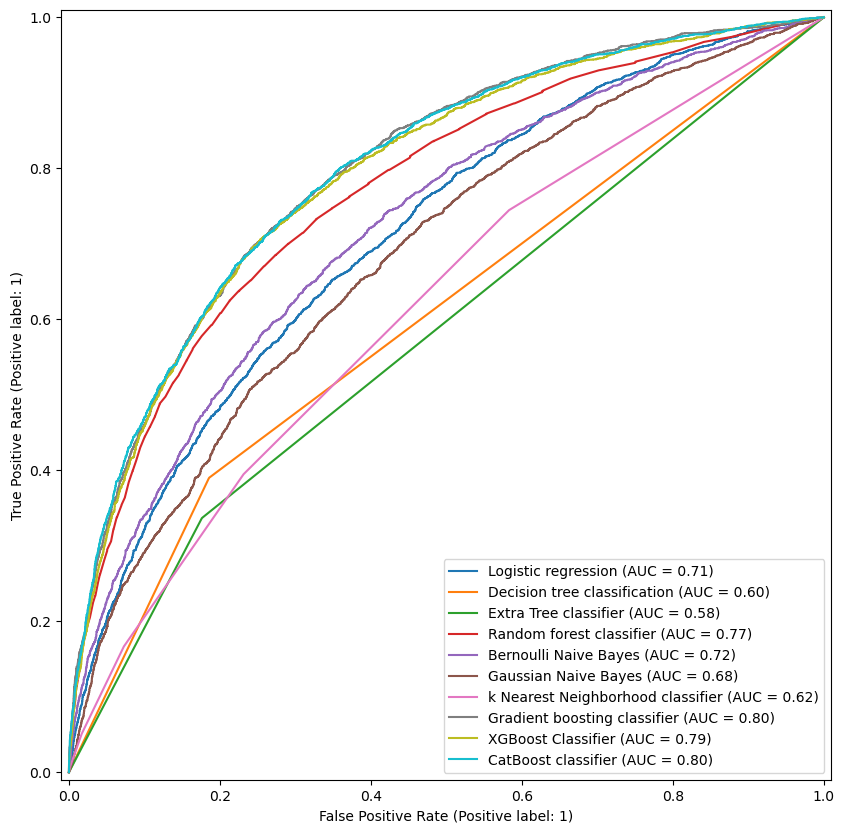

In [54]:
fig, ax = plt.subplots(figsize=(10, 10))

RocCurveDisplay.from_estimator(logreg, X_test, y_test, name='Logistic regression', ax=ax)

RocCurveDisplay.from_estimator(dtc, X_test, y_test,name='Decision tree classification', ax=ax)

RocCurveDisplay.from_estimator(ext, X_test, y_test,name='Extra Tree classifier',ax=ax)

RocCurveDisplay.from_estimator(rfc, X_test, y_test, name='Random forest classifier', ax=ax)

RocCurveDisplay.from_estimator(bnb, X_test, y_test,name='Bernoulli Naive Bayes',ax=ax)

RocCurveDisplay.from_estimator(gnb, X_test, y_test,name='Gaussian Naive Bayes',ax=ax)

RocCurveDisplay.from_estimator(kNN, X_test, y_test, name='k Nearest Neighborhood classifier', ax=ax)

RocCurveDisplay.from_estimator(gbc, X_test, y_test, name='Gradient boosting classifier', ax=ax)

RocCurveDisplay.from_estimator(xg, X_test, y_test, name='XGBoost Classifier', ax=ax)

RocCurveDisplay.from_estimator(cb, X_test, y_test,name='CatBoost classifier',ax=ax)



plt.show()

## Hyperparameter Tuning using GridSearch CV

### MODEL 1: Logistic Regression

In [55]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1.0, 10.0],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'class_weight': ['balanced', None]
}

# Create GridSearchCV object
grid_search = GridSearchCV(logreg, param_grid, verbose=1)

# Fit the model to the data
grid_search_logreg = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [56]:
print("Best parameters:",grid_search_logreg.best_params_)
print("Best score found:", grid_search_logreg.best_score_)

Best parameters: {'C': 1.0, 'class_weight': None, 'solver': 'lbfgs'}
Best score found: 0.7941708213067438


In [57]:
# Fitting the logistic regression model on the training data
grid_search_logreg.best_estimator_.fit(X_train, y_train)

# Evaluating the logistic regression for various metrics
grid_search_logreg_score=evaluate(grid_search_logreg.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.7944135557320625
Train Precision ---> 0.5638921453692849
Train Recall ---> 0.10088087248322147
Train F1_Score ---> 0.1711439245685821

Testing Scores:
Test Accuracy ---> 0.796240734204024
Test Precision ---> 0.5921375921375921
Test Recall ---> 0.10109060402684564
Test F1_Score ---> 0.17269795772124685


### MODEL 2: Decision Tree Classifier

In [58]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    "class_weight": ['balanced', None] 
}

# Create GridSearchCV object
grid_search = GridSearchCV(dtc, param_grid, verbose=1)

# Fit the model to the data
grid_search_dtc = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


In [59]:
print("Best parameters:",grid_search_dtc.best_params_)
print("Best score found:", grid_search_dtc.best_score_)

Best parameters: {'class_weight': None, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score found: 0.8112478524961186


In [60]:
# Fitting the decision tree model on the training data
grid_search_dtc.best_estimator_.fit(X_train, y_train)

# Evaluating the decision tree for various metrics
grid_search_dtc_score=evaluate(grid_search_dtc.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8133659871149943
Train Precision ---> 0.6388244392884764
Train Recall ---> 0.2598573825503356
Train F1_Score ---> 0.36943719716734996

Testing Scores:
Test Accuracy ---> 0.8108012707377339
Test Precision ---> 0.6244813278008299
Test Recall ---> 0.2525167785234899
Test F1_Score ---> 0.35961768219832735


### MODEL 3: Extra Tree Classifier 

In [61]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
# Create GridSearchCV object
grid_search = GridSearchCV(ext, param_grid, verbose=1)

# Fit the model to the data
grid_search_ext = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [62]:
print("Best parameters:",grid_search_ext.best_params_)
print("Best score found:", grid_search_ext.best_score_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Best score found: 0.7924056936054161


In [63]:
# Fitting the Extra Tree model on the training data
grid_search_ext.best_estimator_.fit(X_train, y_train)

# Evaluating the Extra Tree for various metrics
grid_search_ext_score=evaluate(grid_search_ext.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.7969729061865678
Train Precision ---> 0.5809893307468477
Train Recall ---> 0.1256291946308725
Train F1_Score ---> 0.20658734264528367

Testing Scores:
Test Accuracy ---> 0.7910342393222732
Test Precision ---> 0.5172413793103449
Test Recall ---> 0.10067114093959731
Test F1_Score ---> 0.16853932584269662


### MODEL 4: Random Forest Classifier

In [64]:
# Define the parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],

}
# Create GridSearchCV object
grid_search = GridSearchCV(rfc, param_grid, verbose=1)

# Fit the model to the data
grid_search_rfc = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


In [65]:
print("Best parameters:",grid_search_rfc.best_params_)
print("Best score found:", grid_search_rfc.best_score_)

Best parameters: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score found: 0.817822719507879


In [66]:
# Fitting the random forest on the training data
grid_search_rfc.best_estimator_.fit(X_train, y_train)

# Evaluating the random forest for various metrics
grid_search_rfc_score=evaluate(grid_search_rfc.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8946033006795516
Train Precision ---> 0.9635690629261641
Train Recall ---> 0.5186661073825504
Train F1_Score ---> 0.6743472629354421

Testing Scores:
Test Accuracy ---> 0.8161842569714084
Test Precision ---> 0.664841182913472
Test Recall ---> 0.25461409395973156
Test F1_Score ---> 0.3682135274491962


### MODEL 5: Bernoulli Naive Bayes Classifier 

In [68]:
param_grid = {
    'alpha': [0.0, 0.1, 0.5, 1.0],
    'fit_prior': [True, False],
}

# Create GridSearchCV object
grid_search = GridSearchCV(bnb, param_grid, verbose=1)

# Fit the model to the data
grid_search_bnb = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


In [69]:
print("Best parameters:",grid_search_bnb.best_params_)
print("Best score found:", grid_search_bnb.best_score_)

Best parameters: {'alpha': 0.5, 'fit_prior': True}
Best score found: 0.7843747447214854


In [70]:
# Fitting the Bernoulli Naive Bayes model on the training data
grid_search_bnb.best_estimator_.fit(X_train, y_train)

# Evaluating the Bernoulli Naive Bayes for various metrics
grid_search_bnb_score=evaluate(grid_search_bnb.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.7836686964963375
Train Precision ---> 0.4807884587916012
Train Recall ---> 0.35297818791946306
Train F1_Score ---> 0.4070871379331197

Testing Scores:
Test Accuracy ---> 0.779562301447229
Test Precision ---> 0.46779661016949153
Test Recall ---> 0.34731543624161076
Test F1_Score ---> 0.3986519017814155


### MODEL 6: Gaussian Naive Bayes Classifier 

Gaussian Naive Bayes doesn't have tunable hyperparameters like other models, so there is no need for a grid search.<br>
Gaussian Naive Bayes assumes that features are normally distributed.

### MODEL 7: kNN Classifier

In [71]:
# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
# Create GridSearchCV object
grid_search = GridSearchCV(kNN, param_grid, verbose=1)

# Fit the model to the data
grid_search_kNN = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


In [72]:
print("Best parameters:",grid_search_kNN.best_params_)
print("Best score found:", grid_search_kNN.best_score_)

Best parameters: {'metric': 'manhattan', 'n_neighbors': 9, 'weights': 'uniform'}
Best score found: 0.78298466405956


In [73]:
# Fitting the KNN model on the training data
grid_search_kNN.best_estimator_.fit(X_train, y_train)

# Evaluating the KNN for various metrics
grid_search_kNN_score=evaluate(grid_search_kNN.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8078942723501897
Train Precision ---> 0.645183887915937
Train Recall ---> 0.19316275167785235
Train F1_Score ---> 0.297312565571786

Testing Scores:
Test Accuracy ---> 0.7852100247087893
Test Precision ---> 0.46200607902735563
Test Recall ---> 0.12751677852348994
Test F1_Score ---> 0.19986850756081526


### MODEL 8: Gradient Boosting Classifier

In [74]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [None, 5, 10],

}

# Create GridSearchCV object
grid_search = GridSearchCV(gbc, param_grid, verbose=1)

# Fit the model to the data
grid_search_gbc = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [75]:
print("Best parameters:",grid_search_gbc.best_params_)
print("Best score found:", grid_search_gbc.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5}
Best score found: 0.819477506037839


In [92]:
# Fitting the gradient boosting classifier model on the training data
grid_search_gbc.best_estimator_.fit(X_train, y_train)

# Evaluating the gradient boosting classifier for various metrics
grid_search_gbc_score=evaluate(grid_search_gbc.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8316565175183126
Train Precision ---> 0.6979642708766098
Train Recall ---> 0.3523489932885906
Train F1_Score ---> 0.4682926829268293

Testing Scores:
Test Accuracy ---> 0.8172432050829509
Test Precision ---> 0.632514817950889
Test Recall ---> 0.31333892617449666
Test F1_Score ---> 0.4190743338008415


### MODEL 9: XG Boosting Classifier

In [78]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [None, 2,5],

}

# Create GridSearchCV object
grid_search = GridSearchCV(xg, param_grid, verbose=1)

# Fit the model to the data
grid_search_xg = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [79]:
print("Best parameters:",grid_search_xg.best_params_)
print("Best score found:", grid_search_xg.best_score_)

Best parameters: {'learning_rate': 0.1, 'max_depth': 5}
Best score found: 0.8198526139302837


In [93]:
# Fitting the xg boosting model on the training data
grid_search_xg.best_estimator_.fit(X_train, y_train)

# Evaluating the xg boosting for various metrics
grid_search_xg_score=evaluate(grid_search_xg.best_estimator_, X_train, X_test, y_train, y_test)

Training Scores:
Train Accuracy ---> 0.8304871591209955
Train Precision ---> 0.6965005302226935
Train Recall ---> 0.34437919463087246
Train F1_Score ---> 0.4608799382499474

Testing Scores:
Test Accuracy ---> 0.8180374161666079
Test Precision ---> 0.6366723259762309
Test Recall ---> 0.3145973154362416
Test F1_Score ---> 0.4211117349803481


### MODEL 10: Cat Boosting Classifier

In [82]:
# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'depth': [2, 5],
}
# Create GridSearchCV object
grid_search = GridSearchCV(cb, param_grid, verbose=1)

# Fit the model to the data
grid_search_cb = grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
0:	learn: 0.6875424	total: 4.97ms	remaining: 4.97s
1:	learn: 0.6820682	total: 9.09ms	remaining: 4.54s
2:	learn: 0.6767228	total: 12.4ms	remaining: 4.12s
3:	learn: 0.6717071	total: 16.3ms	remaining: 4.06s
4:	learn: 0.6665986	total: 20.9ms	remaining: 4.15s
5:	learn: 0.6620575	total: 25.3ms	remaining: 4.18s
6:	learn: 0.6571780	total: 28.8ms	remaining: 4.09s
7:	learn: 0.6524116	total: 32.8ms	remaining: 4.06s
8:	learn: 0.6477590	total: 36.5ms	remaining: 4.02s
9:	learn: 0.6432146	total: 39.9ms	remaining: 3.95s
10:	learn: 0.6391034	total: 43.9ms	remaining: 3.95s
11:	learn: 0.6347637	total: 47.1ms	remaining: 3.88s
12:	learn: 0.6305218	total: 50.5ms	remaining: 3.84s
13:	learn: 0.6266868	total: 53.8ms	remaining: 3.79s
14:	learn: 0.6226374	total: 57ms	remaining: 3.74s
15:	learn: 0.6186802	total: 60ms	remaining: 3.69s
16:	learn: 0.6151370	total: 63.1ms	remaining: 3.65s
17:	learn: 0.6113533	total: 66.7ms	remaining: 3.64s
18:	learn: 0.60765

163:	learn: 0.4524705	total: 611ms	remaining: 3.11s
164:	learn: 0.4522649	total: 614ms	remaining: 3.11s
165:	learn: 0.4520732	total: 618ms	remaining: 3.1s
166:	learn: 0.4519000	total: 622ms	remaining: 3.1s
167:	learn: 0.4516681	total: 626ms	remaining: 3.1s
168:	learn: 0.4514495	total: 629ms	remaining: 3.09s
169:	learn: 0.4512532	total: 633ms	remaining: 3.09s
170:	learn: 0.4510644	total: 636ms	remaining: 3.08s
171:	learn: 0.4508897	total: 639ms	remaining: 3.08s
172:	learn: 0.4507225	total: 642ms	remaining: 3.07s
173:	learn: 0.4505347	total: 645ms	remaining: 3.06s
174:	learn: 0.4503550	total: 649ms	remaining: 3.06s
175:	learn: 0.4501349	total: 652ms	remaining: 3.05s
176:	learn: 0.4499641	total: 655ms	remaining: 3.05s
177:	learn: 0.4497885	total: 659ms	remaining: 3.04s
178:	learn: 0.4496345	total: 662ms	remaining: 3.04s
179:	learn: 0.4494385	total: 666ms	remaining: 3.03s
180:	learn: 0.4492883	total: 669ms	remaining: 3.03s
181:	learn: 0.4491408	total: 672ms	remaining: 3.02s
182:	learn: 0.4

337:	learn: 0.4361388	total: 1.2s	remaining: 2.36s
338:	learn: 0.4361008	total: 1.21s	remaining: 2.35s
339:	learn: 0.4360485	total: 1.21s	remaining: 2.35s
340:	learn: 0.4359965	total: 1.21s	remaining: 2.35s
341:	learn: 0.4359391	total: 1.22s	remaining: 2.34s
342:	learn: 0.4359048	total: 1.22s	remaining: 2.34s
343:	learn: 0.4358689	total: 1.22s	remaining: 2.33s
344:	learn: 0.4358287	total: 1.23s	remaining: 2.33s
345:	learn: 0.4357554	total: 1.23s	remaining: 2.33s
346:	learn: 0.4357099	total: 1.23s	remaining: 2.32s
347:	learn: 0.4356606	total: 1.24s	remaining: 2.32s
348:	learn: 0.4356228	total: 1.24s	remaining: 2.31s
349:	learn: 0.4355852	total: 1.24s	remaining: 2.31s
350:	learn: 0.4355449	total: 1.25s	remaining: 2.3s
351:	learn: 0.4355067	total: 1.25s	remaining: 2.3s
352:	learn: 0.4354708	total: 1.25s	remaining: 2.3s
353:	learn: 0.4354279	total: 1.25s	remaining: 2.29s
354:	learn: 0.4353887	total: 1.26s	remaining: 2.29s
355:	learn: 0.4353533	total: 1.26s	remaining: 2.28s
356:	learn: 0.43

516:	learn: 0.4304483	total: 1.8s	remaining: 1.69s
517:	learn: 0.4304314	total: 1.81s	remaining: 1.68s
518:	learn: 0.4304177	total: 1.81s	remaining: 1.68s
519:	learn: 0.4303824	total: 1.81s	remaining: 1.67s
520:	learn: 0.4303618	total: 1.82s	remaining: 1.67s
521:	learn: 0.4303434	total: 1.82s	remaining: 1.67s
522:	learn: 0.4303307	total: 1.82s	remaining: 1.66s
523:	learn: 0.4303057	total: 1.83s	remaining: 1.66s
524:	learn: 0.4302818	total: 1.83s	remaining: 1.66s
525:	learn: 0.4302475	total: 1.83s	remaining: 1.65s
526:	learn: 0.4302096	total: 1.84s	remaining: 1.65s
527:	learn: 0.4301871	total: 1.84s	remaining: 1.64s
528:	learn: 0.4301639	total: 1.84s	remaining: 1.64s
529:	learn: 0.4301503	total: 1.84s	remaining: 1.64s
530:	learn: 0.4301094	total: 1.85s	remaining: 1.63s
531:	learn: 0.4300892	total: 1.85s	remaining: 1.63s
532:	learn: 0.4300669	total: 1.86s	remaining: 1.63s
533:	learn: 0.4300470	total: 1.86s	remaining: 1.62s
534:	learn: 0.4300311	total: 1.86s	remaining: 1.62s
535:	learn: 0

689:	learn: 0.4272486	total: 2.4s	remaining: 1.08s
690:	learn: 0.4272242	total: 2.4s	remaining: 1.07s
691:	learn: 0.4272132	total: 2.41s	remaining: 1.07s
692:	learn: 0.4272021	total: 2.41s	remaining: 1.07s
693:	learn: 0.4271869	total: 2.42s	remaining: 1.06s
694:	learn: 0.4271713	total: 2.42s	remaining: 1.06s
695:	learn: 0.4271523	total: 2.42s	remaining: 1.06s
696:	learn: 0.4271363	total: 2.42s	remaining: 1.05s
697:	learn: 0.4271240	total: 2.43s	remaining: 1.05s
698:	learn: 0.4271068	total: 2.43s	remaining: 1.05s
699:	learn: 0.4270945	total: 2.44s	remaining: 1.04s
700:	learn: 0.4270793	total: 2.44s	remaining: 1.04s
701:	learn: 0.4270666	total: 2.44s	remaining: 1.04s
702:	learn: 0.4270520	total: 2.44s	remaining: 1.03s
703:	learn: 0.4270336	total: 2.45s	remaining: 1.03s
704:	learn: 0.4270214	total: 2.45s	remaining: 1.02s
705:	learn: 0.4270087	total: 2.45s	remaining: 1.02s
706:	learn: 0.4269949	total: 2.46s	remaining: 1.02s
707:	learn: 0.4269838	total: 2.46s	remaining: 1.01s
708:	learn: 0.

871:	learn: 0.4249487	total: 3s	remaining: 440ms
872:	learn: 0.4249374	total: 3s	remaining: 437ms
873:	learn: 0.4249251	total: 3s	remaining: 433ms
874:	learn: 0.4249158	total: 3.01s	remaining: 430ms
875:	learn: 0.4248905	total: 3.01s	remaining: 426ms
876:	learn: 0.4248781	total: 3.01s	remaining: 423ms
877:	learn: 0.4248666	total: 3.02s	remaining: 419ms
878:	learn: 0.4248493	total: 3.02s	remaining: 416ms
879:	learn: 0.4248387	total: 3.02s	remaining: 412ms
880:	learn: 0.4248286	total: 3.03s	remaining: 409ms
881:	learn: 0.4248185	total: 3.03s	remaining: 406ms
882:	learn: 0.4248099	total: 3.03s	remaining: 402ms
883:	learn: 0.4248019	total: 3.04s	remaining: 399ms
884:	learn: 0.4247913	total: 3.04s	remaining: 395ms
885:	learn: 0.4247801	total: 3.04s	remaining: 392ms
886:	learn: 0.4247687	total: 3.05s	remaining: 388ms
887:	learn: 0.4247614	total: 3.05s	remaining: 385ms
888:	learn: 0.4247494	total: 3.05s	remaining: 381ms
889:	learn: 0.4247400	total: 3.06s	remaining: 378ms
890:	learn: 0.4247324

60:	learn: 0.5116452	total: 213ms	remaining: 3.28s
61:	learn: 0.5102636	total: 218ms	remaining: 3.29s
62:	learn: 0.5089834	total: 221ms	remaining: 3.28s
63:	learn: 0.5077314	total: 224ms	remaining: 3.28s
64:	learn: 0.5064783	total: 228ms	remaining: 3.27s
65:	learn: 0.5052554	total: 231ms	remaining: 3.27s
66:	learn: 0.5041154	total: 234ms	remaining: 3.26s
67:	learn: 0.5028752	total: 237ms	remaining: 3.25s
68:	learn: 0.5016640	total: 240ms	remaining: 3.24s
69:	learn: 0.5005629	total: 243ms	remaining: 3.23s
70:	learn: 0.4994860	total: 247ms	remaining: 3.23s
71:	learn: 0.4983547	total: 250ms	remaining: 3.23s
72:	learn: 0.4973222	total: 254ms	remaining: 3.22s
73:	learn: 0.4963348	total: 257ms	remaining: 3.21s
74:	learn: 0.4952643	total: 260ms	remaining: 3.21s
75:	learn: 0.4942647	total: 263ms	remaining: 3.2s
76:	learn: 0.4932397	total: 267ms	remaining: 3.2s
77:	learn: 0.4923243	total: 270ms	remaining: 3.19s
78:	learn: 0.4914208	total: 273ms	remaining: 3.19s
79:	learn: 0.4905857	total: 277ms

238:	learn: 0.4422741	total: 815ms	remaining: 2.59s
239:	learn: 0.4421640	total: 819ms	remaining: 2.59s
240:	learn: 0.4420804	total: 822ms	remaining: 2.59s
241:	learn: 0.4420049	total: 825ms	remaining: 2.58s
242:	learn: 0.4419219	total: 828ms	remaining: 2.58s
243:	learn: 0.4418280	total: 831ms	remaining: 2.58s
244:	learn: 0.4417230	total: 835ms	remaining: 2.57s
245:	learn: 0.4416292	total: 838ms	remaining: 2.57s
246:	learn: 0.4415487	total: 841ms	remaining: 2.56s
247:	learn: 0.4414684	total: 845ms	remaining: 2.56s
248:	learn: 0.4413827	total: 848ms	remaining: 2.56s
249:	learn: 0.4413051	total: 852ms	remaining: 2.56s
250:	learn: 0.4412066	total: 855ms	remaining: 2.55s
251:	learn: 0.4411362	total: 859ms	remaining: 2.55s
252:	learn: 0.4410734	total: 862ms	remaining: 2.54s
253:	learn: 0.4409919	total: 865ms	remaining: 2.54s
254:	learn: 0.4409269	total: 868ms	remaining: 2.54s
255:	learn: 0.4408625	total: 872ms	remaining: 2.53s
256:	learn: 0.4407995	total: 875ms	remaining: 2.53s
257:	learn: 

418:	learn: 0.4334174	total: 1.41s	remaining: 1.96s
419:	learn: 0.4333878	total: 1.42s	remaining: 1.96s
420:	learn: 0.4333607	total: 1.42s	remaining: 1.95s
421:	learn: 0.4333321	total: 1.42s	remaining: 1.95s
422:	learn: 0.4332965	total: 1.43s	remaining: 1.95s
423:	learn: 0.4332723	total: 1.43s	remaining: 1.94s
424:	learn: 0.4332490	total: 1.43s	remaining: 1.94s
425:	learn: 0.4332212	total: 1.44s	remaining: 1.93s
426:	learn: 0.4331815	total: 1.44s	remaining: 1.93s
427:	learn: 0.4331579	total: 1.44s	remaining: 1.93s
428:	learn: 0.4331351	total: 1.45s	remaining: 1.92s
429:	learn: 0.4331081	total: 1.45s	remaining: 1.92s
430:	learn: 0.4330736	total: 1.45s	remaining: 1.92s
431:	learn: 0.4330493	total: 1.46s	remaining: 1.91s
432:	learn: 0.4330240	total: 1.46s	remaining: 1.91s
433:	learn: 0.4329930	total: 1.47s	remaining: 1.91s
434:	learn: 0.4329689	total: 1.47s	remaining: 1.91s
435:	learn: 0.4329466	total: 1.47s	remaining: 1.91s
436:	learn: 0.4329253	total: 1.48s	remaining: 1.9s
437:	learn: 0

595:	learn: 0.4292379	total: 2.02s	remaining: 1.37s
596:	learn: 0.4292223	total: 2.02s	remaining: 1.37s
597:	learn: 0.4292088	total: 2.03s	remaining: 1.36s
598:	learn: 0.4291939	total: 2.03s	remaining: 1.36s
599:	learn: 0.4291820	total: 2.03s	remaining: 1.35s
600:	learn: 0.4291656	total: 2.04s	remaining: 1.35s
601:	learn: 0.4291519	total: 2.04s	remaining: 1.35s
602:	learn: 0.4291245	total: 2.04s	remaining: 1.34s
603:	learn: 0.4291137	total: 2.04s	remaining: 1.34s
604:	learn: 0.4291007	total: 2.05s	remaining: 1.34s
605:	learn: 0.4290850	total: 2.05s	remaining: 1.33s
606:	learn: 0.4290700	total: 2.06s	remaining: 1.33s
607:	learn: 0.4290436	total: 2.06s	remaining: 1.33s
608:	learn: 0.4290283	total: 2.06s	remaining: 1.32s
609:	learn: 0.4290115	total: 2.06s	remaining: 1.32s
610:	learn: 0.4289980	total: 2.07s	remaining: 1.32s
611:	learn: 0.4289808	total: 2.07s	remaining: 1.31s
612:	learn: 0.4289703	total: 2.08s	remaining: 1.31s
613:	learn: 0.4289436	total: 2.08s	remaining: 1.31s
614:	learn: 

780:	learn: 0.4265147	total: 2.62s	remaining: 735ms
781:	learn: 0.4265029	total: 2.63s	remaining: 732ms
782:	learn: 0.4264930	total: 2.63s	remaining: 729ms
783:	learn: 0.4264805	total: 2.63s	remaining: 725ms
784:	learn: 0.4264679	total: 2.63s	remaining: 722ms
785:	learn: 0.4264562	total: 2.64s	remaining: 718ms
786:	learn: 0.4264449	total: 2.64s	remaining: 715ms
787:	learn: 0.4264371	total: 2.65s	remaining: 712ms
788:	learn: 0.4264230	total: 2.65s	remaining: 708ms
789:	learn: 0.4264024	total: 2.65s	remaining: 705ms
790:	learn: 0.4263925	total: 2.65s	remaining: 702ms
791:	learn: 0.4263824	total: 2.66s	remaining: 698ms
792:	learn: 0.4263697	total: 2.66s	remaining: 695ms
793:	learn: 0.4263604	total: 2.67s	remaining: 691ms
794:	learn: 0.4263489	total: 2.67s	remaining: 688ms
795:	learn: 0.4263360	total: 2.67s	remaining: 685ms
796:	learn: 0.4263246	total: 2.67s	remaining: 681ms
797:	learn: 0.4263142	total: 2.68s	remaining: 678ms
798:	learn: 0.4263008	total: 2.68s	remaining: 674ms
799:	learn: 

964:	learn: 0.4246288	total: 3.22s	remaining: 117ms
965:	learn: 0.4246214	total: 3.22s	remaining: 113ms
966:	learn: 0.4246103	total: 3.23s	remaining: 110ms
967:	learn: 0.4246012	total: 3.23s	remaining: 107ms
968:	learn: 0.4245863	total: 3.23s	remaining: 103ms
969:	learn: 0.4245766	total: 3.23s	remaining: 100ms
970:	learn: 0.4245656	total: 3.24s	remaining: 96.7ms
971:	learn: 0.4245584	total: 3.24s	remaining: 93.4ms
972:	learn: 0.4245483	total: 3.25s	remaining: 90.1ms
973:	learn: 0.4245422	total: 3.25s	remaining: 86.7ms
974:	learn: 0.4245327	total: 3.25s	remaining: 83.4ms
975:	learn: 0.4245252	total: 3.25s	remaining: 80.1ms
976:	learn: 0.4245012	total: 3.26s	remaining: 76.7ms
977:	learn: 0.4244923	total: 3.26s	remaining: 73.4ms
978:	learn: 0.4244830	total: 3.27s	remaining: 70.1ms
979:	learn: 0.4244767	total: 3.27s	remaining: 66.7ms
980:	learn: 0.4244532	total: 3.27s	remaining: 63.4ms
981:	learn: 0.4244438	total: 3.28s	remaining: 60.1ms
982:	learn: 0.4244333	total: 3.28s	remaining: 56.7ms

171:	learn: 0.4496188	total: 600ms	remaining: 2.89s
172:	learn: 0.4494348	total: 605ms	remaining: 2.89s
173:	learn: 0.4492261	total: 609ms	remaining: 2.89s
174:	learn: 0.4490302	total: 613ms	remaining: 2.89s
175:	learn: 0.4488396	total: 617ms	remaining: 2.89s
176:	learn: 0.4486797	total: 621ms	remaining: 2.89s
177:	learn: 0.4485291	total: 625ms	remaining: 2.89s
178:	learn: 0.4483301	total: 629ms	remaining: 2.89s
179:	learn: 0.4481590	total: 633ms	remaining: 2.88s
180:	learn: 0.4479953	total: 637ms	remaining: 2.88s
181:	learn: 0.4478529	total: 641ms	remaining: 2.88s
182:	learn: 0.4476948	total: 645ms	remaining: 2.88s
183:	learn: 0.4475377	total: 649ms	remaining: 2.88s
184:	learn: 0.4473783	total: 653ms	remaining: 2.88s
185:	learn: 0.4472448	total: 658ms	remaining: 2.88s
186:	learn: 0.4470946	total: 662ms	remaining: 2.88s
187:	learn: 0.4469423	total: 668ms	remaining: 2.88s
188:	learn: 0.4468208	total: 674ms	remaining: 2.89s
189:	learn: 0.4466955	total: 681ms	remaining: 2.9s
190:	learn: 0

377:	learn: 0.4335775	total: 1.41s	remaining: 2.32s
378:	learn: 0.4335460	total: 1.42s	remaining: 2.32s
379:	learn: 0.4335112	total: 1.42s	remaining: 2.31s
380:	learn: 0.4334805	total: 1.42s	remaining: 2.31s
381:	learn: 0.4334481	total: 1.43s	remaining: 2.31s
382:	learn: 0.4334156	total: 1.43s	remaining: 2.31s
383:	learn: 0.4333837	total: 1.44s	remaining: 2.3s
384:	learn: 0.4333499	total: 1.44s	remaining: 2.3s
385:	learn: 0.4333199	total: 1.44s	remaining: 2.29s
386:	learn: 0.4332882	total: 1.45s	remaining: 2.29s
387:	learn: 0.4332590	total: 1.45s	remaining: 2.29s
388:	learn: 0.4332252	total: 1.45s	remaining: 2.28s
389:	learn: 0.4331808	total: 1.46s	remaining: 2.28s
390:	learn: 0.4331520	total: 1.46s	remaining: 2.27s
391:	learn: 0.4331105	total: 1.46s	remaining: 2.27s
392:	learn: 0.4330825	total: 1.47s	remaining: 2.26s
393:	learn: 0.4330544	total: 1.47s	remaining: 2.26s
394:	learn: 0.4330179	total: 1.47s	remaining: 2.25s
395:	learn: 0.4329800	total: 1.48s	remaining: 2.25s
396:	learn: 0.

553:	learn: 0.4289753	total: 2.01s	remaining: 1.61s
554:	learn: 0.4289579	total: 2.01s	remaining: 1.61s
555:	learn: 0.4289431	total: 2.01s	remaining: 1.61s
556:	learn: 0.4289211	total: 2.02s	remaining: 1.6s
557:	learn: 0.4289045	total: 2.02s	remaining: 1.6s
558:	learn: 0.4288864	total: 2.02s	remaining: 1.6s
559:	learn: 0.4288497	total: 2.03s	remaining: 1.59s
560:	learn: 0.4288339	total: 2.03s	remaining: 1.59s
561:	learn: 0.4288164	total: 2.04s	remaining: 1.59s
562:	learn: 0.4288002	total: 2.04s	remaining: 1.58s
563:	learn: 0.4287789	total: 2.04s	remaining: 1.58s
564:	learn: 0.4287599	total: 2.05s	remaining: 1.57s
565:	learn: 0.4287475	total: 2.05s	remaining: 1.57s
566:	learn: 0.4287314	total: 2.05s	remaining: 1.57s
567:	learn: 0.4287160	total: 2.06s	remaining: 1.56s
568:	learn: 0.4287040	total: 2.06s	remaining: 1.56s
569:	learn: 0.4286858	total: 2.06s	remaining: 1.56s
570:	learn: 0.4286642	total: 2.06s	remaining: 1.55s
571:	learn: 0.4286466	total: 2.07s	remaining: 1.55s
572:	learn: 0.4

729:	learn: 0.4262266	total: 2.6s	remaining: 962ms
730:	learn: 0.4262136	total: 2.6s	remaining: 958ms
731:	learn: 0.4262014	total: 2.61s	remaining: 955ms
732:	learn: 0.4261908	total: 2.61s	remaining: 951ms
733:	learn: 0.4261792	total: 2.61s	remaining: 948ms
734:	learn: 0.4261681	total: 2.62s	remaining: 944ms
735:	learn: 0.4261527	total: 2.62s	remaining: 941ms
736:	learn: 0.4261425	total: 2.63s	remaining: 937ms
737:	learn: 0.4261296	total: 2.63s	remaining: 934ms
738:	learn: 0.4261194	total: 2.63s	remaining: 931ms
739:	learn: 0.4261026	total: 2.64s	remaining: 927ms
740:	learn: 0.4260892	total: 2.64s	remaining: 923ms
741:	learn: 0.4260811	total: 2.65s	remaining: 920ms
742:	learn: 0.4260724	total: 2.65s	remaining: 916ms
743:	learn: 0.4260623	total: 2.65s	remaining: 913ms
744:	learn: 0.4260519	total: 2.66s	remaining: 910ms
745:	learn: 0.4260319	total: 2.66s	remaining: 906ms
746:	learn: 0.4260197	total: 2.67s	remaining: 903ms
747:	learn: 0.4260046	total: 2.67s	remaining: 899ms
748:	learn: 0.

895:	learn: 0.4243102	total: 3.2s	remaining: 372ms
896:	learn: 0.4243020	total: 3.21s	remaining: 368ms
897:	learn: 0.4242940	total: 3.21s	remaining: 365ms
898:	learn: 0.4242824	total: 3.21s	remaining: 361ms
899:	learn: 0.4242718	total: 3.22s	remaining: 358ms
900:	learn: 0.4242637	total: 3.22s	remaining: 354ms
901:	learn: 0.4242516	total: 3.23s	remaining: 351ms
902:	learn: 0.4242409	total: 3.23s	remaining: 347ms
903:	learn: 0.4242313	total: 3.23s	remaining: 343ms
904:	learn: 0.4242215	total: 3.24s	remaining: 340ms
905:	learn: 0.4242136	total: 3.24s	remaining: 336ms
906:	learn: 0.4242050	total: 3.24s	remaining: 332ms
907:	learn: 0.4241953	total: 3.25s	remaining: 329ms
908:	learn: 0.4241845	total: 3.25s	remaining: 325ms
909:	learn: 0.4241775	total: 3.25s	remaining: 322ms
910:	learn: 0.4241679	total: 3.25s	remaining: 318ms
911:	learn: 0.4241608	total: 3.26s	remaining: 314ms
912:	learn: 0.4241531	total: 3.26s	remaining: 311ms
913:	learn: 0.4241449	total: 3.26s	remaining: 307ms
914:	learn: 0

59:	learn: 0.5128563	total: 202ms	remaining: 3.17s
60:	learn: 0.5114942	total: 206ms	remaining: 3.17s
61:	learn: 0.5102045	total: 210ms	remaining: 3.18s
62:	learn: 0.5088241	total: 215ms	remaining: 3.19s
63:	learn: 0.5074752	total: 219ms	remaining: 3.21s
64:	learn: 0.5062223	total: 223ms	remaining: 3.21s
65:	learn: 0.5049995	total: 226ms	remaining: 3.2s
66:	learn: 0.5038560	total: 229ms	remaining: 3.19s
67:	learn: 0.5026816	total: 232ms	remaining: 3.19s
68:	learn: 0.5015694	total: 236ms	remaining: 3.18s
69:	learn: 0.5003930	total: 239ms	remaining: 3.17s
70:	learn: 0.4993012	total: 242ms	remaining: 3.17s
71:	learn: 0.4982637	total: 245ms	remaining: 3.16s
72:	learn: 0.4971442	total: 249ms	remaining: 3.16s
73:	learn: 0.4960334	total: 252ms	remaining: 3.15s
74:	learn: 0.4950501	total: 255ms	remaining: 3.15s
75:	learn: 0.4940506	total: 259ms	remaining: 3.15s
76:	learn: 0.4930048	total: 262ms	remaining: 3.14s
77:	learn: 0.4919958	total: 265ms	remaining: 3.13s
78:	learn: 0.4910571	total: 268m

242:	learn: 0.4411442	total: 813ms	remaining: 2.53s
243:	learn: 0.4410715	total: 817ms	remaining: 2.53s
244:	learn: 0.4409783	total: 821ms	remaining: 2.53s
245:	learn: 0.4408795	total: 825ms	remaining: 2.53s
246:	learn: 0.4407999	total: 829ms	remaining: 2.53s
247:	learn: 0.4407163	total: 832ms	remaining: 2.52s
248:	learn: 0.4406281	total: 836ms	remaining: 2.52s
249:	learn: 0.4405231	total: 839ms	remaining: 2.52s
250:	learn: 0.4404539	total: 842ms	remaining: 2.51s
251:	learn: 0.4403607	total: 845ms	remaining: 2.51s
252:	learn: 0.4402812	total: 848ms	remaining: 2.5s
253:	learn: 0.4401915	total: 851ms	remaining: 2.5s
254:	learn: 0.4401190	total: 854ms	remaining: 2.49s
255:	learn: 0.4400488	total: 857ms	remaining: 2.49s
256:	learn: 0.4399815	total: 860ms	remaining: 2.49s
257:	learn: 0.4398991	total: 863ms	remaining: 2.48s
258:	learn: 0.4398147	total: 866ms	remaining: 2.48s
259:	learn: 0.4397309	total: 869ms	remaining: 2.47s
260:	learn: 0.4396356	total: 873ms	remaining: 2.47s
261:	learn: 0.

415:	learn: 0.4324525	total: 1.41s	remaining: 1.98s
416:	learn: 0.4324240	total: 1.42s	remaining: 1.98s
417:	learn: 0.4323938	total: 1.42s	remaining: 1.98s
418:	learn: 0.4323622	total: 1.42s	remaining: 1.97s
419:	learn: 0.4323328	total: 1.43s	remaining: 1.97s
420:	learn: 0.4323064	total: 1.43s	remaining: 1.97s
421:	learn: 0.4322817	total: 1.43s	remaining: 1.96s
422:	learn: 0.4322499	total: 1.44s	remaining: 1.96s
423:	learn: 0.4322244	total: 1.44s	remaining: 1.96s
424:	learn: 0.4321876	total: 1.44s	remaining: 1.95s
425:	learn: 0.4321567	total: 1.45s	remaining: 1.95s
426:	learn: 0.4321247	total: 1.45s	remaining: 1.95s
427:	learn: 0.4320866	total: 1.45s	remaining: 1.94s
428:	learn: 0.4320574	total: 1.46s	remaining: 1.94s
429:	learn: 0.4320296	total: 1.46s	remaining: 1.93s
430:	learn: 0.4320082	total: 1.46s	remaining: 1.93s
431:	learn: 0.4319755	total: 1.47s	remaining: 1.93s
432:	learn: 0.4319413	total: 1.47s	remaining: 1.92s
433:	learn: 0.4319185	total: 1.47s	remaining: 1.92s
434:	learn: 

593:	learn: 0.4282266	total: 2s	remaining: 1.37s
594:	learn: 0.4282123	total: 2.01s	remaining: 1.37s
595:	learn: 0.4281973	total: 2.01s	remaining: 1.36s
596:	learn: 0.4281776	total: 2.02s	remaining: 1.36s
597:	learn: 0.4281603	total: 2.02s	remaining: 1.36s
598:	learn: 0.4281441	total: 2.02s	remaining: 1.35s
599:	learn: 0.4281262	total: 2.03s	remaining: 1.35s
600:	learn: 0.4281119	total: 2.03s	remaining: 1.35s
601:	learn: 0.4280843	total: 2.03s	remaining: 1.34s
602:	learn: 0.4280656	total: 2.04s	remaining: 1.34s
603:	learn: 0.4280496	total: 2.04s	remaining: 1.34s
604:	learn: 0.4280327	total: 2.04s	remaining: 1.33s
605:	learn: 0.4280194	total: 2.05s	remaining: 1.33s
606:	learn: 0.4280024	total: 2.05s	remaining: 1.33s
607:	learn: 0.4279810	total: 2.05s	remaining: 1.32s
608:	learn: 0.4279631	total: 2.06s	remaining: 1.32s
609:	learn: 0.4279447	total: 2.06s	remaining: 1.32s
610:	learn: 0.4279276	total: 2.06s	remaining: 1.31s
611:	learn: 0.4279065	total: 2.06s	remaining: 1.31s
612:	learn: 0.4

781:	learn: 0.4253642	total: 2.62s	remaining: 729ms
782:	learn: 0.4253564	total: 2.62s	remaining: 726ms
783:	learn: 0.4253433	total: 2.62s	remaining: 723ms
784:	learn: 0.4253339	total: 2.63s	remaining: 720ms
785:	learn: 0.4253253	total: 2.63s	remaining: 717ms
786:	learn: 0.4253148	total: 2.64s	remaining: 713ms
787:	learn: 0.4252933	total: 2.64s	remaining: 711ms
788:	learn: 0.4252802	total: 2.64s	remaining: 707ms
789:	learn: 0.4252693	total: 2.65s	remaining: 704ms
790:	learn: 0.4252538	total: 2.65s	remaining: 701ms
791:	learn: 0.4252456	total: 2.65s	remaining: 697ms
792:	learn: 0.4252384	total: 2.66s	remaining: 694ms
793:	learn: 0.4252172	total: 2.66s	remaining: 691ms
794:	learn: 0.4252054	total: 2.67s	remaining: 688ms
795:	learn: 0.4251969	total: 2.67s	remaining: 685ms
796:	learn: 0.4251867	total: 2.68s	remaining: 682ms
797:	learn: 0.4251726	total: 2.68s	remaining: 679ms
798:	learn: 0.4251653	total: 2.68s	remaining: 675ms
799:	learn: 0.4251525	total: 2.69s	remaining: 672ms
800:	learn: 

961:	learn: 0.4233966	total: 3.22s	remaining: 127ms
962:	learn: 0.4233881	total: 3.22s	remaining: 124ms
963:	learn: 0.4233792	total: 3.23s	remaining: 120ms
964:	learn: 0.4233682	total: 3.23s	remaining: 117ms
965:	learn: 0.4233615	total: 3.23s	remaining: 114ms
966:	learn: 0.4233480	total: 3.23s	remaining: 110ms
967:	learn: 0.4233413	total: 3.24s	remaining: 107ms
968:	learn: 0.4233331	total: 3.24s	remaining: 104ms
969:	learn: 0.4233247	total: 3.25s	remaining: 100ms
970:	learn: 0.4233167	total: 3.25s	remaining: 97ms
971:	learn: 0.4233106	total: 3.25s	remaining: 93.7ms
972:	learn: 0.4233031	total: 3.25s	remaining: 90.3ms
973:	learn: 0.4232945	total: 3.26s	remaining: 87ms
974:	learn: 0.4232860	total: 3.26s	remaining: 83.6ms
975:	learn: 0.4232734	total: 3.27s	remaining: 80.3ms
976:	learn: 0.4232641	total: 3.27s	remaining: 76.9ms
977:	learn: 0.4232518	total: 3.27s	remaining: 73.6ms
978:	learn: 0.4232448	total: 3.27s	remaining: 70.2ms
979:	learn: 0.4232367	total: 3.28s	remaining: 66.9ms
980:	l

177:	learn: 0.4488282	total: 614ms	remaining: 2.84s
178:	learn: 0.4486357	total: 619ms	remaining: 2.84s
179:	learn: 0.4484743	total: 623ms	remaining: 2.83s
180:	learn: 0.4482978	total: 627ms	remaining: 2.83s
181:	learn: 0.4481589	total: 630ms	remaining: 2.83s
182:	learn: 0.4480198	total: 634ms	remaining: 2.83s
183:	learn: 0.4478700	total: 638ms	remaining: 2.83s
184:	learn: 0.4476886	total: 641ms	remaining: 2.82s
185:	learn: 0.4475408	total: 644ms	remaining: 2.82s
186:	learn: 0.4473561	total: 648ms	remaining: 2.81s
187:	learn: 0.4472136	total: 651ms	remaining: 2.81s
188:	learn: 0.4470811	total: 654ms	remaining: 2.81s
189:	learn: 0.4469373	total: 657ms	remaining: 2.8s
190:	learn: 0.4468063	total: 660ms	remaining: 2.79s
191:	learn: 0.4466431	total: 663ms	remaining: 2.79s
192:	learn: 0.4465085	total: 667ms	remaining: 2.79s
193:	learn: 0.4463653	total: 671ms	remaining: 2.79s
194:	learn: 0.4462237	total: 675ms	remaining: 2.78s
195:	learn: 0.4461040	total: 678ms	remaining: 2.78s
196:	learn: 0

356:	learn: 0.4345083	total: 1.22s	remaining: 2.21s
357:	learn: 0.4344728	total: 1.23s	remaining: 2.2s
358:	learn: 0.4344222	total: 1.23s	remaining: 2.2s
359:	learn: 0.4343838	total: 1.24s	remaining: 2.2s
360:	learn: 0.4343457	total: 1.24s	remaining: 2.2s
361:	learn: 0.4343109	total: 1.24s	remaining: 2.19s
362:	learn: 0.4342691	total: 1.25s	remaining: 2.19s
363:	learn: 0.4342353	total: 1.25s	remaining: 2.19s
364:	learn: 0.4342054	total: 1.25s	remaining: 2.18s
365:	learn: 0.4341729	total: 1.26s	remaining: 2.18s
366:	learn: 0.4341381	total: 1.26s	remaining: 2.18s
367:	learn: 0.4340953	total: 1.27s	remaining: 2.17s
368:	learn: 0.4340573	total: 1.27s	remaining: 2.17s
369:	learn: 0.4340175	total: 1.27s	remaining: 2.17s
370:	learn: 0.4339850	total: 1.27s	remaining: 2.16s
371:	learn: 0.4339482	total: 1.28s	remaining: 2.16s
372:	learn: 0.4339139	total: 1.28s	remaining: 2.16s
373:	learn: 0.4338865	total: 1.29s	remaining: 2.15s
374:	learn: 0.4338186	total: 1.29s	remaining: 2.15s
375:	learn: 0.43

539:	learn: 0.4291579	total: 1.84s	remaining: 1.57s
540:	learn: 0.4291404	total: 1.84s	remaining: 1.56s
541:	learn: 0.4291149	total: 1.85s	remaining: 1.56s
542:	learn: 0.4290960	total: 1.85s	remaining: 1.56s
543:	learn: 0.4290776	total: 1.86s	remaining: 1.56s
544:	learn: 0.4290612	total: 1.86s	remaining: 1.55s
545:	learn: 0.4290416	total: 1.86s	remaining: 1.55s
546:	learn: 0.4290177	total: 1.87s	remaining: 1.55s
547:	learn: 0.4289972	total: 1.87s	remaining: 1.54s
548:	learn: 0.4289793	total: 1.87s	remaining: 1.54s
549:	learn: 0.4289566	total: 1.88s	remaining: 1.54s
550:	learn: 0.4289401	total: 1.88s	remaining: 1.53s
551:	learn: 0.4289181	total: 1.88s	remaining: 1.53s
552:	learn: 0.4288814	total: 1.89s	remaining: 1.52s
553:	learn: 0.4288642	total: 1.89s	remaining: 1.52s
554:	learn: 0.4288473	total: 1.89s	remaining: 1.52s
555:	learn: 0.4288278	total: 1.9s	remaining: 1.51s
556:	learn: 0.4288055	total: 1.9s	remaining: 1.51s
557:	learn: 0.4287859	total: 1.9s	remaining: 1.51s
558:	learn: 0.4

723:	learn: 0.4260785	total: 2.46s	remaining: 939ms
724:	learn: 0.4260687	total: 2.47s	remaining: 935ms
725:	learn: 0.4260573	total: 2.47s	remaining: 932ms
726:	learn: 0.4260312	total: 2.47s	remaining: 929ms
727:	learn: 0.4260170	total: 2.48s	remaining: 925ms
728:	learn: 0.4260068	total: 2.48s	remaining: 922ms
729:	learn: 0.4259953	total: 2.48s	remaining: 919ms
730:	learn: 0.4259819	total: 2.49s	remaining: 916ms
731:	learn: 0.4259702	total: 2.49s	remaining: 912ms
732:	learn: 0.4259613	total: 2.49s	remaining: 909ms
733:	learn: 0.4259530	total: 2.5s	remaining: 905ms
734:	learn: 0.4259410	total: 2.5s	remaining: 902ms
735:	learn: 0.4259259	total: 2.5s	remaining: 898ms
736:	learn: 0.4259035	total: 2.51s	remaining: 895ms
737:	learn: 0.4258921	total: 2.51s	remaining: 891ms
738:	learn: 0.4258789	total: 2.51s	remaining: 888ms
739:	learn: 0.4258680	total: 2.52s	remaining: 884ms
740:	learn: 0.4258560	total: 2.52s	remaining: 881ms
741:	learn: 0.4258398	total: 2.52s	remaining: 878ms
742:	learn: 0.4

889:	learn: 0.4241722	total: 3.06s	remaining: 378ms
890:	learn: 0.4241649	total: 3.07s	remaining: 375ms
891:	learn: 0.4241553	total: 3.07s	remaining: 372ms
892:	learn: 0.4241429	total: 3.07s	remaining: 368ms
893:	learn: 0.4241347	total: 3.08s	remaining: 365ms
894:	learn: 0.4241272	total: 3.08s	remaining: 361ms
895:	learn: 0.4241162	total: 3.09s	remaining: 358ms
896:	learn: 0.4241086	total: 3.09s	remaining: 355ms
897:	learn: 0.4240984	total: 3.1s	remaining: 352ms
898:	learn: 0.4240822	total: 3.1s	remaining: 348ms
899:	learn: 0.4240726	total: 3.1s	remaining: 345ms
900:	learn: 0.4240629	total: 3.11s	remaining: 342ms
901:	learn: 0.4240535	total: 3.11s	remaining: 338ms
902:	learn: 0.4240428	total: 3.12s	remaining: 335ms
903:	learn: 0.4240342	total: 3.12s	remaining: 331ms
904:	learn: 0.4240255	total: 3.13s	remaining: 328ms
905:	learn: 0.4240098	total: 3.13s	remaining: 325ms
906:	learn: 0.4240021	total: 3.13s	remaining: 321ms
907:	learn: 0.4239943	total: 3.14s	remaining: 318ms
908:	learn: 0.4

58:	learn: 0.4283724	total: 200ms	remaining: 3.18s
59:	learn: 0.4282120	total: 204ms	remaining: 3.19s
60:	learn: 0.4280491	total: 208ms	remaining: 3.2s
61:	learn: 0.4279276	total: 211ms	remaining: 3.19s
62:	learn: 0.4277708	total: 214ms	remaining: 3.19s
63:	learn: 0.4276657	total: 218ms	remaining: 3.18s
64:	learn: 0.4275685	total: 222ms	remaining: 3.19s
65:	learn: 0.4274395	total: 226ms	remaining: 3.2s
66:	learn: 0.4272989	total: 230ms	remaining: 3.21s
67:	learn: 0.4270662	total: 234ms	remaining: 3.2s
68:	learn: 0.4268775	total: 237ms	remaining: 3.19s
69:	learn: 0.4267347	total: 240ms	remaining: 3.19s
70:	learn: 0.4265819	total: 244ms	remaining: 3.19s
71:	learn: 0.4264614	total: 248ms	remaining: 3.19s
72:	learn: 0.4263017	total: 251ms	remaining: 3.19s
73:	learn: 0.4261833	total: 254ms	remaining: 3.18s
74:	learn: 0.4260779	total: 257ms	remaining: 3.17s
75:	learn: 0.4259583	total: 260ms	remaining: 3.16s
76:	learn: 0.4258352	total: 263ms	remaining: 3.16s
77:	learn: 0.4257421	total: 267ms	

240:	learn: 0.4162040	total: 822ms	remaining: 2.59s
241:	learn: 0.4161810	total: 827ms	remaining: 2.59s
242:	learn: 0.4161454	total: 831ms	remaining: 2.59s
243:	learn: 0.4161218	total: 834ms	remaining: 2.58s
244:	learn: 0.4161019	total: 850ms	remaining: 2.62s
245:	learn: 0.4160607	total: 855ms	remaining: 2.62s
246:	learn: 0.4160287	total: 859ms	remaining: 2.62s
247:	learn: 0.4159969	total: 864ms	remaining: 2.62s
248:	learn: 0.4159629	total: 869ms	remaining: 2.62s
249:	learn: 0.4159406	total: 875ms	remaining: 2.62s
250:	learn: 0.4159200	total: 879ms	remaining: 2.62s
251:	learn: 0.4158994	total: 883ms	remaining: 2.62s
252:	learn: 0.4158713	total: 887ms	remaining: 2.62s
253:	learn: 0.4157864	total: 891ms	remaining: 2.62s
254:	learn: 0.4157437	total: 894ms	remaining: 2.61s
255:	learn: 0.4157254	total: 898ms	remaining: 2.61s
256:	learn: 0.4157077	total: 901ms	remaining: 2.6s
257:	learn: 0.4156659	total: 903ms	remaining: 2.6s
258:	learn: 0.4156360	total: 907ms	remaining: 2.59s
259:	learn: 0.

433:	learn: 0.4122799	total: 1.62s	remaining: 2.11s
434:	learn: 0.4122584	total: 1.62s	remaining: 2.11s
435:	learn: 0.4122448	total: 1.63s	remaining: 2.1s
436:	learn: 0.4122319	total: 1.63s	remaining: 2.1s
437:	learn: 0.4122205	total: 1.64s	remaining: 2.1s
438:	learn: 0.4122045	total: 1.64s	remaining: 2.1s
439:	learn: 0.4121969	total: 1.65s	remaining: 2.09s
440:	learn: 0.4121884	total: 1.65s	remaining: 2.09s
441:	learn: 0.4121814	total: 1.65s	remaining: 2.09s
442:	learn: 0.4121627	total: 1.66s	remaining: 2.08s
443:	learn: 0.4121499	total: 1.66s	remaining: 2.08s
444:	learn: 0.4121367	total: 1.66s	remaining: 2.08s
445:	learn: 0.4121150	total: 1.67s	remaining: 2.07s
446:	learn: 0.4121081	total: 1.67s	remaining: 2.07s
447:	learn: 0.4120988	total: 1.68s	remaining: 2.07s
448:	learn: 0.4120917	total: 1.68s	remaining: 2.06s
449:	learn: 0.4120805	total: 1.69s	remaining: 2.06s
450:	learn: 0.4120687	total: 1.69s	remaining: 2.05s
451:	learn: 0.4120613	total: 1.69s	remaining: 2.05s
452:	learn: 0.41

641:	learn: 0.4098171	total: 2.41s	remaining: 1.34s
642:	learn: 0.4097566	total: 2.42s	remaining: 1.34s
643:	learn: 0.4097490	total: 2.42s	remaining: 1.34s
644:	learn: 0.4097394	total: 2.43s	remaining: 1.33s
645:	learn: 0.4097310	total: 2.43s	remaining: 1.33s
646:	learn: 0.4097015	total: 2.43s	remaining: 1.33s
647:	learn: 0.4096914	total: 2.44s	remaining: 1.32s
648:	learn: 0.4096837	total: 2.44s	remaining: 1.32s
649:	learn: 0.4096525	total: 2.44s	remaining: 1.31s
650:	learn: 0.4096452	total: 2.45s	remaining: 1.31s
651:	learn: 0.4096348	total: 2.45s	remaining: 1.31s
652:	learn: 0.4096272	total: 2.45s	remaining: 1.3s
653:	learn: 0.4096188	total: 2.46s	remaining: 1.3s
654:	learn: 0.4096131	total: 2.46s	remaining: 1.29s
655:	learn: 0.4096056	total: 2.46s	remaining: 1.29s
656:	learn: 0.4095918	total: 2.47s	remaining: 1.29s
657:	learn: 0.4095448	total: 2.47s	remaining: 1.28s
658:	learn: 0.4095365	total: 2.47s	remaining: 1.28s
659:	learn: 0.4095315	total: 2.48s	remaining: 1.27s
660:	learn: 0.

824:	learn: 0.4081912	total: 3.03s	remaining: 642ms
825:	learn: 0.4081861	total: 3.03s	remaining: 639ms
826:	learn: 0.4081821	total: 3.04s	remaining: 635ms
827:	learn: 0.4081763	total: 3.04s	remaining: 632ms
828:	learn: 0.4081502	total: 3.05s	remaining: 629ms
829:	learn: 0.4081478	total: 3.05s	remaining: 626ms
830:	learn: 0.4081423	total: 3.06s	remaining: 622ms
831:	learn: 0.4081347	total: 3.06s	remaining: 619ms
832:	learn: 0.4081309	total: 3.07s	remaining: 615ms
833:	learn: 0.4081262	total: 3.07s	remaining: 611ms
834:	learn: 0.4081197	total: 3.08s	remaining: 608ms
835:	learn: 0.4081154	total: 3.08s	remaining: 604ms
836:	learn: 0.4081072	total: 3.08s	remaining: 600ms
837:	learn: 0.4081005	total: 3.09s	remaining: 597ms
838:	learn: 0.4080957	total: 3.09s	remaining: 593ms
839:	learn: 0.4080902	total: 3.09s	remaining: 589ms
840:	learn: 0.4080873	total: 3.1s	remaining: 586ms
841:	learn: 0.4080838	total: 3.1s	remaining: 582ms
842:	learn: 0.4080763	total: 3.11s	remaining: 579ms
843:	learn: 0.

984:	learn: 0.4071560	total: 3.62s	remaining: 55.1ms
985:	learn: 0.4071498	total: 3.62s	remaining: 51.5ms
986:	learn: 0.4071434	total: 3.63s	remaining: 47.8ms
987:	learn: 0.4071350	total: 3.63s	remaining: 44.1ms
988:	learn: 0.4071304	total: 3.64s	remaining: 40.5ms
989:	learn: 0.4071269	total: 3.64s	remaining: 36.8ms
990:	learn: 0.4071213	total: 3.65s	remaining: 33.1ms
991:	learn: 0.4071155	total: 3.65s	remaining: 29.4ms
992:	learn: 0.4071115	total: 3.65s	remaining: 25.7ms
993:	learn: 0.4071096	total: 3.66s	remaining: 22.1ms
994:	learn: 0.4071057	total: 3.66s	remaining: 18.4ms
995:	learn: 0.4070998	total: 3.66s	remaining: 14.7ms
996:	learn: 0.4070970	total: 3.67s	remaining: 11ms
997:	learn: 0.4070948	total: 3.67s	remaining: 7.36ms
998:	learn: 0.4070900	total: 3.67s	remaining: 3.68ms
999:	learn: 0.4070841	total: 3.68s	remaining: 0us
0:	learn: 0.6402947	total: 3.77ms	remaining: 3.77s
1:	learn: 0.5991562	total: 7.57ms	remaining: 3.78s
2:	learn: 0.5671611	total: 10.6ms	remaining: 3.54s
3:	l

164:	learn: 0.4197264	total: 611ms	remaining: 3.09s
165:	learn: 0.4196814	total: 615ms	remaining: 3.09s
166:	learn: 0.4196311	total: 620ms	remaining: 3.09s
167:	learn: 0.4195953	total: 624ms	remaining: 3.09s
168:	learn: 0.4195606	total: 628ms	remaining: 3.09s
169:	learn: 0.4195269	total: 633ms	remaining: 3.09s
170:	learn: 0.4194981	total: 636ms	remaining: 3.08s
171:	learn: 0.4194542	total: 639ms	remaining: 3.08s
172:	learn: 0.4193972	total: 642ms	remaining: 3.07s
173:	learn: 0.4193299	total: 645ms	remaining: 3.06s
174:	learn: 0.4192854	total: 648ms	remaining: 3.06s
175:	learn: 0.4192395	total: 651ms	remaining: 3.05s
176:	learn: 0.4191689	total: 655ms	remaining: 3.04s
177:	learn: 0.4191306	total: 658ms	remaining: 3.04s
178:	learn: 0.4191031	total: 661ms	remaining: 3.03s
179:	learn: 0.4189411	total: 664ms	remaining: 3.03s
180:	learn: 0.4189121	total: 668ms	remaining: 3.02s
181:	learn: 0.4188809	total: 672ms	remaining: 3.02s
182:	learn: 0.4188248	total: 675ms	remaining: 3.01s
183:	learn: 

344:	learn: 0.4144157	total: 1.22s	remaining: 2.31s
345:	learn: 0.4143954	total: 1.22s	remaining: 2.31s
346:	learn: 0.4143848	total: 1.23s	remaining: 2.31s
347:	learn: 0.4143700	total: 1.23s	remaining: 2.31s
348:	learn: 0.4143529	total: 1.23s	remaining: 2.3s
349:	learn: 0.4143321	total: 1.24s	remaining: 2.3s
350:	learn: 0.4143161	total: 1.24s	remaining: 2.3s
351:	learn: 0.4142985	total: 1.25s	remaining: 2.29s
352:	learn: 0.4142865	total: 1.25s	remaining: 2.29s
353:	learn: 0.4142678	total: 1.25s	remaining: 2.28s
354:	learn: 0.4142133	total: 1.25s	remaining: 2.28s
355:	learn: 0.4142023	total: 1.26s	remaining: 2.28s
356:	learn: 0.4141809	total: 1.26s	remaining: 2.27s
357:	learn: 0.4141646	total: 1.26s	remaining: 2.27s
358:	learn: 0.4141513	total: 1.27s	remaining: 2.27s
359:	learn: 0.4141312	total: 1.27s	remaining: 2.26s
360:	learn: 0.4141176	total: 1.27s	remaining: 2.26s
361:	learn: 0.4141033	total: 1.28s	remaining: 2.25s
362:	learn: 0.4140790	total: 1.28s	remaining: 2.25s
363:	learn: 0.4

517:	learn: 0.4117844	total: 1.83s	remaining: 1.7s
518:	learn: 0.4117717	total: 1.83s	remaining: 1.7s
519:	learn: 0.4117565	total: 1.84s	remaining: 1.7s
520:	learn: 0.4117498	total: 1.84s	remaining: 1.69s
521:	learn: 0.4117361	total: 1.84s	remaining: 1.69s
522:	learn: 0.4117249	total: 1.85s	remaining: 1.69s
523:	learn: 0.4117103	total: 1.85s	remaining: 1.69s
524:	learn: 0.4117041	total: 1.87s	remaining: 1.69s
525:	learn: 0.4116930	total: 1.88s	remaining: 1.69s
526:	learn: 0.4116664	total: 1.88s	remaining: 1.69s
527:	learn: 0.4116582	total: 1.89s	remaining: 1.69s
528:	learn: 0.4116484	total: 1.89s	remaining: 1.69s
529:	learn: 0.4116324	total: 1.9s	remaining: 1.68s
530:	learn: 0.4116101	total: 1.9s	remaining: 1.68s
531:	learn: 0.4115876	total: 1.91s	remaining: 1.68s
532:	learn: 0.4115675	total: 1.91s	remaining: 1.68s
533:	learn: 0.4115494	total: 1.92s	remaining: 1.67s
534:	learn: 0.4115344	total: 1.92s	remaining: 1.67s
535:	learn: 0.4115188	total: 1.93s	remaining: 1.67s
536:	learn: 0.411

718:	learn: 0.4095202	total: 2.63s	remaining: 1.03s
719:	learn: 0.4095127	total: 2.64s	remaining: 1.02s
720:	learn: 0.4095062	total: 2.64s	remaining: 1.02s
721:	learn: 0.4094997	total: 2.64s	remaining: 1.02s
722:	learn: 0.4094867	total: 2.65s	remaining: 1.01s
723:	learn: 0.4094791	total: 2.65s	remaining: 1.01s
724:	learn: 0.4094739	total: 2.66s	remaining: 1.01s
725:	learn: 0.4094680	total: 2.66s	remaining: 1s
726:	learn: 0.4094589	total: 2.67s	remaining: 1s
727:	learn: 0.4094196	total: 2.67s	remaining: 998ms
728:	learn: 0.4094146	total: 2.67s	remaining: 995ms
729:	learn: 0.4094077	total: 2.68s	remaining: 991ms
730:	learn: 0.4093968	total: 2.68s	remaining: 987ms
731:	learn: 0.4093873	total: 2.69s	remaining: 984ms
732:	learn: 0.4093762	total: 2.69s	remaining: 980ms
733:	learn: 0.4093609	total: 2.69s	remaining: 977ms
734:	learn: 0.4093289	total: 2.7s	remaining: 973ms
735:	learn: 0.4093203	total: 2.7s	remaining: 969ms
736:	learn: 0.4093155	total: 2.71s	remaining: 966ms
737:	learn: 0.409307

883:	learn: 0.4081363	total: 3.23s	remaining: 424ms
884:	learn: 0.4081222	total: 3.23s	remaining: 420ms
885:	learn: 0.4081174	total: 3.24s	remaining: 417ms
886:	learn: 0.4081119	total: 3.24s	remaining: 413ms
887:	learn: 0.4081062	total: 3.25s	remaining: 409ms
888:	learn: 0.4080977	total: 3.25s	remaining: 406ms
889:	learn: 0.4080905	total: 3.25s	remaining: 402ms
890:	learn: 0.4080849	total: 3.26s	remaining: 399ms
891:	learn: 0.4080790	total: 3.26s	remaining: 395ms
892:	learn: 0.4080727	total: 3.27s	remaining: 392ms
893:	learn: 0.4080501	total: 3.27s	remaining: 388ms
894:	learn: 0.4080470	total: 3.27s	remaining: 384ms
895:	learn: 0.4080401	total: 3.28s	remaining: 381ms
896:	learn: 0.4080335	total: 3.28s	remaining: 377ms
897:	learn: 0.4080152	total: 3.29s	remaining: 373ms
898:	learn: 0.4080106	total: 3.29s	remaining: 370ms
899:	learn: 0.4080047	total: 3.29s	remaining: 366ms
900:	learn: 0.4080016	total: 3.3s	remaining: 363ms
901:	learn: 0.4079966	total: 3.3s	remaining: 359ms
902:	learn: 0.

57:	learn: 0.4280716	total: 203ms	remaining: 3.29s
58:	learn: 0.4278198	total: 207ms	remaining: 3.29s
59:	learn: 0.4276028	total: 210ms	remaining: 3.29s
60:	learn: 0.4273199	total: 213ms	remaining: 3.28s
61:	learn: 0.4271686	total: 217ms	remaining: 3.29s
62:	learn: 0.4270393	total: 222ms	remaining: 3.3s
63:	learn: 0.4268391	total: 226ms	remaining: 3.31s
64:	learn: 0.4267371	total: 231ms	remaining: 3.32s
65:	learn: 0.4265863	total: 235ms	remaining: 3.32s
66:	learn: 0.4264219	total: 239ms	remaining: 3.33s
67:	learn: 0.4263009	total: 243ms	remaining: 3.33s
68:	learn: 0.4261563	total: 247ms	remaining: 3.33s
69:	learn: 0.4260548	total: 251ms	remaining: 3.33s
70:	learn: 0.4259513	total: 254ms	remaining: 3.32s
71:	learn: 0.4258426	total: 258ms	remaining: 3.32s
72:	learn: 0.4257209	total: 262ms	remaining: 3.32s
73:	learn: 0.4256317	total: 265ms	remaining: 3.32s
74:	learn: 0.4255180	total: 269ms	remaining: 3.31s
75:	learn: 0.4253816	total: 272ms	remaining: 3.31s
76:	learn: 0.4252770	total: 276m

225:	learn: 0.4167900	total: 806ms	remaining: 2.76s
226:	learn: 0.4167632	total: 810ms	remaining: 2.76s
227:	learn: 0.4166732	total: 814ms	remaining: 2.76s
228:	learn: 0.4166472	total: 818ms	remaining: 2.75s
229:	learn: 0.4166233	total: 822ms	remaining: 2.75s
230:	learn: 0.4166028	total: 826ms	remaining: 2.75s
231:	learn: 0.4165841	total: 831ms	remaining: 2.75s
232:	learn: 0.4165574	total: 835ms	remaining: 2.75s
233:	learn: 0.4165389	total: 839ms	remaining: 2.75s
234:	learn: 0.4165235	total: 844ms	remaining: 2.75s
235:	learn: 0.4165003	total: 848ms	remaining: 2.74s
236:	learn: 0.4164817	total: 853ms	remaining: 2.75s
237:	learn: 0.4164643	total: 856ms	remaining: 2.74s
238:	learn: 0.4164432	total: 860ms	remaining: 2.74s
239:	learn: 0.4164232	total: 865ms	remaining: 2.74s
240:	learn: 0.4163896	total: 869ms	remaining: 2.73s
241:	learn: 0.4163608	total: 873ms	remaining: 2.73s
242:	learn: 0.4163273	total: 876ms	remaining: 2.73s
243:	learn: 0.4163003	total: 881ms	remaining: 2.73s
244:	learn: 

388:	learn: 0.4132165	total: 1.41s	remaining: 2.22s
389:	learn: 0.4132070	total: 1.42s	remaining: 2.22s
390:	learn: 0.4131815	total: 1.42s	remaining: 2.21s
391:	learn: 0.4131767	total: 1.43s	remaining: 2.21s
392:	learn: 0.4131472	total: 1.43s	remaining: 2.21s
393:	learn: 0.4131324	total: 1.43s	remaining: 2.21s
394:	learn: 0.4131155	total: 1.44s	remaining: 2.2s
395:	learn: 0.4131045	total: 1.44s	remaining: 2.2s
396:	learn: 0.4130884	total: 1.44s	remaining: 2.19s
397:	learn: 0.4130746	total: 1.45s	remaining: 2.19s
398:	learn: 0.4130636	total: 1.45s	remaining: 2.19s
399:	learn: 0.4130465	total: 1.46s	remaining: 2.18s
400:	learn: 0.4130329	total: 1.46s	remaining: 2.18s
401:	learn: 0.4130203	total: 1.46s	remaining: 2.17s
402:	learn: 0.4130055	total: 1.47s	remaining: 2.17s
403:	learn: 0.4129915	total: 1.47s	remaining: 2.17s
404:	learn: 0.4129711	total: 1.47s	remaining: 2.16s
405:	learn: 0.4129517	total: 1.48s	remaining: 2.16s
406:	learn: 0.4129395	total: 1.48s	remaining: 2.15s
407:	learn: 0.

550:	learn: 0.4107660	total: 2.03s	remaining: 1.65s
551:	learn: 0.4107562	total: 2.03s	remaining: 1.65s
552:	learn: 0.4107468	total: 2.03s	remaining: 1.64s
553:	learn: 0.4107388	total: 2.04s	remaining: 1.64s
554:	learn: 0.4107269	total: 2.04s	remaining: 1.64s
555:	learn: 0.4107185	total: 2.05s	remaining: 1.63s
556:	learn: 0.4107013	total: 2.05s	remaining: 1.63s
557:	learn: 0.4106904	total: 2.06s	remaining: 1.63s
558:	learn: 0.4106805	total: 2.06s	remaining: 1.63s
559:	learn: 0.4106744	total: 2.06s	remaining: 1.62s
560:	learn: 0.4106586	total: 2.07s	remaining: 1.62s
561:	learn: 0.4106471	total: 2.07s	remaining: 1.62s
562:	learn: 0.4106398	total: 2.08s	remaining: 1.61s
563:	learn: 0.4106326	total: 2.08s	remaining: 1.61s
564:	learn: 0.4106208	total: 2.08s	remaining: 1.6s
565:	learn: 0.4106145	total: 2.09s	remaining: 1.6s
566:	learn: 0.4106050	total: 2.09s	remaining: 1.6s
567:	learn: 0.4105902	total: 2.1s	remaining: 1.59s
568:	learn: 0.4105747	total: 2.1s	remaining: 1.59s
569:	learn: 0.410

762:	learn: 0.4083749	total: 2.83s	remaining: 879ms
763:	learn: 0.4083695	total: 2.83s	remaining: 876ms
764:	learn: 0.4083650	total: 2.84s	remaining: 872ms
765:	learn: 0.4083582	total: 2.84s	remaining: 868ms
766:	learn: 0.4083522	total: 2.85s	remaining: 865ms
767:	learn: 0.4083453	total: 2.85s	remaining: 862ms
768:	learn: 0.4083425	total: 2.86s	remaining: 858ms
769:	learn: 0.4083371	total: 2.86s	remaining: 855ms
770:	learn: 0.4083346	total: 2.87s	remaining: 851ms
771:	learn: 0.4083291	total: 2.88s	remaining: 852ms
772:	learn: 0.4083208	total: 2.89s	remaining: 848ms
773:	learn: 0.4083139	total: 2.89s	remaining: 845ms
774:	learn: 0.4083056	total: 2.9s	remaining: 841ms
775:	learn: 0.4082993	total: 2.9s	remaining: 837ms
776:	learn: 0.4082911	total: 2.9s	remaining: 833ms
777:	learn: 0.4082843	total: 2.9s	remaining: 829ms
778:	learn: 0.4082776	total: 2.91s	remaining: 825ms
779:	learn: 0.4082727	total: 2.91s	remaining: 821ms
780:	learn: 0.4082625	total: 2.91s	remaining: 817ms
781:	learn: 0.40

922:	learn: 0.4072250	total: 3.43s	remaining: 286ms
923:	learn: 0.4072161	total: 3.44s	remaining: 283ms
924:	learn: 0.4072106	total: 3.44s	remaining: 279ms
925:	learn: 0.4071955	total: 3.45s	remaining: 275ms
926:	learn: 0.4071861	total: 3.45s	remaining: 272ms
927:	learn: 0.4071787	total: 3.45s	remaining: 268ms
928:	learn: 0.4071705	total: 3.46s	remaining: 264ms
929:	learn: 0.4071642	total: 3.46s	remaining: 260ms
930:	learn: 0.4071565	total: 3.46s	remaining: 257ms
931:	learn: 0.4071455	total: 3.47s	remaining: 253ms
932:	learn: 0.4071308	total: 3.47s	remaining: 249ms
933:	learn: 0.4071216	total: 3.47s	remaining: 245ms
934:	learn: 0.4071163	total: 3.48s	remaining: 242ms
935:	learn: 0.4071083	total: 3.48s	remaining: 238ms
936:	learn: 0.4071038	total: 3.48s	remaining: 234ms
937:	learn: 0.4070978	total: 3.48s	remaining: 230ms
938:	learn: 0.4070915	total: 3.49s	remaining: 227ms
939:	learn: 0.4070874	total: 3.49s	remaining: 223ms
940:	learn: 0.4070824	total: 3.49s	remaining: 219ms
941:	learn: 

118:	learn: 0.4213119	total: 420ms	remaining: 3.11s
119:	learn: 0.4212149	total: 424ms	remaining: 3.11s
120:	learn: 0.4210141	total: 428ms	remaining: 3.11s
121:	learn: 0.4209359	total: 431ms	remaining: 3.1s
122:	learn: 0.4208751	total: 436ms	remaining: 3.11s
123:	learn: 0.4208101	total: 439ms	remaining: 3.1s
124:	learn: 0.4207558	total: 442ms	remaining: 3.1s
125:	learn: 0.4207076	total: 446ms	remaining: 3.09s
126:	learn: 0.4206359	total: 449ms	remaining: 3.08s
127:	learn: 0.4205729	total: 452ms	remaining: 3.08s
128:	learn: 0.4205107	total: 455ms	remaining: 3.07s
129:	learn: 0.4204468	total: 458ms	remaining: 3.07s
130:	learn: 0.4203845	total: 461ms	remaining: 3.06s
131:	learn: 0.4203136	total: 465ms	remaining: 3.05s
132:	learn: 0.4202496	total: 468ms	remaining: 3.05s
133:	learn: 0.4201920	total: 472ms	remaining: 3.05s
134:	learn: 0.4201307	total: 475ms	remaining: 3.04s
135:	learn: 0.4200820	total: 478ms	remaining: 3.04s
136:	learn: 0.4200202	total: 481ms	remaining: 3.03s
137:	learn: 0.4

303:	learn: 0.4143558	total: 1.04s	remaining: 2.39s
304:	learn: 0.4143356	total: 1.05s	remaining: 2.38s
305:	learn: 0.4143260	total: 1.05s	remaining: 2.38s
306:	learn: 0.4143178	total: 1.06s	remaining: 2.38s
307:	learn: 0.4143038	total: 1.06s	remaining: 2.38s
308:	learn: 0.4142920	total: 1.06s	remaining: 2.38s
309:	learn: 0.4142650	total: 1.07s	remaining: 2.38s
310:	learn: 0.4142479	total: 1.07s	remaining: 2.37s
311:	learn: 0.4142254	total: 1.07s	remaining: 2.37s
312:	learn: 0.4142103	total: 1.08s	remaining: 2.37s
313:	learn: 0.4141606	total: 1.08s	remaining: 2.36s
314:	learn: 0.4141533	total: 1.08s	remaining: 2.36s
315:	learn: 0.4141429	total: 1.09s	remaining: 2.35s
316:	learn: 0.4141246	total: 1.09s	remaining: 2.35s
317:	learn: 0.4141135	total: 1.09s	remaining: 2.35s
318:	learn: 0.4140901	total: 1.1s	remaining: 2.34s
319:	learn: 0.4140737	total: 1.1s	remaining: 2.34s
320:	learn: 0.4140651	total: 1.1s	remaining: 2.34s
321:	learn: 0.4140490	total: 1.11s	remaining: 2.33s
322:	learn: 0.4

490:	learn: 0.4116157	total: 1.68s	remaining: 1.74s
491:	learn: 0.4116068	total: 1.68s	remaining: 1.73s
492:	learn: 0.4115967	total: 1.68s	remaining: 1.73s
493:	learn: 0.4115809	total: 1.69s	remaining: 1.73s
494:	learn: 0.4115709	total: 1.69s	remaining: 1.73s
495:	learn: 0.4115610	total: 1.7s	remaining: 1.72s
496:	learn: 0.4115386	total: 1.7s	remaining: 1.72s
497:	learn: 0.4115295	total: 1.7s	remaining: 1.72s
498:	learn: 0.4115180	total: 1.71s	remaining: 1.71s
499:	learn: 0.4115113	total: 1.71s	remaining: 1.71s
500:	learn: 0.4114971	total: 1.71s	remaining: 1.71s
501:	learn: 0.4114873	total: 1.72s	remaining: 1.7s
502:	learn: 0.4114744	total: 1.72s	remaining: 1.7s
503:	learn: 0.4114658	total: 1.72s	remaining: 1.7s
504:	learn: 0.4114470	total: 1.73s	remaining: 1.69s
505:	learn: 0.4114361	total: 1.73s	remaining: 1.69s
506:	learn: 0.4114239	total: 1.73s	remaining: 1.69s
507:	learn: 0.4114127	total: 1.74s	remaining: 1.68s
508:	learn: 0.4113986	total: 1.74s	remaining: 1.68s
509:	learn: 0.4113

671:	learn: 0.4099556	total: 2.29s	remaining: 1.12s
672:	learn: 0.4099485	total: 2.3s	remaining: 1.11s
673:	learn: 0.4099376	total: 2.3s	remaining: 1.11s
674:	learn: 0.4099295	total: 2.3s	remaining: 1.11s
675:	learn: 0.4099209	total: 2.31s	remaining: 1.1s
676:	learn: 0.4099169	total: 2.31s	remaining: 1.1s
677:	learn: 0.4099077	total: 2.31s	remaining: 1.1s
678:	learn: 0.4099029	total: 2.32s	remaining: 1.09s
679:	learn: 0.4098976	total: 2.32s	remaining: 1.09s
680:	learn: 0.4098914	total: 2.33s	remaining: 1.09s
681:	learn: 0.4098853	total: 2.33s	remaining: 1.09s
682:	learn: 0.4098680	total: 2.33s	remaining: 1.08s
683:	learn: 0.4098597	total: 2.34s	remaining: 1.08s
684:	learn: 0.4098510	total: 2.34s	remaining: 1.08s
685:	learn: 0.4098454	total: 2.34s	remaining: 1.07s
686:	learn: 0.4098369	total: 2.35s	remaining: 1.07s
687:	learn: 0.4098273	total: 2.35s	remaining: 1.06s
688:	learn: 0.4098219	total: 2.35s	remaining: 1.06s
689:	learn: 0.4098133	total: 2.36s	remaining: 1.06s
690:	learn: 0.4098

835:	learn: 0.4088659	total: 2.89s	remaining: 567ms
836:	learn: 0.4088582	total: 2.9s	remaining: 564ms
837:	learn: 0.4088508	total: 2.9s	remaining: 561ms
838:	learn: 0.4088454	total: 2.9s	remaining: 557ms
839:	learn: 0.4088412	total: 2.91s	remaining: 554ms
840:	learn: 0.4088371	total: 2.91s	remaining: 551ms
841:	learn: 0.4088309	total: 2.92s	remaining: 547ms
842:	learn: 0.4088294	total: 2.92s	remaining: 544ms
843:	learn: 0.4088199	total: 2.93s	remaining: 541ms
844:	learn: 0.4088138	total: 2.93s	remaining: 537ms
845:	learn: 0.4088085	total: 2.93s	remaining: 534ms
846:	learn: 0.4088009	total: 2.94s	remaining: 531ms
847:	learn: 0.4087940	total: 2.94s	remaining: 527ms
848:	learn: 0.4087924	total: 2.94s	remaining: 524ms
849:	learn: 0.4087856	total: 2.95s	remaining: 520ms
850:	learn: 0.4087791	total: 2.95s	remaining: 517ms
851:	learn: 0.4087726	total: 2.95s	remaining: 513ms
852:	learn: 0.4087702	total: 2.96s	remaining: 510ms
853:	learn: 0.4087653	total: 2.96s	remaining: 506ms
854:	learn: 0.4

0:	learn: 0.6402511	total: 4.12ms	remaining: 4.12s
1:	learn: 0.5990936	total: 7.8ms	remaining: 3.89s
2:	learn: 0.5697890	total: 11ms	remaining: 3.65s
3:	learn: 0.5463884	total: 14ms	remaining: 3.49s
4:	learn: 0.5279170	total: 17.4ms	remaining: 3.46s
5:	learn: 0.5121409	total: 20.8ms	remaining: 3.45s
6:	learn: 0.4995047	total: 23.9ms	remaining: 3.39s
7:	learn: 0.4884747	total: 27.3ms	remaining: 3.38s
8:	learn: 0.4798393	total: 30.6ms	remaining: 3.37s
9:	learn: 0.4724724	total: 33.9ms	remaining: 3.35s
10:	learn: 0.4667033	total: 37.2ms	remaining: 3.34s
11:	learn: 0.4625887	total: 40.1ms	remaining: 3.3s
12:	learn: 0.4589584	total: 43.3ms	remaining: 3.29s
13:	learn: 0.4556974	total: 46.4ms	remaining: 3.27s
14:	learn: 0.4529500	total: 49.6ms	remaining: 3.26s
15:	learn: 0.4505260	total: 52.8ms	remaining: 3.25s
16:	learn: 0.4484294	total: 55.8ms	remaining: 3.22s
17:	learn: 0.4467552	total: 58.9ms	remaining: 3.21s
18:	learn: 0.4452701	total: 62.2ms	remaining: 3.21s
19:	learn: 0.4440532	total: 

177:	learn: 0.4179468	total: 600ms	remaining: 2.77s
178:	learn: 0.4179196	total: 604ms	remaining: 2.77s
179:	learn: 0.4178849	total: 608ms	remaining: 2.77s
180:	learn: 0.4178321	total: 612ms	remaining: 2.77s
181:	learn: 0.4177924	total: 616ms	remaining: 2.77s
182:	learn: 0.4177567	total: 620ms	remaining: 2.77s
183:	learn: 0.4177220	total: 624ms	remaining: 2.77s
184:	learn: 0.4176854	total: 628ms	remaining: 2.77s
185:	learn: 0.4176569	total: 631ms	remaining: 2.76s
186:	learn: 0.4176124	total: 634ms	remaining: 2.76s
187:	learn: 0.4175846	total: 638ms	remaining: 2.75s
188:	learn: 0.4175489	total: 641ms	remaining: 2.75s
189:	learn: 0.4174796	total: 644ms	remaining: 2.75s
190:	learn: 0.4174523	total: 647ms	remaining: 2.74s
191:	learn: 0.4174202	total: 650ms	remaining: 2.73s
192:	learn: 0.4173883	total: 654ms	remaining: 2.73s
193:	learn: 0.4173609	total: 657ms	remaining: 2.73s
194:	learn: 0.4172701	total: 660ms	remaining: 2.73s
195:	learn: 0.4172435	total: 663ms	remaining: 2.72s
196:	learn: 

337:	learn: 0.4138393	total: 1.21s	remaining: 2.38s
338:	learn: 0.4138272	total: 1.22s	remaining: 2.38s
339:	learn: 0.4138196	total: 1.22s	remaining: 2.37s
340:	learn: 0.4137914	total: 1.23s	remaining: 2.37s
341:	learn: 0.4137496	total: 1.23s	remaining: 2.37s
342:	learn: 0.4137191	total: 1.24s	remaining: 2.37s
343:	learn: 0.4137067	total: 1.24s	remaining: 2.37s
344:	learn: 0.4136904	total: 1.24s	remaining: 2.36s
345:	learn: 0.4136683	total: 1.25s	remaining: 2.36s
346:	learn: 0.4136575	total: 1.25s	remaining: 2.35s
347:	learn: 0.4136403	total: 1.25s	remaining: 2.35s
348:	learn: 0.4136241	total: 1.26s	remaining: 2.35s
349:	learn: 0.4136151	total: 1.26s	remaining: 2.34s
350:	learn: 0.4135973	total: 1.26s	remaining: 2.34s
351:	learn: 0.4135903	total: 1.27s	remaining: 2.34s
352:	learn: 0.4135776	total: 1.27s	remaining: 2.34s
353:	learn: 0.4135590	total: 1.28s	remaining: 2.33s
354:	learn: 0.4135476	total: 1.28s	remaining: 2.33s
355:	learn: 0.4135299	total: 1.28s	remaining: 2.33s
356:	learn: 

511:	learn: 0.4113236	total: 1.81s	remaining: 1.73s
512:	learn: 0.4113170	total: 1.82s	remaining: 1.73s
513:	learn: 0.4113111	total: 1.82s	remaining: 1.72s
514:	learn: 0.4113026	total: 1.82s	remaining: 1.72s
515:	learn: 0.4112902	total: 1.83s	remaining: 1.72s
516:	learn: 0.4112789	total: 1.83s	remaining: 1.71s
517:	learn: 0.4112688	total: 1.84s	remaining: 1.71s
518:	learn: 0.4112518	total: 1.84s	remaining: 1.71s
519:	learn: 0.4112477	total: 1.85s	remaining: 1.71s
520:	learn: 0.4112426	total: 1.85s	remaining: 1.7s
521:	learn: 0.4112247	total: 1.85s	remaining: 1.7s
522:	learn: 0.4112194	total: 1.86s	remaining: 1.7s
523:	learn: 0.4112047	total: 1.86s	remaining: 1.69s
524:	learn: 0.4111967	total: 1.87s	remaining: 1.69s
525:	learn: 0.4111849	total: 1.87s	remaining: 1.69s
526:	learn: 0.4111788	total: 1.88s	remaining: 1.68s
527:	learn: 0.4111656	total: 1.88s	remaining: 1.68s
528:	learn: 0.4111564	total: 1.88s	remaining: 1.68s
529:	learn: 0.4111420	total: 1.89s	remaining: 1.67s
530:	learn: 0.4

670:	learn: 0.4098368	total: 2.41s	remaining: 1.18s
671:	learn: 0.4098288	total: 2.41s	remaining: 1.18s
672:	learn: 0.4098160	total: 2.42s	remaining: 1.17s
673:	learn: 0.4098083	total: 2.42s	remaining: 1.17s
674:	learn: 0.4097989	total: 2.42s	remaining: 1.17s
675:	learn: 0.4097912	total: 2.43s	remaining: 1.16s
676:	learn: 0.4097791	total: 2.43s	remaining: 1.16s
677:	learn: 0.4097732	total: 2.43s	remaining: 1.16s
678:	learn: 0.4097685	total: 2.44s	remaining: 1.15s
679:	learn: 0.4097582	total: 2.44s	remaining: 1.15s
680:	learn: 0.4097524	total: 2.44s	remaining: 1.14s
681:	learn: 0.4097458	total: 2.45s	remaining: 1.14s
682:	learn: 0.4097305	total: 2.45s	remaining: 1.14s
683:	learn: 0.4097215	total: 2.45s	remaining: 1.13s
684:	learn: 0.4097151	total: 2.46s	remaining: 1.13s
685:	learn: 0.4097050	total: 2.46s	remaining: 1.13s
686:	learn: 0.4096973	total: 2.46s	remaining: 1.12s
687:	learn: 0.4096876	total: 2.47s	remaining: 1.12s
688:	learn: 0.4096816	total: 2.47s	remaining: 1.11s
689:	learn: 

845:	learn: 0.4084234	total: 3.01s	remaining: 549ms
846:	learn: 0.4084169	total: 3.02s	remaining: 545ms
847:	learn: 0.4084095	total: 3.02s	remaining: 542ms
848:	learn: 0.4083999	total: 3.02s	remaining: 538ms
849:	learn: 0.4083935	total: 3.03s	remaining: 535ms
850:	learn: 0.4083825	total: 3.03s	remaining: 531ms
851:	learn: 0.4083748	total: 3.04s	remaining: 528ms
852:	learn: 0.4083704	total: 3.04s	remaining: 524ms
853:	learn: 0.4083666	total: 3.04s	remaining: 521ms
854:	learn: 0.4083616	total: 3.05s	remaining: 517ms
855:	learn: 0.4083565	total: 3.05s	remaining: 514ms
856:	learn: 0.4083532	total: 3.06s	remaining: 510ms
857:	learn: 0.4083475	total: 3.06s	remaining: 507ms
858:	learn: 0.4083418	total: 3.06s	remaining: 503ms
859:	learn: 0.4083370	total: 3.07s	remaining: 499ms
860:	learn: 0.4083252	total: 3.07s	remaining: 496ms
861:	learn: 0.4083202	total: 3.07s	remaining: 492ms
862:	learn: 0.4083167	total: 3.08s	remaining: 488ms
863:	learn: 0.4083067	total: 3.08s	remaining: 485ms
864:	learn: 

58:	learn: 0.4142454	total: 208ms	remaining: 3.32s
59:	learn: 0.4141051	total: 213ms	remaining: 3.33s
60:	learn: 0.4140116	total: 219ms	remaining: 3.37s
61:	learn: 0.4138883	total: 223ms	remaining: 3.37s
62:	learn: 0.4137963	total: 227ms	remaining: 3.38s
63:	learn: 0.4137315	total: 231ms	remaining: 3.38s
64:	learn: 0.4135761	total: 235ms	remaining: 3.38s
65:	learn: 0.4133481	total: 238ms	remaining: 3.37s
66:	learn: 0.4132486	total: 242ms	remaining: 3.36s
67:	learn: 0.4131930	total: 246ms	remaining: 3.38s
68:	learn: 0.4131219	total: 250ms	remaining: 3.37s
69:	learn: 0.4130648	total: 254ms	remaining: 3.37s
70:	learn: 0.4129803	total: 257ms	remaining: 3.37s
71:	learn: 0.4128954	total: 261ms	remaining: 3.36s
72:	learn: 0.4127628	total: 265ms	remaining: 3.36s
73:	learn: 0.4127202	total: 268ms	remaining: 3.35s
74:	learn: 0.4126625	total: 272ms	remaining: 3.35s
75:	learn: 0.4125683	total: 275ms	remaining: 3.34s
76:	learn: 0.4124978	total: 278ms	remaining: 3.33s
77:	learn: 0.4124499	total: 282

224:	learn: 0.4058448	total: 834ms	remaining: 2.87s
225:	learn: 0.4058220	total: 839ms	remaining: 2.87s
226:	learn: 0.4057056	total: 845ms	remaining: 2.88s
227:	learn: 0.4056748	total: 849ms	remaining: 2.87s
228:	learn: 0.4056340	total: 853ms	remaining: 2.87s
229:	learn: 0.4056063	total: 858ms	remaining: 2.87s
230:	learn: 0.4055971	total: 862ms	remaining: 2.87s
231:	learn: 0.4055785	total: 865ms	remaining: 2.86s
232:	learn: 0.4055450	total: 868ms	remaining: 2.86s
233:	learn: 0.4054838	total: 872ms	remaining: 2.85s
234:	learn: 0.4054713	total: 875ms	remaining: 2.85s
235:	learn: 0.4054625	total: 879ms	remaining: 2.85s
236:	learn: 0.4054538	total: 882ms	remaining: 2.84s
237:	learn: 0.4054306	total: 886ms	remaining: 2.83s
238:	learn: 0.4054173	total: 889ms	remaining: 2.83s
239:	learn: 0.4053820	total: 892ms	remaining: 2.83s
240:	learn: 0.4053599	total: 896ms	remaining: 2.82s
241:	learn: 0.4053443	total: 899ms	remaining: 2.81s
242:	learn: 0.4052977	total: 902ms	remaining: 2.81s
243:	learn: 

394:	learn: 0.4018483	total: 1.43s	remaining: 2.2s
395:	learn: 0.4018284	total: 1.44s	remaining: 2.19s
396:	learn: 0.4018159	total: 1.44s	remaining: 2.19s
397:	learn: 0.4018092	total: 1.45s	remaining: 2.19s
398:	learn: 0.4017953	total: 1.45s	remaining: 2.19s
399:	learn: 0.4017838	total: 1.45s	remaining: 2.18s
400:	learn: 0.4017703	total: 1.46s	remaining: 2.18s
401:	learn: 0.4017626	total: 1.46s	remaining: 2.17s
402:	learn: 0.4017454	total: 1.46s	remaining: 2.17s
403:	learn: 0.4017188	total: 1.47s	remaining: 2.16s
404:	learn: 0.4016893	total: 1.47s	remaining: 2.16s
405:	learn: 0.4016736	total: 1.47s	remaining: 2.16s
406:	learn: 0.4016448	total: 1.48s	remaining: 2.15s
407:	learn: 0.4016416	total: 1.48s	remaining: 2.15s
408:	learn: 0.4016168	total: 1.48s	remaining: 2.14s
409:	learn: 0.4016034	total: 1.49s	remaining: 2.14s
410:	learn: 0.4015804	total: 1.49s	remaining: 2.13s
411:	learn: 0.4015477	total: 1.49s	remaining: 2.13s
412:	learn: 0.4014946	total: 1.5s	remaining: 2.13s
413:	learn: 0.

570:	learn: 0.3993457	total: 2.04s	remaining: 1.53s
571:	learn: 0.3993385	total: 2.05s	remaining: 1.53s
572:	learn: 0.3993272	total: 2.05s	remaining: 1.53s
573:	learn: 0.3993209	total: 2.06s	remaining: 1.52s
574:	learn: 0.3992941	total: 2.06s	remaining: 1.52s
575:	learn: 0.3992731	total: 2.06s	remaining: 1.52s
576:	learn: 0.3992635	total: 2.07s	remaining: 1.51s
577:	learn: 0.3992536	total: 2.07s	remaining: 1.51s
578:	learn: 0.3992401	total: 2.07s	remaining: 1.51s
579:	learn: 0.3992304	total: 2.08s	remaining: 1.5s
580:	learn: 0.3992224	total: 2.08s	remaining: 1.5s
581:	learn: 0.3992189	total: 2.08s	remaining: 1.5s
582:	learn: 0.3992095	total: 2.09s	remaining: 1.49s
583:	learn: 0.3991620	total: 2.09s	remaining: 1.49s
584:	learn: 0.3991568	total: 2.09s	remaining: 1.49s
585:	learn: 0.3991480	total: 2.1s	remaining: 1.48s
586:	learn: 0.3990943	total: 2.1s	remaining: 1.48s
587:	learn: 0.3990754	total: 2.1s	remaining: 1.47s
588:	learn: 0.3990690	total: 2.11s	remaining: 1.47s
589:	learn: 0.3990

742:	learn: 0.3974823	total: 2.64s	remaining: 914ms
743:	learn: 0.3974775	total: 2.65s	remaining: 911ms
744:	learn: 0.3974695	total: 2.65s	remaining: 908ms
745:	learn: 0.3974650	total: 2.66s	remaining: 905ms
746:	learn: 0.3974616	total: 2.66s	remaining: 901ms
747:	learn: 0.3974477	total: 2.66s	remaining: 898ms
748:	learn: 0.3974230	total: 2.67s	remaining: 894ms
749:	learn: 0.3974086	total: 2.67s	remaining: 890ms
750:	learn: 0.3973962	total: 2.67s	remaining: 887ms
751:	learn: 0.3973887	total: 2.68s	remaining: 883ms
752:	learn: 0.3973802	total: 2.68s	remaining: 879ms
753:	learn: 0.3973656	total: 2.68s	remaining: 876ms
754:	learn: 0.3973637	total: 2.69s	remaining: 872ms
755:	learn: 0.3973351	total: 2.69s	remaining: 868ms
756:	learn: 0.3973219	total: 2.69s	remaining: 865ms
757:	learn: 0.3973152	total: 2.7s	remaining: 862ms
758:	learn: 0.3973034	total: 2.7s	remaining: 858ms
759:	learn: 0.3972894	total: 2.71s	remaining: 854ms
760:	learn: 0.3972694	total: 2.71s	remaining: 851ms
761:	learn: 0.

910:	learn: 0.3960167	total: 3.25s	remaining: 318ms
911:	learn: 0.3960045	total: 3.26s	remaining: 314ms
912:	learn: 0.3960000	total: 3.26s	remaining: 311ms
913:	learn: 0.3959897	total: 3.27s	remaining: 307ms
914:	learn: 0.3959872	total: 3.28s	remaining: 305ms
915:	learn: 0.3959712	total: 3.29s	remaining: 302ms
916:	learn: 0.3959678	total: 3.3s	remaining: 299ms
917:	learn: 0.3959581	total: 3.3s	remaining: 295ms
918:	learn: 0.3959529	total: 3.31s	remaining: 291ms
919:	learn: 0.3959441	total: 3.31s	remaining: 288ms
920:	learn: 0.3959309	total: 3.32s	remaining: 284ms
921:	learn: 0.3959290	total: 3.32s	remaining: 281ms
922:	learn: 0.3959220	total: 3.32s	remaining: 277ms
923:	learn: 0.3959157	total: 3.33s	remaining: 274ms
924:	learn: 0.3959053	total: 3.33s	remaining: 270ms
925:	learn: 0.3959027	total: 3.34s	remaining: 267ms
926:	learn: 0.3958988	total: 3.34s	remaining: 263ms
927:	learn: 0.3958885	total: 3.34s	remaining: 259ms
928:	learn: 0.3958780	total: 3.35s	remaining: 256ms
929:	learn: 0.

111:	learn: 0.4108393	total: 410ms	remaining: 3.25s
112:	learn: 0.4107730	total: 415ms	remaining: 3.25s
113:	learn: 0.4103897	total: 419ms	remaining: 3.26s
114:	learn: 0.4103202	total: 423ms	remaining: 3.26s
115:	learn: 0.4102511	total: 428ms	remaining: 3.26s
116:	learn: 0.4102021	total: 432ms	remaining: 3.26s
117:	learn: 0.4101539	total: 436ms	remaining: 3.26s
118:	learn: 0.4101198	total: 439ms	remaining: 3.25s
119:	learn: 0.4100231	total: 443ms	remaining: 3.25s
120:	learn: 0.4099635	total: 446ms	remaining: 3.24s
121:	learn: 0.4099313	total: 450ms	remaining: 3.24s
122:	learn: 0.4098624	total: 453ms	remaining: 3.23s
123:	learn: 0.4098005	total: 457ms	remaining: 3.23s
124:	learn: 0.4097144	total: 461ms	remaining: 3.23s
125:	learn: 0.4096095	total: 465ms	remaining: 3.22s
126:	learn: 0.4095683	total: 468ms	remaining: 3.22s
127:	learn: 0.4095112	total: 472ms	remaining: 3.21s
128:	learn: 0.4094152	total: 475ms	remaining: 3.21s
129:	learn: 0.4093583	total: 479ms	remaining: 3.21s
130:	learn: 

281:	learn: 0.4046237	total: 1.01s	remaining: 2.57s
282:	learn: 0.4046049	total: 1.01s	remaining: 2.57s
283:	learn: 0.4045957	total: 1.02s	remaining: 2.57s
284:	learn: 0.4045772	total: 1.02s	remaining: 2.57s
285:	learn: 0.4045738	total: 1.03s	remaining: 2.57s
286:	learn: 0.4045496	total: 1.03s	remaining: 2.57s
287:	learn: 0.4045435	total: 1.04s	remaining: 2.56s
288:	learn: 0.4044845	total: 1.04s	remaining: 2.56s
289:	learn: 0.4044557	total: 1.04s	remaining: 2.56s
290:	learn: 0.4044290	total: 1.05s	remaining: 2.55s
291:	learn: 0.4044219	total: 1.05s	remaining: 2.55s
292:	learn: 0.4044105	total: 1.05s	remaining: 2.55s
293:	learn: 0.4043982	total: 1.06s	remaining: 2.54s
294:	learn: 0.4043763	total: 1.06s	remaining: 2.54s
295:	learn: 0.4043599	total: 1.06s	remaining: 2.53s
296:	learn: 0.4043256	total: 1.07s	remaining: 2.53s
297:	learn: 0.4043091	total: 1.07s	remaining: 2.52s
298:	learn: 0.4042862	total: 1.07s	remaining: 2.52s
299:	learn: 0.4042700	total: 1.08s	remaining: 2.52s
300:	learn: 

482:	learn: 0.4008861	total: 1.79s	remaining: 1.92s
483:	learn: 0.4008592	total: 1.8s	remaining: 1.92s
484:	learn: 0.4008537	total: 1.8s	remaining: 1.91s
485:	learn: 0.4008474	total: 1.81s	remaining: 1.91s
486:	learn: 0.4008430	total: 1.81s	remaining: 1.91s
487:	learn: 0.4008329	total: 1.81s	remaining: 1.9s
488:	learn: 0.4008179	total: 1.82s	remaining: 1.9s
489:	learn: 0.4007991	total: 1.82s	remaining: 1.9s
490:	learn: 0.4007926	total: 1.82s	remaining: 1.89s
491:	learn: 0.4007740	total: 1.83s	remaining: 1.89s
492:	learn: 0.4007441	total: 1.83s	remaining: 1.88s
493:	learn: 0.4007375	total: 1.83s	remaining: 1.88s
494:	learn: 0.4007175	total: 1.84s	remaining: 1.88s
495:	learn: 0.4007120	total: 1.84s	remaining: 1.87s
496:	learn: 0.4006857	total: 1.84s	remaining: 1.87s
497:	learn: 0.4006736	total: 1.85s	remaining: 1.86s
498:	learn: 0.4006658	total: 1.85s	remaining: 1.86s
499:	learn: 0.4006432	total: 1.85s	remaining: 1.85s
500:	learn: 0.4006252	total: 1.86s	remaining: 1.85s
501:	learn: 0.400

661:	learn: 0.3988292	total: 2.4s	remaining: 1.22s
662:	learn: 0.3988204	total: 2.4s	remaining: 1.22s
663:	learn: 0.3988156	total: 2.4s	remaining: 1.22s
664:	learn: 0.3988053	total: 2.41s	remaining: 1.21s
665:	learn: 0.3987956	total: 2.41s	remaining: 1.21s
666:	learn: 0.3987919	total: 2.42s	remaining: 1.21s
667:	learn: 0.3987846	total: 2.42s	remaining: 1.2s
668:	learn: 0.3987738	total: 2.42s	remaining: 1.2s
669:	learn: 0.3987600	total: 2.42s	remaining: 1.19s
670:	learn: 0.3987508	total: 2.43s	remaining: 1.19s
671:	learn: 0.3987316	total: 2.43s	remaining: 1.19s
672:	learn: 0.3987203	total: 2.44s	remaining: 1.18s
673:	learn: 0.3987188	total: 2.44s	remaining: 1.18s
674:	learn: 0.3987120	total: 2.44s	remaining: 1.18s
675:	learn: 0.3987096	total: 2.45s	remaining: 1.17s
676:	learn: 0.3987048	total: 2.45s	remaining: 1.17s
677:	learn: 0.3987026	total: 2.45s	remaining: 1.17s
678:	learn: 0.3986995	total: 2.46s	remaining: 1.16s
679:	learn: 0.3986968	total: 2.46s	remaining: 1.16s
680:	learn: 0.398

822:	learn: 0.3973294	total: 3.02s	remaining: 650ms
823:	learn: 0.3973204	total: 3.02s	remaining: 646ms
824:	learn: 0.3973055	total: 3.03s	remaining: 643ms
825:	learn: 0.3972990	total: 3.03s	remaining: 639ms
826:	learn: 0.3972985	total: 3.04s	remaining: 636ms
827:	learn: 0.3972912	total: 3.04s	remaining: 632ms
828:	learn: 0.3972710	total: 3.05s	remaining: 628ms
829:	learn: 0.3972673	total: 3.05s	remaining: 625ms
830:	learn: 0.3972615	total: 3.05s	remaining: 621ms
831:	learn: 0.3972502	total: 3.06s	remaining: 617ms
832:	learn: 0.3972416	total: 3.06s	remaining: 614ms
833:	learn: 0.3972392	total: 3.06s	remaining: 610ms
834:	learn: 0.3972257	total: 3.07s	remaining: 606ms
835:	learn: 0.3972159	total: 3.07s	remaining: 603ms
836:	learn: 0.3972042	total: 3.08s	remaining: 599ms
837:	learn: 0.3971943	total: 3.08s	remaining: 595ms
838:	learn: 0.3971911	total: 3.08s	remaining: 592ms
839:	learn: 0.3971806	total: 3.08s	remaining: 588ms
840:	learn: 0.3971782	total: 3.09s	remaining: 584ms
841:	learn: 

990:	learn: 0.3961332	total: 3.61s	remaining: 32.8ms
991:	learn: 0.3961245	total: 3.62s	remaining: 29.2ms
992:	learn: 0.3961079	total: 3.62s	remaining: 25.5ms
993:	learn: 0.3961047	total: 3.63s	remaining: 21.9ms
994:	learn: 0.3960951	total: 3.63s	remaining: 18.2ms
995:	learn: 0.3960848	total: 3.63s	remaining: 14.6ms
996:	learn: 0.3960736	total: 3.64s	remaining: 10.9ms
997:	learn: 0.3960583	total: 3.64s	remaining: 7.3ms
998:	learn: 0.3960498	total: 3.65s	remaining: 3.65ms
999:	learn: 0.3960484	total: 3.65s	remaining: 0us
0:	learn: 0.5002185	total: 4.35ms	remaining: 4.34s
1:	learn: 0.4596682	total: 7.62ms	remaining: 3.8s
2:	learn: 0.4453500	total: 11.6ms	remaining: 3.84s
3:	learn: 0.4391171	total: 15.2ms	remaining: 3.79s
4:	learn: 0.4354099	total: 18.5ms	remaining: 3.68s
5:	learn: 0.4336633	total: 22.2ms	remaining: 3.68s
6:	learn: 0.4316768	total: 26.3ms	remaining: 3.73s
7:	learn: 0.4306280	total: 29.8ms	remaining: 3.69s
8:	learn: 0.4289540	total: 33.1ms	remaining: 3.64s
9:	learn: 0.4275

156:	learn: 0.4074892	total: 610ms	remaining: 3.27s
157:	learn: 0.4074107	total: 616ms	remaining: 3.28s
158:	learn: 0.4073493	total: 621ms	remaining: 3.28s
159:	learn: 0.4073222	total: 627ms	remaining: 3.29s
160:	learn: 0.4072980	total: 634ms	remaining: 3.3s
161:	learn: 0.4072542	total: 640ms	remaining: 3.31s
162:	learn: 0.4072228	total: 648ms	remaining: 3.33s
163:	learn: 0.4071879	total: 652ms	remaining: 3.33s
164:	learn: 0.4071547	total: 657ms	remaining: 3.32s
165:	learn: 0.4071200	total: 661ms	remaining: 3.32s
166:	learn: 0.4070600	total: 665ms	remaining: 3.32s
167:	learn: 0.4070415	total: 669ms	remaining: 3.31s
168:	learn: 0.4069979	total: 674ms	remaining: 3.31s
169:	learn: 0.4069660	total: 679ms	remaining: 3.31s
170:	learn: 0.4069254	total: 683ms	remaining: 3.31s
171:	learn: 0.4068970	total: 688ms	remaining: 3.31s
172:	learn: 0.4068628	total: 693ms	remaining: 3.31s
173:	learn: 0.4068485	total: 699ms	remaining: 3.32s
174:	learn: 0.4068287	total: 703ms	remaining: 3.31s
175:	learn: 0

359:	learn: 0.4024685	total: 1.4s	remaining: 2.5s
360:	learn: 0.4024605	total: 1.41s	remaining: 2.49s
361:	learn: 0.4024479	total: 1.41s	remaining: 2.49s
362:	learn: 0.4024428	total: 1.41s	remaining: 2.48s
363:	learn: 0.4024309	total: 1.42s	remaining: 2.48s
364:	learn: 0.4023947	total: 1.42s	remaining: 2.47s
365:	learn: 0.4023756	total: 1.43s	remaining: 2.47s
366:	learn: 0.4023673	total: 1.43s	remaining: 2.46s
367:	learn: 0.4023459	total: 1.43s	remaining: 2.46s
368:	learn: 0.4023326	total: 1.44s	remaining: 2.46s
369:	learn: 0.4023186	total: 1.44s	remaining: 2.45s
370:	learn: 0.4023088	total: 1.44s	remaining: 2.45s
371:	learn: 0.4022899	total: 1.45s	remaining: 2.44s
372:	learn: 0.4022796	total: 1.45s	remaining: 2.44s
373:	learn: 0.4022646	total: 1.46s	remaining: 2.44s
374:	learn: 0.4022444	total: 1.46s	remaining: 2.43s
375:	learn: 0.4022318	total: 1.46s	remaining: 2.43s
376:	learn: 0.4022188	total: 1.47s	remaining: 2.42s
377:	learn: 0.4022030	total: 1.47s	remaining: 2.42s
378:	learn: 0.

529:	learn: 0.3999473	total: 2s	remaining: 1.78s
530:	learn: 0.3999328	total: 2.01s	remaining: 1.77s
531:	learn: 0.3999266	total: 2.01s	remaining: 1.77s
532:	learn: 0.3999093	total: 2.02s	remaining: 1.76s
533:	learn: 0.3998866	total: 2.02s	remaining: 1.76s
534:	learn: 0.3998750	total: 2.02s	remaining: 1.76s
535:	learn: 0.3998614	total: 2.02s	remaining: 1.75s
536:	learn: 0.3998575	total: 2.03s	remaining: 1.75s
537:	learn: 0.3998344	total: 2.03s	remaining: 1.74s
538:	learn: 0.3998320	total: 2.03s	remaining: 1.74s
539:	learn: 0.3997921	total: 2.04s	remaining: 1.74s
540:	learn: 0.3997784	total: 2.04s	remaining: 1.73s
541:	learn: 0.3997587	total: 2.04s	remaining: 1.73s
542:	learn: 0.3997443	total: 2.05s	remaining: 1.72s
543:	learn: 0.3997344	total: 2.05s	remaining: 1.72s
544:	learn: 0.3997048	total: 2.05s	remaining: 1.72s
545:	learn: 0.3996801	total: 2.06s	remaining: 1.71s
546:	learn: 0.3996732	total: 2.06s	remaining: 1.71s
547:	learn: 0.3996666	total: 2.06s	remaining: 1.7s
548:	learn: 0.39

711:	learn: 0.3979428	total: 2.61s	remaining: 1.05s
712:	learn: 0.3979414	total: 2.61s	remaining: 1.05s
713:	learn: 0.3979382	total: 2.62s	remaining: 1.05s
714:	learn: 0.3979217	total: 2.62s	remaining: 1.04s
715:	learn: 0.3979092	total: 2.63s	remaining: 1.04s
716:	learn: 0.3978985	total: 2.63s	remaining: 1.04s
717:	learn: 0.3978875	total: 2.63s	remaining: 1.03s
718:	learn: 0.3978768	total: 2.64s	remaining: 1.03s
719:	learn: 0.3978688	total: 2.64s	remaining: 1.03s
720:	learn: 0.3978649	total: 2.64s	remaining: 1.02s
721:	learn: 0.3978551	total: 2.65s	remaining: 1.02s
722:	learn: 0.3978530	total: 2.65s	remaining: 1.01s
723:	learn: 0.3978489	total: 2.65s	remaining: 1.01s
724:	learn: 0.3978396	total: 2.65s	remaining: 1.01s
725:	learn: 0.3978373	total: 2.66s	remaining: 1s
726:	learn: 0.3978330	total: 2.66s	remaining: 999ms
727:	learn: 0.3978235	total: 2.66s	remaining: 995ms
728:	learn: 0.3978141	total: 2.67s	remaining: 992ms
729:	learn: 0.3978110	total: 2.67s	remaining: 988ms
730:	learn: 0.3

890:	learn: 0.3964543	total: 3.21s	remaining: 393ms
891:	learn: 0.3964412	total: 3.22s	remaining: 390ms
892:	learn: 0.3964363	total: 3.22s	remaining: 386ms
893:	learn: 0.3964278	total: 3.23s	remaining: 383ms
894:	learn: 0.3964182	total: 3.23s	remaining: 379ms
895:	learn: 0.3964108	total: 3.23s	remaining: 375ms
896:	learn: 0.3964091	total: 3.24s	remaining: 372ms
897:	learn: 0.3964021	total: 3.24s	remaining: 368ms
898:	learn: 0.3963948	total: 3.24s	remaining: 364ms
899:	learn: 0.3963853	total: 3.25s	remaining: 361ms
900:	learn: 0.3963770	total: 3.25s	remaining: 357ms
901:	learn: 0.3963670	total: 3.25s	remaining: 354ms
902:	learn: 0.3963597	total: 3.26s	remaining: 350ms
903:	learn: 0.3963493	total: 3.26s	remaining: 346ms
904:	learn: 0.3963258	total: 3.27s	remaining: 343ms
905:	learn: 0.3963188	total: 3.27s	remaining: 339ms
906:	learn: 0.3963154	total: 3.27s	remaining: 336ms
907:	learn: 0.3962962	total: 3.28s	remaining: 332ms
908:	learn: 0.3962921	total: 3.28s	remaining: 328ms
909:	learn: 

62:	learn: 0.4135963	total: 215ms	remaining: 3.2s
63:	learn: 0.4133993	total: 219ms	remaining: 3.2s
64:	learn: 0.4133408	total: 222ms	remaining: 3.2s
65:	learn: 0.4132639	total: 225ms	remaining: 3.19s
66:	learn: 0.4131264	total: 228ms	remaining: 3.18s
67:	learn: 0.4130611	total: 232ms	remaining: 3.18s
68:	learn: 0.4130153	total: 235ms	remaining: 3.17s
69:	learn: 0.4129783	total: 238ms	remaining: 3.17s
70:	learn: 0.4129265	total: 242ms	remaining: 3.16s
71:	learn: 0.4128827	total: 246ms	remaining: 3.17s
72:	learn: 0.4127880	total: 249ms	remaining: 3.16s
73:	learn: 0.4127350	total: 253ms	remaining: 3.17s
74:	learn: 0.4126572	total: 256ms	remaining: 3.16s
75:	learn: 0.4126182	total: 260ms	remaining: 3.16s
76:	learn: 0.4125157	total: 264ms	remaining: 3.16s
77:	learn: 0.4124465	total: 267ms	remaining: 3.16s
78:	learn: 0.4123788	total: 272ms	remaining: 3.17s
79:	learn: 0.4123192	total: 276ms	remaining: 3.17s
80:	learn: 0.4122674	total: 281ms	remaining: 3.19s
81:	learn: 0.4121529	total: 285ms	

222:	learn: 0.4063010	total: 816ms	remaining: 2.84s
223:	learn: 0.4062875	total: 819ms	remaining: 2.84s
224:	learn: 0.4062696	total: 822ms	remaining: 2.83s
225:	learn: 0.4061998	total: 826ms	remaining: 2.83s
226:	learn: 0.4061809	total: 830ms	remaining: 2.83s
227:	learn: 0.4061327	total: 833ms	remaining: 2.82s
228:	learn: 0.4061211	total: 836ms	remaining: 2.81s
229:	learn: 0.4061030	total: 840ms	remaining: 2.81s
230:	learn: 0.4060811	total: 844ms	remaining: 2.81s
231:	learn: 0.4060721	total: 847ms	remaining: 2.81s
232:	learn: 0.4060314	total: 851ms	remaining: 2.8s
233:	learn: 0.4060237	total: 854ms	remaining: 2.8s
234:	learn: 0.4060174	total: 858ms	remaining: 2.79s
235:	learn: 0.4060004	total: 862ms	remaining: 2.79s
236:	learn: 0.4059571	total: 866ms	remaining: 2.79s
237:	learn: 0.4059342	total: 869ms	remaining: 2.78s
238:	learn: 0.4059215	total: 872ms	remaining: 2.78s
239:	learn: 0.4059117	total: 877ms	remaining: 2.78s
240:	learn: 0.4058843	total: 880ms	remaining: 2.77s
241:	learn: 0.

393:	learn: 0.4028624	total: 1.42s	remaining: 2.18s
394:	learn: 0.4028411	total: 1.42s	remaining: 2.17s
395:	learn: 0.4028097	total: 1.42s	remaining: 2.17s
396:	learn: 0.4028040	total: 1.43s	remaining: 2.17s
397:	learn: 0.4027790	total: 1.43s	remaining: 2.16s
398:	learn: 0.4027432	total: 1.43s	remaining: 2.16s
399:	learn: 0.4027353	total: 1.44s	remaining: 2.15s
400:	learn: 0.4027040	total: 1.44s	remaining: 2.15s
401:	learn: 0.4026620	total: 1.44s	remaining: 2.15s
402:	learn: 0.4026531	total: 1.45s	remaining: 2.14s
403:	learn: 0.4026463	total: 1.45s	remaining: 2.14s
404:	learn: 0.4026438	total: 1.45s	remaining: 2.13s
405:	learn: 0.4026313	total: 1.46s	remaining: 2.13s
406:	learn: 0.4025642	total: 1.46s	remaining: 2.13s
407:	learn: 0.4025251	total: 1.46s	remaining: 2.12s
408:	learn: 0.4025206	total: 1.47s	remaining: 2.12s
409:	learn: 0.4024998	total: 1.47s	remaining: 2.12s
410:	learn: 0.4024965	total: 1.48s	remaining: 2.11s
411:	learn: 0.4024744	total: 1.48s	remaining: 2.11s
412:	learn: 

567:	learn: 0.4001851	total: 2.02s	remaining: 1.53s
568:	learn: 0.4001796	total: 2.02s	remaining: 1.53s
569:	learn: 0.4001747	total: 2.02s	remaining: 1.52s
570:	learn: 0.4001610	total: 2.02s	remaining: 1.52s
571:	learn: 0.4001510	total: 2.03s	remaining: 1.52s
572:	learn: 0.4001446	total: 2.03s	remaining: 1.51s
573:	learn: 0.4001333	total: 2.03s	remaining: 1.51s
574:	learn: 0.4001247	total: 2.04s	remaining: 1.51s
575:	learn: 0.4001177	total: 2.04s	remaining: 1.5s
576:	learn: 0.4001133	total: 2.04s	remaining: 1.5s
577:	learn: 0.4000879	total: 2.05s	remaining: 1.5s
578:	learn: 0.4000824	total: 2.05s	remaining: 1.49s
579:	learn: 0.4000653	total: 2.05s	remaining: 1.49s
580:	learn: 0.4000486	total: 2.06s	remaining: 1.48s
581:	learn: 0.4000355	total: 2.06s	remaining: 1.48s
582:	learn: 0.4000225	total: 2.07s	remaining: 1.48s
583:	learn: 0.3999938	total: 2.07s	remaining: 1.47s
584:	learn: 0.3999750	total: 2.07s	remaining: 1.47s
585:	learn: 0.3999580	total: 2.08s	remaining: 1.47s
586:	learn: 0.3

738:	learn: 0.3982739	total: 2.62s	remaining: 925ms
739:	learn: 0.3982607	total: 2.62s	remaining: 921ms
740:	learn: 0.3982468	total: 2.63s	remaining: 918ms
741:	learn: 0.3982365	total: 2.63s	remaining: 914ms
742:	learn: 0.3982262	total: 2.63s	remaining: 910ms
743:	learn: 0.3982234	total: 2.63s	remaining: 907ms
744:	learn: 0.3982074	total: 2.64s	remaining: 903ms
745:	learn: 0.3981980	total: 2.64s	remaining: 899ms
746:	learn: 0.3981936	total: 2.65s	remaining: 896ms
747:	learn: 0.3981877	total: 2.65s	remaining: 893ms
748:	learn: 0.3981749	total: 2.65s	remaining: 889ms
749:	learn: 0.3981703	total: 2.66s	remaining: 886ms
750:	learn: 0.3981472	total: 2.66s	remaining: 883ms
751:	learn: 0.3981374	total: 2.67s	remaining: 879ms
752:	learn: 0.3981286	total: 2.67s	remaining: 876ms
753:	learn: 0.3981143	total: 2.67s	remaining: 873ms
754:	learn: 0.3981057	total: 2.68s	remaining: 869ms
755:	learn: 0.3980983	total: 2.68s	remaining: 866ms
756:	learn: 0.3980951	total: 2.69s	remaining: 862ms
757:	learn: 

907:	learn: 0.3968396	total: 3.21s	remaining: 325ms
908:	learn: 0.3968281	total: 3.22s	remaining: 322ms
909:	learn: 0.3968185	total: 3.22s	remaining: 319ms
910:	learn: 0.3968132	total: 3.22s	remaining: 315ms
911:	learn: 0.3968034	total: 3.23s	remaining: 311ms
912:	learn: 0.3967971	total: 3.23s	remaining: 308ms
913:	learn: 0.3967870	total: 3.23s	remaining: 304ms
914:	learn: 0.3967809	total: 3.24s	remaining: 301ms
915:	learn: 0.3967744	total: 3.24s	remaining: 297ms
916:	learn: 0.3967708	total: 3.25s	remaining: 294ms
917:	learn: 0.3967650	total: 3.25s	remaining: 290ms
918:	learn: 0.3967562	total: 3.25s	remaining: 287ms
919:	learn: 0.3967486	total: 3.25s	remaining: 283ms
920:	learn: 0.3967342	total: 3.26s	remaining: 280ms
921:	learn: 0.3967281	total: 3.26s	remaining: 276ms
922:	learn: 0.3967200	total: 3.27s	remaining: 272ms
923:	learn: 0.3967149	total: 3.27s	remaining: 269ms
924:	learn: 0.3967093	total: 3.27s	remaining: 265ms
925:	learn: 0.3967013	total: 3.28s	remaining: 262ms
926:	learn: 

117:	learn: 0.4106517	total: 414ms	remaining: 3.09s
118:	learn: 0.4105241	total: 418ms	remaining: 3.09s
119:	learn: 0.4104782	total: 421ms	remaining: 3.09s
120:	learn: 0.4104389	total: 425ms	remaining: 3.09s
121:	learn: 0.4104085	total: 429ms	remaining: 3.08s
122:	learn: 0.4103406	total: 432ms	remaining: 3.08s
123:	learn: 0.4102841	total: 435ms	remaining: 3.07s
124:	learn: 0.4102232	total: 439ms	remaining: 3.07s
125:	learn: 0.4101627	total: 443ms	remaining: 3.07s
126:	learn: 0.4101308	total: 446ms	remaining: 3.07s
127:	learn: 0.4101060	total: 450ms	remaining: 3.06s
128:	learn: 0.4100773	total: 454ms	remaining: 3.06s
129:	learn: 0.4100451	total: 457ms	remaining: 3.06s
130:	learn: 0.4099992	total: 460ms	remaining: 3.05s
131:	learn: 0.4099714	total: 463ms	remaining: 3.04s
132:	learn: 0.4098573	total: 466ms	remaining: 3.04s
133:	learn: 0.4098271	total: 470ms	remaining: 3.04s
134:	learn: 0.4097895	total: 473ms	remaining: 3.03s
135:	learn: 0.4097777	total: 478ms	remaining: 3.03s
136:	learn: 

280:	learn: 0.4047025	total: 1.01s	remaining: 2.6s
281:	learn: 0.4046933	total: 1.02s	remaining: 2.59s
282:	learn: 0.4046815	total: 1.02s	remaining: 2.59s
283:	learn: 0.4046563	total: 1.03s	remaining: 2.59s
284:	learn: 0.4046308	total: 1.03s	remaining: 2.58s
285:	learn: 0.4046192	total: 1.03s	remaining: 2.58s
286:	learn: 0.4045927	total: 1.04s	remaining: 2.58s
287:	learn: 0.4045500	total: 1.04s	remaining: 2.58s
288:	learn: 0.4045378	total: 1.04s	remaining: 2.57s
289:	learn: 0.4045291	total: 1.05s	remaining: 2.57s
290:	learn: 0.4044791	total: 1.05s	remaining: 2.56s
291:	learn: 0.4044563	total: 1.05s	remaining: 2.56s
292:	learn: 0.4044441	total: 1.06s	remaining: 2.56s
293:	learn: 0.4044374	total: 1.06s	remaining: 2.55s
294:	learn: 0.4044124	total: 1.06s	remaining: 2.55s
295:	learn: 0.4043974	total: 1.07s	remaining: 2.54s
296:	learn: 0.4043860	total: 1.07s	remaining: 2.54s
297:	learn: 0.4043128	total: 1.08s	remaining: 2.54s
298:	learn: 0.4042791	total: 1.08s	remaining: 2.53s
299:	learn: 0

446:	learn: 0.4014037	total: 1.61s	remaining: 1.99s
447:	learn: 0.4013830	total: 1.62s	remaining: 1.99s
448:	learn: 0.4013696	total: 1.62s	remaining: 1.99s
449:	learn: 0.4013608	total: 1.62s	remaining: 1.98s
450:	learn: 0.4013487	total: 1.63s	remaining: 1.98s
451:	learn: 0.4013439	total: 1.63s	remaining: 1.98s
452:	learn: 0.4013349	total: 1.63s	remaining: 1.97s
453:	learn: 0.4013277	total: 1.64s	remaining: 1.97s
454:	learn: 0.4013132	total: 1.64s	remaining: 1.97s
455:	learn: 0.4012973	total: 1.64s	remaining: 1.96s
456:	learn: 0.4012881	total: 1.65s	remaining: 1.96s
457:	learn: 0.4012382	total: 1.65s	remaining: 1.95s
458:	learn: 0.4012209	total: 1.66s	remaining: 1.95s
459:	learn: 0.4011938	total: 1.66s	remaining: 1.95s
460:	learn: 0.4011888	total: 1.66s	remaining: 1.95s
461:	learn: 0.4011619	total: 1.67s	remaining: 1.94s
462:	learn: 0.4011527	total: 1.67s	remaining: 1.94s
463:	learn: 0.4011417	total: 1.68s	remaining: 1.94s
464:	learn: 0.4011362	total: 1.68s	remaining: 1.93s
465:	learn: 

655:	learn: 0.3985837	total: 2.41s	remaining: 1.26s
656:	learn: 0.3985699	total: 2.42s	remaining: 1.26s
657:	learn: 0.3985632	total: 2.42s	remaining: 1.26s
658:	learn: 0.3985523	total: 2.42s	remaining: 1.25s
659:	learn: 0.3985408	total: 2.42s	remaining: 1.25s
660:	learn: 0.3985341	total: 2.43s	remaining: 1.25s
661:	learn: 0.3985220	total: 2.43s	remaining: 1.24s
662:	learn: 0.3985186	total: 2.44s	remaining: 1.24s
663:	learn: 0.3985058	total: 2.44s	remaining: 1.23s
664:	learn: 0.3985004	total: 2.44s	remaining: 1.23s
665:	learn: 0.3984849	total: 2.45s	remaining: 1.23s
666:	learn: 0.3984615	total: 2.45s	remaining: 1.22s
667:	learn: 0.3984547	total: 2.45s	remaining: 1.22s
668:	learn: 0.3984498	total: 2.46s	remaining: 1.22s
669:	learn: 0.3984399	total: 2.46s	remaining: 1.21s
670:	learn: 0.3984368	total: 2.46s	remaining: 1.21s
671:	learn: 0.3984256	total: 2.47s	remaining: 1.2s
672:	learn: 0.3984224	total: 2.47s	remaining: 1.2s
673:	learn: 0.3984134	total: 2.48s	remaining: 1.2s
674:	learn: 0.3

830:	learn: 0.3970587	total: 3.01s	remaining: 613ms
831:	learn: 0.3970513	total: 3.02s	remaining: 609ms
832:	learn: 0.3970418	total: 3.02s	remaining: 605ms
833:	learn: 0.3970350	total: 3.02s	remaining: 602ms
834:	learn: 0.3970334	total: 3.03s	remaining: 598ms
835:	learn: 0.3970256	total: 3.03s	remaining: 595ms
836:	learn: 0.3970234	total: 3.04s	remaining: 591ms
837:	learn: 0.3970164	total: 3.04s	remaining: 587ms
838:	learn: 0.3970141	total: 3.04s	remaining: 584ms
839:	learn: 0.3970085	total: 3.04s	remaining: 580ms
840:	learn: 0.3969892	total: 3.05s	remaining: 576ms
841:	learn: 0.3969849	total: 3.05s	remaining: 572ms
842:	learn: 0.3969831	total: 3.05s	remaining: 569ms
843:	learn: 0.3969805	total: 3.06s	remaining: 565ms
844:	learn: 0.3969726	total: 3.06s	remaining: 561ms
845:	learn: 0.3969608	total: 3.06s	remaining: 558ms
846:	learn: 0.3969503	total: 3.07s	remaining: 554ms
847:	learn: 0.3969447	total: 3.07s	remaining: 550ms
848:	learn: 0.3969376	total: 3.07s	remaining: 546ms
849:	learn: 

0:	learn: 0.6872952	total: 6.39ms	remaining: 6.38s
1:	learn: 0.6815441	total: 13.2ms	remaining: 6.59s
2:	learn: 0.6758783	total: 19.6ms	remaining: 6.5s
3:	learn: 0.6704520	total: 25.2ms	remaining: 6.26s
4:	learn: 0.6650290	total: 30.7ms	remaining: 6.11s
5:	learn: 0.6598161	total: 35ms	remaining: 5.8s
6:	learn: 0.6546199	total: 40.2ms	remaining: 5.71s
7:	learn: 0.6496823	total: 44.9ms	remaining: 5.56s
8:	learn: 0.6449355	total: 49.3ms	remaining: 5.43s
9:	learn: 0.6401315	total: 55ms	remaining: 5.45s
10:	learn: 0.6355004	total: 59.5ms	remaining: 5.35s
11:	learn: 0.6309306	total: 64.2ms	remaining: 5.29s
12:	learn: 0.6265553	total: 68.9ms	remaining: 5.23s
13:	learn: 0.6223252	total: 73.8ms	remaining: 5.2s
14:	learn: 0.6182427	total: 78.5ms	remaining: 5.15s
15:	learn: 0.6141543	total: 83.1ms	remaining: 5.11s
16:	learn: 0.6102589	total: 87.7ms	remaining: 5.07s
17:	learn: 0.6064192	total: 92.3ms	remaining: 5.03s
18:	learn: 0.6026280	total: 97.8ms	remaining: 5.05s
19:	learn: 0.5989047	total: 1

192:	learn: 0.4339765	total: 1.02s	remaining: 4.28s
193:	learn: 0.4338304	total: 1.03s	remaining: 4.27s
194:	learn: 0.4336814	total: 1.03s	remaining: 4.26s
195:	learn: 0.4335452	total: 1.04s	remaining: 4.26s
196:	learn: 0.4334269	total: 1.04s	remaining: 4.25s
197:	learn: 0.4333112	total: 1.05s	remaining: 4.25s
198:	learn: 0.4331817	total: 1.05s	remaining: 4.24s
199:	learn: 0.4330044	total: 1.06s	remaining: 4.23s
200:	learn: 0.4328909	total: 1.06s	remaining: 4.23s
201:	learn: 0.4327674	total: 1.07s	remaining: 4.23s
202:	learn: 0.4326541	total: 1.07s	remaining: 4.22s
203:	learn: 0.4325248	total: 1.08s	remaining: 4.21s
204:	learn: 0.4323845	total: 1.08s	remaining: 4.21s
205:	learn: 0.4322633	total: 1.09s	remaining: 4.2s
206:	learn: 0.4321479	total: 1.09s	remaining: 4.2s
207:	learn: 0.4320281	total: 1.1s	remaining: 4.19s
208:	learn: 0.4319102	total: 1.11s	remaining: 4.19s
209:	learn: 0.4318086	total: 1.11s	remaining: 4.18s
210:	learn: 0.4317110	total: 1.12s	remaining: 4.18s
211:	learn: 0.4

383:	learn: 0.4209955	total: 2.03s	remaining: 3.25s
384:	learn: 0.4209571	total: 2.03s	remaining: 3.25s
385:	learn: 0.4209264	total: 2.04s	remaining: 3.24s
386:	learn: 0.4208854	total: 2.04s	remaining: 3.24s
387:	learn: 0.4208414	total: 2.05s	remaining: 3.23s
388:	learn: 0.4208085	total: 2.06s	remaining: 3.23s
389:	learn: 0.4207690	total: 2.06s	remaining: 3.22s
390:	learn: 0.4207337	total: 2.07s	remaining: 3.22s
391:	learn: 0.4206900	total: 2.07s	remaining: 3.21s
392:	learn: 0.4206512	total: 2.08s	remaining: 3.21s
393:	learn: 0.4206262	total: 2.08s	remaining: 3.2s
394:	learn: 0.4205937	total: 2.09s	remaining: 3.2s
395:	learn: 0.4205445	total: 2.09s	remaining: 3.19s
396:	learn: 0.4205118	total: 2.1s	remaining: 3.19s
397:	learn: 0.4204882	total: 2.1s	remaining: 3.18s
398:	learn: 0.4204575	total: 2.11s	remaining: 3.18s
399:	learn: 0.4204275	total: 2.11s	remaining: 3.17s
400:	learn: 0.4203978	total: 2.12s	remaining: 3.17s
401:	learn: 0.4203620	total: 2.12s	remaining: 3.16s
402:	learn: 0.42

572:	learn: 0.4157771	total: 3.03s	remaining: 2.26s
573:	learn: 0.4157555	total: 3.04s	remaining: 2.25s
574:	learn: 0.4157341	total: 3.04s	remaining: 2.25s
575:	learn: 0.4157215	total: 3.05s	remaining: 2.24s
576:	learn: 0.4156998	total: 3.05s	remaining: 2.24s
577:	learn: 0.4156683	total: 3.06s	remaining: 2.23s
578:	learn: 0.4156422	total: 3.06s	remaining: 2.23s
579:	learn: 0.4156305	total: 3.07s	remaining: 2.22s
580:	learn: 0.4156046	total: 3.07s	remaining: 2.22s
581:	learn: 0.4155735	total: 3.08s	remaining: 2.21s
582:	learn: 0.4155523	total: 3.08s	remaining: 2.21s
583:	learn: 0.4155336	total: 3.09s	remaining: 2.2s
584:	learn: 0.4155224	total: 3.1s	remaining: 2.19s
585:	learn: 0.4154978	total: 3.1s	remaining: 2.19s
586:	learn: 0.4154778	total: 3.1s	remaining: 2.18s
587:	learn: 0.4154594	total: 3.11s	remaining: 2.18s
588:	learn: 0.4154302	total: 3.11s	remaining: 2.17s
589:	learn: 0.4154089	total: 3.12s	remaining: 2.17s
590:	learn: 0.4153824	total: 3.12s	remaining: 2.16s
591:	learn: 0.41

761:	learn: 0.4122709	total: 4.04s	remaining: 1.26s
762:	learn: 0.4122573	total: 4.04s	remaining: 1.25s
763:	learn: 0.4122338	total: 4.05s	remaining: 1.25s
764:	learn: 0.4122168	total: 4.05s	remaining: 1.25s
765:	learn: 0.4122031	total: 4.06s	remaining: 1.24s
766:	learn: 0.4121953	total: 4.06s	remaining: 1.23s
767:	learn: 0.4121752	total: 4.07s	remaining: 1.23s
768:	learn: 0.4121544	total: 4.07s	remaining: 1.22s
769:	learn: 0.4121440	total: 4.08s	remaining: 1.22s
770:	learn: 0.4121176	total: 4.08s	remaining: 1.21s
771:	learn: 0.4121070	total: 4.09s	remaining: 1.21s
772:	learn: 0.4120883	total: 4.09s	remaining: 1.2s
773:	learn: 0.4120721	total: 4.1s	remaining: 1.2s
774:	learn: 0.4120430	total: 4.11s	remaining: 1.19s
775:	learn: 0.4120294	total: 4.11s	remaining: 1.19s
776:	learn: 0.4120168	total: 4.12s	remaining: 1.18s
777:	learn: 0.4120055	total: 4.12s	remaining: 1.18s
778:	learn: 0.4119813	total: 4.13s	remaining: 1.17s
779:	learn: 0.4119576	total: 4.13s	remaining: 1.17s
780:	learn: 0.4

949:	learn: 0.4094443	total: 5.05s	remaining: 266ms
950:	learn: 0.4094308	total: 5.05s	remaining: 260ms
951:	learn: 0.4094184	total: 5.06s	remaining: 255ms
952:	learn: 0.4094039	total: 5.06s	remaining: 250ms
953:	learn: 0.4093877	total: 5.07s	remaining: 244ms
954:	learn: 0.4093724	total: 5.07s	remaining: 239ms
955:	learn: 0.4093627	total: 5.08s	remaining: 234ms
956:	learn: 0.4093427	total: 5.08s	remaining: 228ms
957:	learn: 0.4093292	total: 5.09s	remaining: 223ms
958:	learn: 0.4093092	total: 5.09s	remaining: 218ms
959:	learn: 0.4093000	total: 5.1s	remaining: 212ms
960:	learn: 0.4092845	total: 5.11s	remaining: 207ms
961:	learn: 0.4092693	total: 5.11s	remaining: 202ms
962:	learn: 0.4092530	total: 5.12s	remaining: 197ms
963:	learn: 0.4092322	total: 5.12s	remaining: 191ms
964:	learn: 0.4092221	total: 5.13s	remaining: 186ms
965:	learn: 0.4092091	total: 5.13s	remaining: 181ms
966:	learn: 0.4091960	total: 5.14s	remaining: 175ms
967:	learn: 0.4091874	total: 5.14s	remaining: 170ms
968:	learn: 0

112:	learn: 0.4557004	total: 615ms	remaining: 4.82s
113:	learn: 0.4552491	total: 621ms	remaining: 4.82s
114:	learn: 0.4547753	total: 626ms	remaining: 4.81s
115:	learn: 0.4542753	total: 631ms	remaining: 4.81s
116:	learn: 0.4538152	total: 636ms	remaining: 4.8s
117:	learn: 0.4533432	total: 642ms	remaining: 4.79s
118:	learn: 0.4529357	total: 647ms	remaining: 4.79s
119:	learn: 0.4524943	total: 653ms	remaining: 4.79s
120:	learn: 0.4520327	total: 658ms	remaining: 4.78s
121:	learn: 0.4515736	total: 663ms	remaining: 4.77s
122:	learn: 0.4511304	total: 668ms	remaining: 4.77s
123:	learn: 0.4506635	total: 674ms	remaining: 4.76s
124:	learn: 0.4502720	total: 680ms	remaining: 4.76s
125:	learn: 0.4498305	total: 685ms	remaining: 4.75s
126:	learn: 0.4494198	total: 691ms	remaining: 4.75s
127:	learn: 0.4490575	total: 697ms	remaining: 4.75s
128:	learn: 0.4486896	total: 704ms	remaining: 4.75s
129:	learn: 0.4482869	total: 711ms	remaining: 4.76s
130:	learn: 0.4479175	total: 718ms	remaining: 4.76s
131:	learn: 0

287:	learn: 0.4255516	total: 1.61s	remaining: 3.99s
288:	learn: 0.4254837	total: 1.62s	remaining: 3.98s
289:	learn: 0.4254345	total: 1.63s	remaining: 3.98s
290:	learn: 0.4253579	total: 1.63s	remaining: 3.98s
291:	learn: 0.4253093	total: 1.64s	remaining: 3.97s
292:	learn: 0.4252535	total: 1.64s	remaining: 3.96s
293:	learn: 0.4251798	total: 1.65s	remaining: 3.96s
294:	learn: 0.4251249	total: 1.65s	remaining: 3.95s
295:	learn: 0.4250749	total: 1.66s	remaining: 3.95s
296:	learn: 0.4250362	total: 1.67s	remaining: 3.94s
297:	learn: 0.4249863	total: 1.67s	remaining: 3.94s
298:	learn: 0.4249663	total: 1.68s	remaining: 3.93s
299:	learn: 0.4249107	total: 1.68s	remaining: 3.92s
300:	learn: 0.4248694	total: 1.69s	remaining: 3.92s
301:	learn: 0.4248086	total: 1.69s	remaining: 3.91s
302:	learn: 0.4247581	total: 1.7s	remaining: 3.9s
303:	learn: 0.4247158	total: 1.7s	remaining: 3.9s
304:	learn: 0.4246686	total: 1.71s	remaining: 3.9s
305:	learn: 0.4246247	total: 1.72s	remaining: 3.89s
306:	learn: 0.424

471:	learn: 0.4185883	total: 2.64s	remaining: 2.95s
472:	learn: 0.4185573	total: 2.64s	remaining: 2.94s
473:	learn: 0.4185321	total: 2.65s	remaining: 2.94s
474:	learn: 0.4185030	total: 2.65s	remaining: 2.93s
475:	learn: 0.4184735	total: 2.66s	remaining: 2.93s
476:	learn: 0.4184523	total: 2.66s	remaining: 2.92s
477:	learn: 0.4184271	total: 2.67s	remaining: 2.92s
478:	learn: 0.4184081	total: 2.68s	remaining: 2.91s
479:	learn: 0.4183839	total: 2.68s	remaining: 2.9s
480:	learn: 0.4183566	total: 2.69s	remaining: 2.9s
481:	learn: 0.4183243	total: 2.69s	remaining: 2.89s
482:	learn: 0.4182981	total: 2.7s	remaining: 2.89s
483:	learn: 0.4182716	total: 2.7s	remaining: 2.88s
484:	learn: 0.4182519	total: 2.71s	remaining: 2.88s
485:	learn: 0.4182264	total: 2.71s	remaining: 2.87s
486:	learn: 0.4182004	total: 2.72s	remaining: 2.86s
487:	learn: 0.4181710	total: 2.72s	remaining: 2.86s
488:	learn: 0.4181390	total: 2.73s	remaining: 2.85s
489:	learn: 0.4181025	total: 2.73s	remaining: 2.85s
490:	learn: 0.41

652:	learn: 0.4146299	total: 3.66s	remaining: 1.95s
653:	learn: 0.4146056	total: 3.67s	remaining: 1.94s
654:	learn: 0.4145901	total: 3.67s	remaining: 1.94s
655:	learn: 0.4145626	total: 3.68s	remaining: 1.93s
656:	learn: 0.4145470	total: 3.68s	remaining: 1.92s
657:	learn: 0.4145272	total: 3.69s	remaining: 1.92s
658:	learn: 0.4145091	total: 3.69s	remaining: 1.91s
659:	learn: 0.4144915	total: 3.7s	remaining: 1.91s
660:	learn: 0.4144708	total: 3.71s	remaining: 1.9s
661:	learn: 0.4144593	total: 3.71s	remaining: 1.9s
662:	learn: 0.4144419	total: 3.72s	remaining: 1.89s
663:	learn: 0.4144056	total: 3.72s	remaining: 1.88s
664:	learn: 0.4143834	total: 3.73s	remaining: 1.88s
665:	learn: 0.4143684	total: 3.73s	remaining: 1.87s
666:	learn: 0.4143551	total: 3.74s	remaining: 1.87s
667:	learn: 0.4143255	total: 3.75s	remaining: 1.86s
668:	learn: 0.4143125	total: 3.75s	remaining: 1.86s
669:	learn: 0.4142964	total: 3.76s	remaining: 1.85s
670:	learn: 0.4142759	total: 3.76s	remaining: 1.84s
671:	learn: 0.4

835:	learn: 0.4115252	total: 4.66s	remaining: 915ms
836:	learn: 0.4115122	total: 4.67s	remaining: 909ms
837:	learn: 0.4114871	total: 4.67s	remaining: 903ms
838:	learn: 0.4114744	total: 4.68s	remaining: 898ms
839:	learn: 0.4114608	total: 4.68s	remaining: 892ms
840:	learn: 0.4114495	total: 4.69s	remaining: 886ms
841:	learn: 0.4114358	total: 4.69s	remaining: 881ms
842:	learn: 0.4114217	total: 4.7s	remaining: 875ms
843:	learn: 0.4114037	total: 4.7s	remaining: 869ms
844:	learn: 0.4113847	total: 4.71s	remaining: 864ms
845:	learn: 0.4113597	total: 4.71s	remaining: 858ms
846:	learn: 0.4113502	total: 4.72s	remaining: 853ms
847:	learn: 0.4113312	total: 4.72s	remaining: 847ms
848:	learn: 0.4113183	total: 4.73s	remaining: 841ms
849:	learn: 0.4113002	total: 4.74s	remaining: 836ms
850:	learn: 0.4112876	total: 4.74s	remaining: 830ms
851:	learn: 0.4112716	total: 4.75s	remaining: 825ms
852:	learn: 0.4112566	total: 4.75s	remaining: 819ms
853:	learn: 0.4112429	total: 4.76s	remaining: 813ms
854:	learn: 0.

0:	learn: 0.6872587	total: 5.84ms	remaining: 5.83s
1:	learn: 0.6814751	total: 11.4ms	remaining: 5.71s
2:	learn: 0.6757633	total: 18.4ms	remaining: 6.1s
3:	learn: 0.6702893	total: 23.6ms	remaining: 5.87s
4:	learn: 0.6648310	total: 28.8ms	remaining: 5.74s
5:	learn: 0.6595506	total: 33.9ms	remaining: 5.62s
6:	learn: 0.6543673	total: 38.9ms	remaining: 5.52s
7:	learn: 0.6494286	total: 43.1ms	remaining: 5.34s
8:	learn: 0.6445263	total: 48.4ms	remaining: 5.33s
9:	learn: 0.6397416	total: 53.8ms	remaining: 5.33s
10:	learn: 0.6352030	total: 58.2ms	remaining: 5.23s
11:	learn: 0.6305490	total: 64.2ms	remaining: 5.28s
12:	learn: 0.6262985	total: 69.9ms	remaining: 5.31s
13:	learn: 0.6220881	total: 74.5ms	remaining: 5.25s
14:	learn: 0.6178518	total: 80.2ms	remaining: 5.27s
15:	learn: 0.6136349	total: 86ms	remaining: 5.29s
16:	learn: 0.6095158	total: 91ms	remaining: 5.26s
17:	learn: 0.6055915	total: 96.5ms	remaining: 5.26s
18:	learn: 0.6016428	total: 102ms	remaining: 5.25s
19:	learn: 0.5978902	total: 

182:	learn: 0.4344862	total: 1.01s	remaining: 4.5s
183:	learn: 0.4343176	total: 1.01s	remaining: 4.5s
184:	learn: 0.4341668	total: 1.02s	remaining: 4.49s
185:	learn: 0.4340100	total: 1.02s	remaining: 4.49s
186:	learn: 0.4338693	total: 1.03s	remaining: 4.48s
187:	learn: 0.4337371	total: 1.03s	remaining: 4.47s
188:	learn: 0.4335973	total: 1.04s	remaining: 4.47s
189:	learn: 0.4334583	total: 1.05s	remaining: 4.46s
190:	learn: 0.4333147	total: 1.05s	remaining: 4.45s
191:	learn: 0.4332040	total: 1.06s	remaining: 4.45s
192:	learn: 0.4330387	total: 1.06s	remaining: 4.45s
193:	learn: 0.4328832	total: 1.07s	remaining: 4.44s
194:	learn: 0.4327411	total: 1.07s	remaining: 4.44s
195:	learn: 0.4326173	total: 1.08s	remaining: 4.43s
196:	learn: 0.4324643	total: 1.09s	remaining: 4.43s
197:	learn: 0.4323494	total: 1.09s	remaining: 4.43s
198:	learn: 0.4322228	total: 1.1s	remaining: 4.42s
199:	learn: 0.4320854	total: 1.1s	remaining: 4.42s
200:	learn: 0.4319573	total: 1.11s	remaining: 4.41s
201:	learn: 0.43

356:	learn: 0.4215324	total: 2.02s	remaining: 3.63s
357:	learn: 0.4214930	total: 2.02s	remaining: 3.63s
358:	learn: 0.4214559	total: 2.03s	remaining: 3.62s
359:	learn: 0.4214153	total: 2.03s	remaining: 3.62s
360:	learn: 0.4213740	total: 2.04s	remaining: 3.61s
361:	learn: 0.4213245	total: 2.05s	remaining: 3.61s
362:	learn: 0.4212885	total: 2.05s	remaining: 3.6s
363:	learn: 0.4212436	total: 2.06s	remaining: 3.6s
364:	learn: 0.4212118	total: 2.06s	remaining: 3.59s
365:	learn: 0.4211637	total: 2.07s	remaining: 3.58s
366:	learn: 0.4211285	total: 2.07s	remaining: 3.58s
367:	learn: 0.4210915	total: 2.08s	remaining: 3.57s
368:	learn: 0.4210552	total: 2.08s	remaining: 3.57s
369:	learn: 0.4210214	total: 2.09s	remaining: 3.56s
370:	learn: 0.4209802	total: 2.1s	remaining: 3.55s
371:	learn: 0.4209464	total: 2.1s	remaining: 3.55s
372:	learn: 0.4209058	total: 2.11s	remaining: 3.54s
373:	learn: 0.4208634	total: 2.11s	remaining: 3.54s
374:	learn: 0.4208303	total: 2.12s	remaining: 3.53s
375:	learn: 0.42

532:	learn: 0.4163642	total: 3.02s	remaining: 2.65s
533:	learn: 0.4163448	total: 3.03s	remaining: 2.64s
534:	learn: 0.4163212	total: 3.03s	remaining: 2.63s
535:	learn: 0.4162994	total: 3.04s	remaining: 2.63s
536:	learn: 0.4162626	total: 3.04s	remaining: 2.62s
537:	learn: 0.4162350	total: 3.05s	remaining: 2.62s
538:	learn: 0.4162152	total: 3.05s	remaining: 2.61s
539:	learn: 0.4161893	total: 3.06s	remaining: 2.6s
540:	learn: 0.4161695	total: 3.06s	remaining: 2.6s
541:	learn: 0.4161446	total: 3.07s	remaining: 2.59s
542:	learn: 0.4161236	total: 3.08s	remaining: 2.59s
543:	learn: 0.4161088	total: 3.08s	remaining: 2.58s
544:	learn: 0.4160856	total: 3.09s	remaining: 2.58s
545:	learn: 0.4160631	total: 3.09s	remaining: 2.57s
546:	learn: 0.4160504	total: 3.1s	remaining: 2.56s
547:	learn: 0.4160317	total: 3.1s	remaining: 2.56s
548:	learn: 0.4160108	total: 3.11s	remaining: 2.55s
549:	learn: 0.4159911	total: 3.11s	remaining: 2.55s
550:	learn: 0.4159704	total: 3.12s	remaining: 2.54s
551:	learn: 0.41

711:	learn: 0.4128454	total: 4.02s	remaining: 1.63s
712:	learn: 0.4128290	total: 4.03s	remaining: 1.62s
713:	learn: 0.4128090	total: 4.03s	remaining: 1.61s
714:	learn: 0.4127925	total: 4.04s	remaining: 1.61s
715:	learn: 0.4127736	total: 4.04s	remaining: 1.6s
716:	learn: 0.4127584	total: 4.05s	remaining: 1.6s
717:	learn: 0.4127443	total: 4.05s	remaining: 1.59s
718:	learn: 0.4127298	total: 4.06s	remaining: 1.59s
719:	learn: 0.4127140	total: 4.06s	remaining: 1.58s
720:	learn: 0.4126997	total: 4.07s	remaining: 1.57s
721:	learn: 0.4126840	total: 4.07s	remaining: 1.57s
722:	learn: 0.4126716	total: 4.08s	remaining: 1.56s
723:	learn: 0.4126524	total: 4.08s	remaining: 1.56s
724:	learn: 0.4126343	total: 4.09s	remaining: 1.55s
725:	learn: 0.4126205	total: 4.1s	remaining: 1.54s
726:	learn: 0.4126054	total: 4.1s	remaining: 1.54s
727:	learn: 0.4125925	total: 4.11s	remaining: 1.53s
728:	learn: 0.4125725	total: 4.11s	remaining: 1.53s
729:	learn: 0.4125542	total: 4.12s	remaining: 1.52s
730:	learn: 0.41

887:	learn: 0.4100707	total: 5.03s	remaining: 635ms
888:	learn: 0.4100605	total: 5.04s	remaining: 629ms
889:	learn: 0.4100456	total: 5.05s	remaining: 624ms
890:	learn: 0.4100258	total: 5.05s	remaining: 618ms
891:	learn: 0.4100132	total: 5.06s	remaining: 613ms
892:	learn: 0.4099927	total: 5.07s	remaining: 607ms
893:	learn: 0.4099698	total: 5.07s	remaining: 601ms
894:	learn: 0.4099569	total: 5.08s	remaining: 596ms
895:	learn: 0.4099309	total: 5.08s	remaining: 590ms
896:	learn: 0.4099189	total: 5.09s	remaining: 585ms
897:	learn: 0.4099026	total: 5.1s	remaining: 579ms
898:	learn: 0.4098859	total: 5.1s	remaining: 573ms
899:	learn: 0.4098591	total: 5.11s	remaining: 568ms
900:	learn: 0.4098492	total: 5.12s	remaining: 562ms
901:	learn: 0.4098364	total: 5.12s	remaining: 557ms
902:	learn: 0.4098263	total: 5.13s	remaining: 551ms
903:	learn: 0.4098103	total: 5.14s	remaining: 545ms
904:	learn: 0.4098025	total: 5.14s	remaining: 540ms
905:	learn: 0.4097878	total: 5.15s	remaining: 534ms
906:	learn: 0.

55:	learn: 0.5080141	total: 403ms	remaining: 6.79s
56:	learn: 0.5063805	total: 411ms	remaining: 6.79s
57:	learn: 0.5047934	total: 419ms	remaining: 6.8s
58:	learn: 0.5033031	total: 427ms	remaining: 6.81s
59:	learn: 0.5018793	total: 435ms	remaining: 6.82s
60:	learn: 0.5003990	total: 444ms	remaining: 6.83s
61:	learn: 0.4989144	total: 452ms	remaining: 6.84s
62:	learn: 0.4976654	total: 459ms	remaining: 6.83s
63:	learn: 0.4962930	total: 467ms	remaining: 6.83s
64:	learn: 0.4950278	total: 475ms	remaining: 6.83s
65:	learn: 0.4937533	total: 484ms	remaining: 6.85s
66:	learn: 0.4924890	total: 489ms	remaining: 6.81s
67:	learn: 0.4912971	total: 495ms	remaining: 6.78s
68:	learn: 0.4900989	total: 501ms	remaining: 6.75s
69:	learn: 0.4888833	total: 505ms	remaining: 6.71s
70:	learn: 0.4877005	total: 510ms	remaining: 6.68s
71:	learn: 0.4865731	total: 516ms	remaining: 6.66s
72:	learn: 0.4854503	total: 522ms	remaining: 6.62s
73:	learn: 0.4844143	total: 527ms	remaining: 6.59s
74:	learn: 0.4833608	total: 533m

229:	learn: 0.4289353	total: 1.41s	remaining: 4.73s
230:	learn: 0.4288642	total: 1.42s	remaining: 4.73s
231:	learn: 0.4287638	total: 1.43s	remaining: 4.72s
232:	learn: 0.4286836	total: 1.43s	remaining: 4.72s
233:	learn: 0.4285964	total: 1.44s	remaining: 4.71s
234:	learn: 0.4285125	total: 1.44s	remaining: 4.7s
235:	learn: 0.4284372	total: 1.45s	remaining: 4.7s
236:	learn: 0.4283486	total: 1.46s	remaining: 4.68s
237:	learn: 0.4282437	total: 1.46s	remaining: 4.67s
238:	learn: 0.4281695	total: 1.47s	remaining: 4.67s
239:	learn: 0.4280918	total: 1.47s	remaining: 4.66s
240:	learn: 0.4279976	total: 1.48s	remaining: 4.65s
241:	learn: 0.4278961	total: 1.48s	remaining: 4.64s
242:	learn: 0.4278260	total: 1.49s	remaining: 4.63s
243:	learn: 0.4277482	total: 1.49s	remaining: 4.63s
244:	learn: 0.4276593	total: 1.5s	remaining: 4.62s
245:	learn: 0.4275854	total: 1.5s	remaining: 4.61s
246:	learn: 0.4274838	total: 1.51s	remaining: 4.6s
247:	learn: 0.4274149	total: 1.52s	remaining: 4.6s
248:	learn: 0.4273

408:	learn: 0.4193939	total: 2.43s	remaining: 3.52s
409:	learn: 0.4193660	total: 2.44s	remaining: 3.51s
410:	learn: 0.4193360	total: 2.45s	remaining: 3.51s
411:	learn: 0.4193043	total: 2.45s	remaining: 3.5s
412:	learn: 0.4192710	total: 2.46s	remaining: 3.49s
413:	learn: 0.4192433	total: 2.46s	remaining: 3.49s
414:	learn: 0.4192198	total: 2.47s	remaining: 3.48s
415:	learn: 0.4191842	total: 2.47s	remaining: 3.47s
416:	learn: 0.4191675	total: 2.48s	remaining: 3.47s
417:	learn: 0.4191292	total: 2.48s	remaining: 3.46s
418:	learn: 0.4190980	total: 2.49s	remaining: 3.45s
419:	learn: 0.4190715	total: 2.49s	remaining: 3.44s
420:	learn: 0.4190403	total: 2.5s	remaining: 3.44s
421:	learn: 0.4190092	total: 2.51s	remaining: 3.43s
422:	learn: 0.4189806	total: 2.51s	remaining: 3.43s
423:	learn: 0.4189529	total: 2.52s	remaining: 3.42s
424:	learn: 0.4189261	total: 2.52s	remaining: 3.41s
425:	learn: 0.4188904	total: 2.53s	remaining: 3.41s
426:	learn: 0.4188661	total: 2.53s	remaining: 3.4s
427:	learn: 0.4

585:	learn: 0.4148392	total: 3.43s	remaining: 2.42s
586:	learn: 0.4148172	total: 3.44s	remaining: 2.42s
587:	learn: 0.4147926	total: 3.44s	remaining: 2.41s
588:	learn: 0.4147716	total: 3.45s	remaining: 2.41s
589:	learn: 0.4147413	total: 3.46s	remaining: 2.4s
590:	learn: 0.4147174	total: 3.46s	remaining: 2.4s
591:	learn: 0.4146883	total: 3.47s	remaining: 2.39s
592:	learn: 0.4146591	total: 3.47s	remaining: 2.38s
593:	learn: 0.4146384	total: 3.48s	remaining: 2.38s
594:	learn: 0.4146186	total: 3.48s	remaining: 2.37s
595:	learn: 0.4146018	total: 3.49s	remaining: 2.36s
596:	learn: 0.4145851	total: 3.49s	remaining: 2.36s
597:	learn: 0.4145553	total: 3.5s	remaining: 2.35s
598:	learn: 0.4145331	total: 3.5s	remaining: 2.35s
599:	learn: 0.4145164	total: 3.51s	remaining: 2.34s
600:	learn: 0.4144881	total: 3.52s	remaining: 2.33s
601:	learn: 0.4144707	total: 3.52s	remaining: 2.33s
602:	learn: 0.4144507	total: 3.53s	remaining: 2.32s
603:	learn: 0.4144331	total: 3.53s	remaining: 2.31s
604:	learn: 0.41

747:	learn: 0.4118579	total: 4.45s	remaining: 1.5s
748:	learn: 0.4118443	total: 4.46s	remaining: 1.49s
749:	learn: 0.4118275	total: 4.46s	remaining: 1.49s
750:	learn: 0.4118140	total: 4.47s	remaining: 1.48s
751:	learn: 0.4117951	total: 4.48s	remaining: 1.48s
752:	learn: 0.4117742	total: 4.48s	remaining: 1.47s
753:	learn: 0.4117488	total: 4.49s	remaining: 1.46s
754:	learn: 0.4117251	total: 4.49s	remaining: 1.46s
755:	learn: 0.4117121	total: 4.5s	remaining: 1.45s
756:	learn: 0.4117002	total: 4.51s	remaining: 1.45s
757:	learn: 0.4116859	total: 4.51s	remaining: 1.44s
758:	learn: 0.4116700	total: 4.52s	remaining: 1.44s
759:	learn: 0.4116592	total: 4.53s	remaining: 1.43s
760:	learn: 0.4116430	total: 4.53s	remaining: 1.42s
761:	learn: 0.4116241	total: 4.54s	remaining: 1.42s
762:	learn: 0.4116116	total: 4.54s	remaining: 1.41s
763:	learn: 0.4115920	total: 4.55s	remaining: 1.41s
764:	learn: 0.4115719	total: 4.55s	remaining: 1.4s
765:	learn: 0.4115575	total: 4.56s	remaining: 1.39s
766:	learn: 0.4

918:	learn: 0.4092460	total: 5.46s	remaining: 482ms
919:	learn: 0.4092296	total: 5.47s	remaining: 476ms
920:	learn: 0.4092248	total: 5.48s	remaining: 470ms
921:	learn: 0.4092133	total: 5.48s	remaining: 464ms
922:	learn: 0.4092008	total: 5.49s	remaining: 458ms
923:	learn: 0.4091852	total: 5.5s	remaining: 452ms
924:	learn: 0.4091771	total: 5.5s	remaining: 446ms
925:	learn: 0.4091654	total: 5.51s	remaining: 440ms
926:	learn: 0.4091535	total: 5.52s	remaining: 434ms
927:	learn: 0.4091409	total: 5.52s	remaining: 429ms
928:	learn: 0.4091216	total: 5.53s	remaining: 423ms
929:	learn: 0.4091078	total: 5.54s	remaining: 417ms
930:	learn: 0.4090990	total: 5.54s	remaining: 411ms
931:	learn: 0.4090863	total: 5.55s	remaining: 405ms
932:	learn: 0.4090673	total: 5.55s	remaining: 399ms
933:	learn: 0.4090544	total: 5.56s	remaining: 393ms
934:	learn: 0.4090373	total: 5.57s	remaining: 387ms
935:	learn: 0.4090214	total: 5.58s	remaining: 381ms
936:	learn: 0.4090103	total: 5.58s	remaining: 375ms
937:	learn: 0.

110:	learn: 0.4557518	total: 617ms	remaining: 4.94s
111:	learn: 0.4552163	total: 623ms	remaining: 4.94s
112:	learn: 0.4548077	total: 630ms	remaining: 4.95s
113:	learn: 0.4543791	total: 637ms	remaining: 4.95s
114:	learn: 0.4538737	total: 645ms	remaining: 4.96s
115:	learn: 0.4534400	total: 652ms	remaining: 4.97s
116:	learn: 0.4529315	total: 660ms	remaining: 4.98s
117:	learn: 0.4524648	total: 666ms	remaining: 4.98s
118:	learn: 0.4520077	total: 673ms	remaining: 4.98s
119:	learn: 0.4515511	total: 679ms	remaining: 4.98s
120:	learn: 0.4511361	total: 686ms	remaining: 4.98s
121:	learn: 0.4506991	total: 693ms	remaining: 4.99s
122:	learn: 0.4502640	total: 699ms	remaining: 4.98s
123:	learn: 0.4498326	total: 705ms	remaining: 4.98s
124:	learn: 0.4494400	total: 712ms	remaining: 4.98s
125:	learn: 0.4490098	total: 718ms	remaining: 4.98s
126:	learn: 0.4486974	total: 725ms	remaining: 4.98s
127:	learn: 0.4483357	total: 731ms	remaining: 4.98s
128:	learn: 0.4479417	total: 737ms	remaining: 4.98s
129:	learn: 

294:	learn: 0.4244459	total: 1.63s	remaining: 3.9s
295:	learn: 0.4243912	total: 1.64s	remaining: 3.89s
296:	learn: 0.4243425	total: 1.64s	remaining: 3.89s
297:	learn: 0.4242971	total: 1.65s	remaining: 3.88s
298:	learn: 0.4242400	total: 1.66s	remaining: 3.88s
299:	learn: 0.4241747	total: 1.66s	remaining: 3.88s
300:	learn: 0.4241058	total: 1.67s	remaining: 3.87s
301:	learn: 0.4240560	total: 1.67s	remaining: 3.86s
302:	learn: 0.4240029	total: 1.68s	remaining: 3.86s
303:	learn: 0.4239417	total: 1.68s	remaining: 3.85s
304:	learn: 0.4238838	total: 1.69s	remaining: 3.84s
305:	learn: 0.4238409	total: 1.69s	remaining: 3.84s
306:	learn: 0.4237796	total: 1.7s	remaining: 3.83s
307:	learn: 0.4237285	total: 1.7s	remaining: 3.82s
308:	learn: 0.4236786	total: 1.71s	remaining: 3.82s
309:	learn: 0.4236444	total: 1.71s	remaining: 3.81s
310:	learn: 0.4235973	total: 1.72s	remaining: 3.81s
311:	learn: 0.4235561	total: 1.72s	remaining: 3.8s
312:	learn: 0.4235105	total: 1.73s	remaining: 3.79s
313:	learn: 0.42

477:	learn: 0.4177051	total: 2.64s	remaining: 2.88s
478:	learn: 0.4176825	total: 2.64s	remaining: 2.87s
479:	learn: 0.4176623	total: 2.65s	remaining: 2.87s
480:	learn: 0.4176338	total: 2.65s	remaining: 2.86s
481:	learn: 0.4176131	total: 2.66s	remaining: 2.86s
482:	learn: 0.4175899	total: 2.66s	remaining: 2.85s
483:	learn: 0.4175652	total: 2.67s	remaining: 2.84s
484:	learn: 0.4175415	total: 2.67s	remaining: 2.84s
485:	learn: 0.4175106	total: 2.68s	remaining: 2.83s
486:	learn: 0.4174808	total: 2.68s	remaining: 2.83s
487:	learn: 0.4174555	total: 2.69s	remaining: 2.82s
488:	learn: 0.4174237	total: 2.69s	remaining: 2.81s
489:	learn: 0.4174003	total: 2.7s	remaining: 2.81s
490:	learn: 0.4173700	total: 2.7s	remaining: 2.8s
491:	learn: 0.4173452	total: 2.71s	remaining: 2.8s
492:	learn: 0.4173181	total: 2.71s	remaining: 2.79s
493:	learn: 0.4172931	total: 2.72s	remaining: 2.78s
494:	learn: 0.4172624	total: 2.72s	remaining: 2.78s
495:	learn: 0.4172383	total: 2.73s	remaining: 2.77s
496:	learn: 0.41

660:	learn: 0.4136421	total: 3.65s	remaining: 1.87s
661:	learn: 0.4136252	total: 3.65s	remaining: 1.86s
662:	learn: 0.4136099	total: 3.66s	remaining: 1.86s
663:	learn: 0.4135940	total: 3.66s	remaining: 1.85s
664:	learn: 0.4135777	total: 3.67s	remaining: 1.85s
665:	learn: 0.4135613	total: 3.67s	remaining: 1.84s
666:	learn: 0.4135470	total: 3.68s	remaining: 1.84s
667:	learn: 0.4135327	total: 3.69s	remaining: 1.83s
668:	learn: 0.4135079	total: 3.69s	remaining: 1.83s
669:	learn: 0.4134895	total: 3.7s	remaining: 1.82s
670:	learn: 0.4134708	total: 3.7s	remaining: 1.81s
671:	learn: 0.4134449	total: 3.71s	remaining: 1.81s
672:	learn: 0.4134289	total: 3.71s	remaining: 1.8s
673:	learn: 0.4134109	total: 3.72s	remaining: 1.8s
674:	learn: 0.4133985	total: 3.72s	remaining: 1.79s
675:	learn: 0.4133826	total: 3.73s	remaining: 1.79s
676:	learn: 0.4133721	total: 3.74s	remaining: 1.78s
677:	learn: 0.4133577	total: 3.74s	remaining: 1.78s
678:	learn: 0.4133393	total: 3.75s	remaining: 1.77s
679:	learn: 0.41

834:	learn: 0.4108230	total: 4.65s	remaining: 920ms
835:	learn: 0.4108130	total: 4.66s	remaining: 914ms
836:	learn: 0.4108015	total: 4.67s	remaining: 909ms
837:	learn: 0.4107841	total: 4.67s	remaining: 903ms
838:	learn: 0.4107632	total: 4.68s	remaining: 898ms
839:	learn: 0.4107438	total: 4.68s	remaining: 892ms
840:	learn: 0.4107252	total: 4.69s	remaining: 886ms
841:	learn: 0.4107044	total: 4.69s	remaining: 881ms
842:	learn: 0.4106926	total: 4.7s	remaining: 875ms
843:	learn: 0.4106783	total: 4.71s	remaining: 870ms
844:	learn: 0.4106662	total: 4.71s	remaining: 864ms
845:	learn: 0.4106520	total: 4.72s	remaining: 859ms
846:	learn: 0.4106394	total: 4.72s	remaining: 854ms
847:	learn: 0.4106256	total: 4.73s	remaining: 848ms
848:	learn: 0.4106080	total: 4.74s	remaining: 843ms
849:	learn: 0.4105917	total: 4.74s	remaining: 837ms
850:	learn: 0.4105796	total: 4.75s	remaining: 832ms
851:	learn: 0.4105675	total: 4.76s	remaining: 826ms
852:	learn: 0.4105536	total: 4.76s	remaining: 821ms
853:	learn: 0

0:	learn: 0.6382366	total: 6.2ms	remaining: 6.19s
1:	learn: 0.5942790	total: 11.4ms	remaining: 5.71s
2:	learn: 0.5610341	total: 15.8ms	remaining: 5.25s
3:	learn: 0.5342418	total: 21.2ms	remaining: 5.27s
4:	learn: 0.5164047	total: 25.6ms	remaining: 5.1s
5:	learn: 0.4997495	total: 30.5ms	remaining: 5.05s
6:	learn: 0.4866019	total: 35ms	remaining: 4.96s
7:	learn: 0.4760527	total: 39.9ms	remaining: 4.95s
8:	learn: 0.4672921	total: 44.9ms	remaining: 4.94s
9:	learn: 0.4607359	total: 50.2ms	remaining: 4.97s
10:	learn: 0.4553514	total: 55.5ms	remaining: 4.99s
11:	learn: 0.4513004	total: 60.9ms	remaining: 5.01s
12:	learn: 0.4475341	total: 65.5ms	remaining: 4.97s
13:	learn: 0.4439496	total: 70.3ms	remaining: 4.95s
14:	learn: 0.4413162	total: 75.5ms	remaining: 4.96s
15:	learn: 0.4388209	total: 80.1ms	remaining: 4.93s
16:	learn: 0.4370461	total: 85ms	remaining: 4.92s
17:	learn: 0.4354109	total: 90ms	remaining: 4.91s
18:	learn: 0.4341580	total: 95ms	remaining: 4.91s
19:	learn: 0.4329515	total: 99.8

181:	learn: 0.3984575	total: 1.02s	remaining: 4.59s
182:	learn: 0.3983061	total: 1.03s	remaining: 4.58s
183:	learn: 0.3982388	total: 1.03s	remaining: 4.58s
184:	learn: 0.3981294	total: 1.04s	remaining: 4.58s
185:	learn: 0.3980335	total: 1.04s	remaining: 4.57s
186:	learn: 0.3979717	total: 1.05s	remaining: 4.57s
187:	learn: 0.3978818	total: 1.05s	remaining: 4.56s
188:	learn: 0.3977575	total: 1.06s	remaining: 4.55s
189:	learn: 0.3976398	total: 1.06s	remaining: 4.54s
190:	learn: 0.3975294	total: 1.07s	remaining: 4.54s
191:	learn: 0.3974338	total: 1.08s	remaining: 4.54s
192:	learn: 0.3973522	total: 1.09s	remaining: 4.55s
193:	learn: 0.3972180	total: 1.09s	remaining: 4.54s
194:	learn: 0.3971107	total: 1.12s	remaining: 4.62s
195:	learn: 0.3970010	total: 1.12s	remaining: 4.61s
196:	learn: 0.3968978	total: 1.13s	remaining: 4.61s
197:	learn: 0.3967642	total: 1.14s	remaining: 4.6s
198:	learn: 0.3966500	total: 1.14s	remaining: 4.59s
199:	learn: 0.3965773	total: 1.15s	remaining: 4.59s
200:	learn: 0

353:	learn: 0.3838846	total: 2.03s	remaining: 3.71s
354:	learn: 0.3838488	total: 2.04s	remaining: 3.71s
355:	learn: 0.3837599	total: 2.04s	remaining: 3.7s
356:	learn: 0.3836963	total: 2.05s	remaining: 3.69s
357:	learn: 0.3836049	total: 2.06s	remaining: 3.69s
358:	learn: 0.3835576	total: 2.06s	remaining: 3.68s
359:	learn: 0.3834506	total: 2.07s	remaining: 3.68s
360:	learn: 0.3833682	total: 2.07s	remaining: 3.67s
361:	learn: 0.3833346	total: 2.08s	remaining: 3.67s
362:	learn: 0.3832407	total: 2.08s	remaining: 3.66s
363:	learn: 0.3831459	total: 2.09s	remaining: 3.65s
364:	learn: 0.3830643	total: 2.1s	remaining: 3.65s
365:	learn: 0.3829861	total: 2.1s	remaining: 3.64s
366:	learn: 0.3829364	total: 2.11s	remaining: 3.63s
367:	learn: 0.3828808	total: 2.11s	remaining: 3.63s
368:	learn: 0.3828045	total: 2.12s	remaining: 3.62s
369:	learn: 0.3827306	total: 2.12s	remaining: 3.62s
370:	learn: 0.3826540	total: 2.13s	remaining: 3.61s
371:	learn: 0.3825916	total: 2.14s	remaining: 3.61s
372:	learn: 0.3

528:	learn: 0.3720634	total: 3.04s	remaining: 2.71s
529:	learn: 0.3720160	total: 3.05s	remaining: 2.7s
530:	learn: 0.3719778	total: 3.05s	remaining: 2.7s
531:	learn: 0.3719399	total: 3.06s	remaining: 2.69s
532:	learn: 0.3718756	total: 3.06s	remaining: 2.68s
533:	learn: 0.3718071	total: 3.07s	remaining: 2.68s
534:	learn: 0.3717305	total: 3.07s	remaining: 2.67s
535:	learn: 0.3716698	total: 3.08s	remaining: 2.67s
536:	learn: 0.3715946	total: 3.08s	remaining: 2.66s
537:	learn: 0.3715358	total: 3.09s	remaining: 2.65s
538:	learn: 0.3714731	total: 3.1s	remaining: 2.65s
539:	learn: 0.3714355	total: 3.1s	remaining: 2.64s
540:	learn: 0.3713609	total: 3.11s	remaining: 2.64s
541:	learn: 0.3712833	total: 3.11s	remaining: 2.63s
542:	learn: 0.3712233	total: 3.12s	remaining: 2.63s
543:	learn: 0.3711125	total: 3.13s	remaining: 2.62s
544:	learn: 0.3710265	total: 3.13s	remaining: 2.61s
545:	learn: 0.3709953	total: 3.14s	remaining: 2.61s
546:	learn: 0.3709284	total: 3.14s	remaining: 2.6s
547:	learn: 0.370

707:	learn: 0.3619775	total: 4.06s	remaining: 1.67s
708:	learn: 0.3619133	total: 4.06s	remaining: 1.67s
709:	learn: 0.3618817	total: 4.07s	remaining: 1.66s
710:	learn: 0.3618313	total: 4.07s	remaining: 1.66s
711:	learn: 0.3617165	total: 4.08s	remaining: 1.65s
712:	learn: 0.3616760	total: 4.08s	remaining: 1.64s
713:	learn: 0.3615916	total: 4.09s	remaining: 1.64s
714:	learn: 0.3615503	total: 4.09s	remaining: 1.63s
715:	learn: 0.3615231	total: 4.1s	remaining: 1.63s
716:	learn: 0.3614923	total: 4.1s	remaining: 1.62s
717:	learn: 0.3614551	total: 4.11s	remaining: 1.61s
718:	learn: 0.3613996	total: 4.12s	remaining: 1.61s
719:	learn: 0.3613232	total: 4.12s	remaining: 1.6s
720:	learn: 0.3612842	total: 4.13s	remaining: 1.6s
721:	learn: 0.3612413	total: 4.13s	remaining: 1.59s
722:	learn: 0.3612047	total: 4.14s	remaining: 1.58s
723:	learn: 0.3611620	total: 4.14s	remaining: 1.58s
724:	learn: 0.3610885	total: 4.15s	remaining: 1.57s
725:	learn: 0.3610054	total: 4.16s	remaining: 1.57s
726:	learn: 0.36

889:	learn: 0.3526785	total: 5.06s	remaining: 626ms
890:	learn: 0.3526311	total: 5.07s	remaining: 620ms
891:	learn: 0.3525751	total: 5.07s	remaining: 614ms
892:	learn: 0.3525340	total: 5.08s	remaining: 609ms
893:	learn: 0.3524726	total: 5.08s	remaining: 603ms
894:	learn: 0.3524191	total: 5.09s	remaining: 597ms
895:	learn: 0.3523654	total: 5.1s	remaining: 592ms
896:	learn: 0.3523321	total: 5.1s	remaining: 586ms
897:	learn: 0.3522941	total: 5.11s	remaining: 580ms
898:	learn: 0.3522134	total: 5.11s	remaining: 574ms
899:	learn: 0.3521660	total: 5.12s	remaining: 569ms
900:	learn: 0.3521244	total: 5.13s	remaining: 563ms
901:	learn: 0.3520977	total: 5.13s	remaining: 558ms
902:	learn: 0.3520274	total: 5.14s	remaining: 552ms
903:	learn: 0.3519392	total: 5.14s	remaining: 546ms
904:	learn: 0.3518833	total: 5.15s	remaining: 541ms
905:	learn: 0.3518678	total: 5.16s	remaining: 535ms
906:	learn: 0.3518145	total: 5.16s	remaining: 529ms
907:	learn: 0.3517568	total: 5.17s	remaining: 523ms
908:	learn: 0.

71:	learn: 0.4131791	total: 418ms	remaining: 5.39s
72:	learn: 0.4129824	total: 424ms	remaining: 5.38s
73:	learn: 0.4128072	total: 429ms	remaining: 5.37s
74:	learn: 0.4126638	total: 435ms	remaining: 5.37s
75:	learn: 0.4125372	total: 441ms	remaining: 5.36s
76:	learn: 0.4123477	total: 447ms	remaining: 5.36s
77:	learn: 0.4122066	total: 452ms	remaining: 5.35s
78:	learn: 0.4120612	total: 458ms	remaining: 5.33s
79:	learn: 0.4119595	total: 463ms	remaining: 5.32s
80:	learn: 0.4117699	total: 469ms	remaining: 5.32s
81:	learn: 0.4115928	total: 475ms	remaining: 5.32s
82:	learn: 0.4112755	total: 481ms	remaining: 5.31s
83:	learn: 0.4111341	total: 486ms	remaining: 5.3s
84:	learn: 0.4109773	total: 492ms	remaining: 5.3s
85:	learn: 0.4108097	total: 498ms	remaining: 5.29s
86:	learn: 0.4106749	total: 504ms	remaining: 5.29s
87:	learn: 0.4105399	total: 509ms	remaining: 5.27s
88:	learn: 0.4103403	total: 515ms	remaining: 5.27s
89:	learn: 0.4102219	total: 521ms	remaining: 5.27s
90:	learn: 0.4101002	total: 528ms

255:	learn: 0.3914114	total: 1.64s	remaining: 4.76s
256:	learn: 0.3912785	total: 1.65s	remaining: 4.76s
257:	learn: 0.3911812	total: 1.65s	remaining: 4.75s
258:	learn: 0.3910821	total: 1.66s	remaining: 4.75s
259:	learn: 0.3910305	total: 1.67s	remaining: 4.74s
260:	learn: 0.3909331	total: 1.67s	remaining: 4.73s
261:	learn: 0.3908793	total: 1.68s	remaining: 4.73s
262:	learn: 0.3908177	total: 1.69s	remaining: 4.72s
263:	learn: 0.3907303	total: 1.69s	remaining: 4.72s
264:	learn: 0.3906072	total: 1.7s	remaining: 4.71s
265:	learn: 0.3905074	total: 1.71s	remaining: 4.71s
266:	learn: 0.3904366	total: 1.71s	remaining: 4.71s
267:	learn: 0.3903715	total: 1.72s	remaining: 4.7s
268:	learn: 0.3902894	total: 1.73s	remaining: 4.7s
269:	learn: 0.3901852	total: 1.74s	remaining: 4.69s
270:	learn: 0.3900863	total: 1.74s	remaining: 4.69s
271:	learn: 0.3899794	total: 1.75s	remaining: 4.68s
272:	learn: 0.3898810	total: 1.76s	remaining: 4.68s
273:	learn: 0.3897884	total: 1.76s	remaining: 4.67s
274:	learn: 0.3

422:	learn: 0.3787647	total: 2.65s	remaining: 3.62s
423:	learn: 0.3786932	total: 2.65s	remaining: 3.61s
424:	learn: 0.3786241	total: 2.66s	remaining: 3.6s
425:	learn: 0.3785575	total: 2.67s	remaining: 3.59s
426:	learn: 0.3785122	total: 2.67s	remaining: 3.58s
427:	learn: 0.3784378	total: 2.68s	remaining: 3.58s
428:	learn: 0.3783821	total: 2.69s	remaining: 3.57s
429:	learn: 0.3782895	total: 2.69s	remaining: 3.57s
430:	learn: 0.3782218	total: 2.7s	remaining: 3.56s
431:	learn: 0.3781973	total: 2.7s	remaining: 3.56s
432:	learn: 0.3781266	total: 2.71s	remaining: 3.55s
433:	learn: 0.3780304	total: 2.72s	remaining: 3.54s
434:	learn: 0.3779607	total: 2.72s	remaining: 3.54s
435:	learn: 0.3779284	total: 2.73s	remaining: 3.53s
436:	learn: 0.3778857	total: 2.74s	remaining: 3.53s
437:	learn: 0.3778045	total: 2.74s	remaining: 3.52s
438:	learn: 0.3777099	total: 2.75s	remaining: 3.51s
439:	learn: 0.3776264	total: 2.75s	remaining: 3.5s
440:	learn: 0.3775622	total: 2.76s	remaining: 3.5s
441:	learn: 0.377

594:	learn: 0.3677268	total: 3.67s	remaining: 2.5s
595:	learn: 0.3676490	total: 3.67s	remaining: 2.49s
596:	learn: 0.3676172	total: 3.68s	remaining: 2.48s
597:	learn: 0.3675460	total: 3.69s	remaining: 2.48s
598:	learn: 0.3675237	total: 3.69s	remaining: 2.47s
599:	learn: 0.3674909	total: 3.7s	remaining: 2.47s
600:	learn: 0.3674305	total: 3.71s	remaining: 2.46s
601:	learn: 0.3673589	total: 3.71s	remaining: 2.45s
602:	learn: 0.3673193	total: 3.72s	remaining: 2.45s
603:	learn: 0.3672410	total: 3.72s	remaining: 2.44s
604:	learn: 0.3671699	total: 3.73s	remaining: 2.43s
605:	learn: 0.3671035	total: 3.73s	remaining: 2.43s
606:	learn: 0.3670282	total: 3.74s	remaining: 2.42s
607:	learn: 0.3669587	total: 3.74s	remaining: 2.41s
608:	learn: 0.3669019	total: 3.75s	remaining: 2.41s
609:	learn: 0.3668424	total: 3.75s	remaining: 2.4s
610:	learn: 0.3667960	total: 3.76s	remaining: 2.39s
611:	learn: 0.3667372	total: 3.77s	remaining: 2.39s
612:	learn: 0.3667056	total: 3.77s	remaining: 2.38s
613:	learn: 0.3

771:	learn: 0.3580652	total: 4.7s	remaining: 1.39s
772:	learn: 0.3579851	total: 4.7s	remaining: 1.38s
773:	learn: 0.3579652	total: 4.71s	remaining: 1.37s
774:	learn: 0.3579122	total: 4.71s	remaining: 1.37s
775:	learn: 0.3578595	total: 4.72s	remaining: 1.36s
776:	learn: 0.3578079	total: 4.72s	remaining: 1.35s
777:	learn: 0.3577282	total: 4.73s	remaining: 1.35s
778:	learn: 0.3576649	total: 4.73s	remaining: 1.34s
779:	learn: 0.3576170	total: 4.74s	remaining: 1.34s
780:	learn: 0.3575650	total: 4.75s	remaining: 1.33s
781:	learn: 0.3575284	total: 4.75s	remaining: 1.32s
782:	learn: 0.3574860	total: 4.76s	remaining: 1.32s
783:	learn: 0.3574536	total: 4.76s	remaining: 1.31s
784:	learn: 0.3573882	total: 4.77s	remaining: 1.3s
785:	learn: 0.3573620	total: 4.77s	remaining: 1.3s
786:	learn: 0.3573280	total: 4.78s	remaining: 1.29s
787:	learn: 0.3572725	total: 4.79s	remaining: 1.29s
788:	learn: 0.3572107	total: 4.79s	remaining: 1.28s
789:	learn: 0.3571824	total: 4.8s	remaining: 1.27s
790:	learn: 0.357

941:	learn: 0.3497058	total: 5.7s	remaining: 351ms
942:	learn: 0.3496779	total: 5.7s	remaining: 345ms
943:	learn: 0.3496062	total: 5.71s	remaining: 339ms
944:	learn: 0.3495200	total: 5.71s	remaining: 333ms
945:	learn: 0.3494528	total: 5.72s	remaining: 326ms
946:	learn: 0.3493900	total: 5.72s	remaining: 320ms
947:	learn: 0.3493496	total: 5.73s	remaining: 314ms
948:	learn: 0.3493202	total: 5.74s	remaining: 308ms
949:	learn: 0.3492649	total: 5.74s	remaining: 302ms
950:	learn: 0.3492095	total: 5.75s	remaining: 296ms
951:	learn: 0.3491701	total: 5.75s	remaining: 290ms
952:	learn: 0.3491220	total: 5.76s	remaining: 284ms
953:	learn: 0.3491009	total: 5.76s	remaining: 278ms
954:	learn: 0.3490441	total: 5.77s	remaining: 272ms
955:	learn: 0.3489925	total: 5.77s	remaining: 266ms
956:	learn: 0.3489584	total: 5.78s	remaining: 260ms
957:	learn: 0.3489086	total: 5.78s	remaining: 254ms
958:	learn: 0.3488652	total: 5.79s	remaining: 247ms
959:	learn: 0.3488109	total: 5.79s	remaining: 241ms
960:	learn: 0.

108:	learn: 0.4070622	total: 624ms	remaining: 5.1s
109:	learn: 0.4069408	total: 631ms	remaining: 5.1s
110:	learn: 0.4068165	total: 637ms	remaining: 5.1s
111:	learn: 0.4066565	total: 641ms	remaining: 5.08s
112:	learn: 0.4064644	total: 647ms	remaining: 5.08s
113:	learn: 0.4063249	total: 653ms	remaining: 5.07s
114:	learn: 0.4062248	total: 658ms	remaining: 5.07s
115:	learn: 0.4061285	total: 665ms	remaining: 5.07s
116:	learn: 0.4059692	total: 669ms	remaining: 5.05s
117:	learn: 0.4057740	total: 675ms	remaining: 5.04s
118:	learn: 0.4056305	total: 682ms	remaining: 5.04s
119:	learn: 0.4054831	total: 687ms	remaining: 5.04s
120:	learn: 0.4053787	total: 694ms	remaining: 5.04s
121:	learn: 0.4052922	total: 702ms	remaining: 5.05s
122:	learn: 0.4051452	total: 709ms	remaining: 5.05s
123:	learn: 0.4049962	total: 715ms	remaining: 5.05s
124:	learn: 0.4047446	total: 721ms	remaining: 5.04s
125:	learn: 0.4045832	total: 726ms	remaining: 5.04s
126:	learn: 0.4044926	total: 733ms	remaining: 5.04s
127:	learn: 0.4

276:	learn: 0.3890081	total: 1.63s	remaining: 4.26s
277:	learn: 0.3889351	total: 1.64s	remaining: 4.25s
278:	learn: 0.3888351	total: 1.64s	remaining: 4.25s
279:	learn: 0.3887209	total: 1.65s	remaining: 4.24s
280:	learn: 0.3886457	total: 1.65s	remaining: 4.23s
281:	learn: 0.3886013	total: 1.66s	remaining: 4.23s
282:	learn: 0.3885047	total: 1.67s	remaining: 4.22s
283:	learn: 0.3883811	total: 1.67s	remaining: 4.21s
284:	learn: 0.3882862	total: 1.68s	remaining: 4.21s
285:	learn: 0.3882020	total: 1.68s	remaining: 4.2s
286:	learn: 0.3880835	total: 1.69s	remaining: 4.19s
287:	learn: 0.3880088	total: 1.69s	remaining: 4.18s
288:	learn: 0.3878859	total: 1.7s	remaining: 4.18s
289:	learn: 0.3877953	total: 1.7s	remaining: 4.17s
290:	learn: 0.3876765	total: 1.71s	remaining: 4.16s
291:	learn: 0.3875391	total: 1.71s	remaining: 4.16s
292:	learn: 0.3874714	total: 1.72s	remaining: 4.15s
293:	learn: 0.3873917	total: 1.73s	remaining: 4.14s
294:	learn: 0.3873134	total: 1.73s	remaining: 4.13s
295:	learn: 0.3

455:	learn: 0.3756042	total: 2.64s	remaining: 3.15s
456:	learn: 0.3755015	total: 2.65s	remaining: 3.15s
457:	learn: 0.3754569	total: 2.65s	remaining: 3.14s
458:	learn: 0.3753919	total: 2.66s	remaining: 3.14s
459:	learn: 0.3753285	total: 2.67s	remaining: 3.13s
460:	learn: 0.3752247	total: 2.67s	remaining: 3.12s
461:	learn: 0.3751630	total: 2.68s	remaining: 3.12s
462:	learn: 0.3750971	total: 2.68s	remaining: 3.11s
463:	learn: 0.3750590	total: 2.69s	remaining: 3.11s
464:	learn: 0.3749790	total: 2.69s	remaining: 3.1s
465:	learn: 0.3749031	total: 2.7s	remaining: 3.09s
466:	learn: 0.3748205	total: 2.71s	remaining: 3.09s
467:	learn: 0.3747500	total: 2.71s	remaining: 3.08s
468:	learn: 0.3746552	total: 2.72s	remaining: 3.08s
469:	learn: 0.3745836	total: 2.72s	remaining: 3.07s
470:	learn: 0.3745396	total: 2.73s	remaining: 3.06s
471:	learn: 0.3744772	total: 2.73s	remaining: 3.06s
472:	learn: 0.3744264	total: 2.74s	remaining: 3.05s
473:	learn: 0.3743588	total: 2.74s	remaining: 3.05s
474:	learn: 0.

633:	learn: 0.3643391	total: 3.65s	remaining: 2.11s
634:	learn: 0.3642785	total: 3.66s	remaining: 2.1s
635:	learn: 0.3642362	total: 3.67s	remaining: 2.1s
636:	learn: 0.3641789	total: 3.68s	remaining: 2.1s
637:	learn: 0.3641323	total: 3.69s	remaining: 2.09s
638:	learn: 0.3640836	total: 3.7s	remaining: 2.09s
639:	learn: 0.3640280	total: 3.7s	remaining: 2.08s
640:	learn: 0.3640004	total: 3.71s	remaining: 2.08s
641:	learn: 0.3639425	total: 3.72s	remaining: 2.07s
642:	learn: 0.3638672	total: 3.72s	remaining: 2.07s
643:	learn: 0.3638330	total: 3.73s	remaining: 2.06s
644:	learn: 0.3637653	total: 3.73s	remaining: 2.06s
645:	learn: 0.3637329	total: 3.74s	remaining: 2.05s
646:	learn: 0.3636878	total: 3.75s	remaining: 2.04s
647:	learn: 0.3636556	total: 3.75s	remaining: 2.04s
648:	learn: 0.3635910	total: 3.76s	remaining: 2.03s
649:	learn: 0.3635279	total: 3.77s	remaining: 2.03s
650:	learn: 0.3634531	total: 3.77s	remaining: 2.02s
651:	learn: 0.3633898	total: 3.78s	remaining: 2.02s
652:	learn: 0.363

793:	learn: 0.3561804	total: 4.65s	remaining: 1.21s
794:	learn: 0.3561326	total: 4.66s	remaining: 1.2s
795:	learn: 0.3560584	total: 4.67s	remaining: 1.2s
796:	learn: 0.3560403	total: 4.67s	remaining: 1.19s
797:	learn: 0.3559827	total: 4.68s	remaining: 1.18s
798:	learn: 0.3559142	total: 4.68s	remaining: 1.18s
799:	learn: 0.3558849	total: 4.69s	remaining: 1.17s
800:	learn: 0.3558413	total: 4.69s	remaining: 1.17s
801:	learn: 0.3557925	total: 4.7s	remaining: 1.16s
802:	learn: 0.3557495	total: 4.71s	remaining: 1.15s
803:	learn: 0.3556854	total: 4.71s	remaining: 1.15s
804:	learn: 0.3556170	total: 4.72s	remaining: 1.14s
805:	learn: 0.3555780	total: 4.72s	remaining: 1.14s
806:	learn: 0.3555339	total: 4.73s	remaining: 1.13s
807:	learn: 0.3554907	total: 4.74s	remaining: 1.13s
808:	learn: 0.3554237	total: 4.74s	remaining: 1.12s
809:	learn: 0.3553803	total: 4.75s	remaining: 1.11s
810:	learn: 0.3553487	total: 4.76s	remaining: 1.11s
811:	learn: 0.3552925	total: 4.76s	remaining: 1.1s
812:	learn: 0.35

956:	learn: 0.3483330	total: 5.66s	remaining: 254ms
957:	learn: 0.3483058	total: 5.66s	remaining: 248ms
958:	learn: 0.3482445	total: 5.67s	remaining: 242ms
959:	learn: 0.3482161	total: 5.67s	remaining: 236ms
960:	learn: 0.3481577	total: 5.68s	remaining: 231ms
961:	learn: 0.3480990	total: 5.69s	remaining: 225ms
962:	learn: 0.3480537	total: 5.69s	remaining: 219ms
963:	learn: 0.3479951	total: 5.7s	remaining: 213ms
964:	learn: 0.3479352	total: 5.7s	remaining: 207ms
965:	learn: 0.3478871	total: 5.71s	remaining: 201ms
966:	learn: 0.3478272	total: 5.72s	remaining: 195ms
967:	learn: 0.3477896	total: 5.72s	remaining: 189ms
968:	learn: 0.3477546	total: 5.73s	remaining: 183ms
969:	learn: 0.3476908	total: 5.74s	remaining: 177ms
970:	learn: 0.3476276	total: 5.74s	remaining: 172ms
971:	learn: 0.3475853	total: 5.75s	remaining: 166ms
972:	learn: 0.3475605	total: 5.75s	remaining: 160ms
973:	learn: 0.3474964	total: 5.76s	remaining: 154ms
974:	learn: 0.3474659	total: 5.77s	remaining: 148ms
975:	learn: 0.

133:	learn: 0.4037453	total: 811ms	remaining: 5.24s
134:	learn: 0.4036211	total: 818ms	remaining: 5.24s
135:	learn: 0.4034453	total: 823ms	remaining: 5.23s
136:	learn: 0.4032784	total: 829ms	remaining: 5.22s
137:	learn: 0.4031728	total: 836ms	remaining: 5.22s
138:	learn: 0.4030384	total: 841ms	remaining: 5.21s
139:	learn: 0.4028995	total: 847ms	remaining: 5.21s
140:	learn: 0.4027751	total: 852ms	remaining: 5.19s
141:	learn: 0.4026857	total: 858ms	remaining: 5.18s
142:	learn: 0.4026007	total: 864ms	remaining: 5.18s
143:	learn: 0.4024634	total: 870ms	remaining: 5.17s
144:	learn: 0.4023427	total: 876ms	remaining: 5.17s
145:	learn: 0.4021647	total: 883ms	remaining: 5.16s
146:	learn: 0.4019702	total: 887ms	remaining: 5.15s
147:	learn: 0.4017938	total: 892ms	remaining: 5.14s
148:	learn: 0.4017074	total: 899ms	remaining: 5.13s
149:	learn: 0.4015835	total: 904ms	remaining: 5.12s
150:	learn: 0.4014931	total: 910ms	remaining: 5.12s
151:	learn: 0.4013691	total: 917ms	remaining: 5.11s
152:	learn: 

293:	learn: 0.3882018	total: 1.81s	remaining: 4.35s
294:	learn: 0.3880985	total: 1.82s	remaining: 4.34s
295:	learn: 0.3880128	total: 1.82s	remaining: 4.34s
296:	learn: 0.3879381	total: 1.83s	remaining: 4.33s
297:	learn: 0.3878417	total: 1.83s	remaining: 4.32s
298:	learn: 0.3877753	total: 1.84s	remaining: 4.32s
299:	learn: 0.3876763	total: 1.85s	remaining: 4.31s
300:	learn: 0.3876024	total: 1.85s	remaining: 4.3s
301:	learn: 0.3875735	total: 1.86s	remaining: 4.3s
302:	learn: 0.3874947	total: 1.87s	remaining: 4.29s
303:	learn: 0.3874259	total: 1.87s	remaining: 4.29s
304:	learn: 0.3873296	total: 1.88s	remaining: 4.28s
305:	learn: 0.3872275	total: 1.88s	remaining: 4.27s
306:	learn: 0.3871242	total: 1.89s	remaining: 4.26s
307:	learn: 0.3870669	total: 1.9s	remaining: 4.26s
308:	learn: 0.3869787	total: 1.9s	remaining: 4.25s
309:	learn: 0.3869554	total: 1.91s	remaining: 4.25s
310:	learn: 0.3868723	total: 1.91s	remaining: 4.24s
311:	learn: 0.3868372	total: 1.92s	remaining: 4.23s
312:	learn: 0.38

454:	learn: 0.3767983	total: 2.82s	remaining: 3.38s
455:	learn: 0.3767693	total: 2.83s	remaining: 3.37s
456:	learn: 0.3766672	total: 2.83s	remaining: 3.37s
457:	learn: 0.3766319	total: 2.84s	remaining: 3.36s
458:	learn: 0.3765602	total: 2.85s	remaining: 3.36s
459:	learn: 0.3765067	total: 2.85s	remaining: 3.35s
460:	learn: 0.3764650	total: 2.86s	remaining: 3.34s
461:	learn: 0.3764233	total: 2.87s	remaining: 3.34s
462:	learn: 0.3763681	total: 2.87s	remaining: 3.33s
463:	learn: 0.3762955	total: 2.88s	remaining: 3.33s
464:	learn: 0.3762230	total: 2.89s	remaining: 3.32s
465:	learn: 0.3761892	total: 2.89s	remaining: 3.31s
466:	learn: 0.3761453	total: 2.9s	remaining: 3.31s
467:	learn: 0.3760885	total: 2.9s	remaining: 3.3s
468:	learn: 0.3760081	total: 2.91s	remaining: 3.29s
469:	learn: 0.3759381	total: 2.92s	remaining: 3.29s
470:	learn: 0.3758623	total: 2.92s	remaining: 3.28s
471:	learn: 0.3757830	total: 2.93s	remaining: 3.27s
472:	learn: 0.3757224	total: 2.93s	remaining: 3.27s
473:	learn: 0.3

623:	learn: 0.3670083	total: 3.86s	remaining: 2.33s
624:	learn: 0.3669251	total: 3.87s	remaining: 2.32s
625:	learn: 0.3668310	total: 3.87s	remaining: 2.31s
626:	learn: 0.3667644	total: 3.88s	remaining: 2.31s
627:	learn: 0.3667101	total: 3.88s	remaining: 2.3s
628:	learn: 0.3666529	total: 3.89s	remaining: 2.29s
629:	learn: 0.3665787	total: 3.89s	remaining: 2.29s
630:	learn: 0.3665157	total: 3.9s	remaining: 2.28s
631:	learn: 0.3664474	total: 3.9s	remaining: 2.27s
632:	learn: 0.3664061	total: 3.91s	remaining: 2.27s
633:	learn: 0.3663523	total: 3.92s	remaining: 2.26s
634:	learn: 0.3663042	total: 3.92s	remaining: 2.25s
635:	learn: 0.3662324	total: 3.93s	remaining: 2.25s
636:	learn: 0.3661539	total: 3.93s	remaining: 2.24s
637:	learn: 0.3661229	total: 3.94s	remaining: 2.23s
638:	learn: 0.3660935	total: 3.94s	remaining: 2.23s
639:	learn: 0.3660389	total: 3.95s	remaining: 2.22s
640:	learn: 0.3659995	total: 3.96s	remaining: 2.21s
641:	learn: 0.3659335	total: 3.96s	remaining: 2.21s
642:	learn: 0.3

789:	learn: 0.3581758	total: 4.86s	remaining: 1.29s
790:	learn: 0.3581287	total: 4.87s	remaining: 1.29s
791:	learn: 0.3580916	total: 4.88s	remaining: 1.28s
792:	learn: 0.3580343	total: 4.88s	remaining: 1.27s
793:	learn: 0.3579854	total: 4.89s	remaining: 1.27s
794:	learn: 0.3579093	total: 4.89s	remaining: 1.26s
795:	learn: 0.3578631	total: 4.9s	remaining: 1.25s
796:	learn: 0.3578050	total: 4.91s	remaining: 1.25s
797:	learn: 0.3577554	total: 4.91s	remaining: 1.24s
798:	learn: 0.3576914	total: 4.92s	remaining: 1.24s
799:	learn: 0.3576329	total: 4.92s	remaining: 1.23s
800:	learn: 0.3575712	total: 4.93s	remaining: 1.23s
801:	learn: 0.3575076	total: 4.94s	remaining: 1.22s
802:	learn: 0.3574690	total: 4.95s	remaining: 1.21s
803:	learn: 0.3574094	total: 4.96s	remaining: 1.21s
804:	learn: 0.3573419	total: 4.96s	remaining: 1.2s
805:	learn: 0.3573196	total: 4.97s	remaining: 1.2s
806:	learn: 0.3572984	total: 4.98s	remaining: 1.19s
807:	learn: 0.3572420	total: 4.98s	remaining: 1.18s
808:	learn: 0.3

952:	learn: 0.3500349	total: 5.87s	remaining: 289ms
953:	learn: 0.3499418	total: 5.87s	remaining: 283ms
954:	learn: 0.3498920	total: 5.88s	remaining: 277ms
955:	learn: 0.3498599	total: 5.89s	remaining: 271ms
956:	learn: 0.3498072	total: 5.89s	remaining: 265ms
957:	learn: 0.3497801	total: 5.9s	remaining: 259ms
958:	learn: 0.3497523	total: 5.9s	remaining: 252ms
959:	learn: 0.3496911	total: 5.91s	remaining: 246ms
960:	learn: 0.3496174	total: 5.91s	remaining: 240ms
961:	learn: 0.3495454	total: 5.92s	remaining: 234ms
962:	learn: 0.3495143	total: 5.92s	remaining: 228ms
963:	learn: 0.3494732	total: 5.93s	remaining: 222ms
964:	learn: 0.3494085	total: 5.94s	remaining: 215ms
965:	learn: 0.3493438	total: 5.94s	remaining: 209ms
966:	learn: 0.3492982	total: 5.95s	remaining: 203ms
967:	learn: 0.3492527	total: 5.96s	remaining: 197ms
968:	learn: 0.3491918	total: 5.96s	remaining: 191ms
969:	learn: 0.3491418	total: 5.96s	remaining: 185ms
970:	learn: 0.3490903	total: 5.97s	remaining: 178ms
971:	learn: 0.

135:	learn: 0.4032859	total: 826ms	remaining: 5.24s
136:	learn: 0.4031179	total: 832ms	remaining: 5.24s
137:	learn: 0.4029635	total: 837ms	remaining: 5.23s
138:	learn: 0.4028076	total: 844ms	remaining: 5.22s
139:	learn: 0.4026950	total: 849ms	remaining: 5.22s
140:	learn: 0.4025545	total: 854ms	remaining: 5.21s
141:	learn: 0.4024557	total: 860ms	remaining: 5.2s
142:	learn: 0.4023153	total: 865ms	remaining: 5.18s
143:	learn: 0.4022218	total: 872ms	remaining: 5.18s
144:	learn: 0.4020903	total: 878ms	remaining: 5.17s
145:	learn: 0.4020010	total: 884ms	remaining: 5.17s
146:	learn: 0.4019013	total: 890ms	remaining: 5.17s
147:	learn: 0.4017555	total: 896ms	remaining: 5.16s
148:	learn: 0.4016471	total: 902ms	remaining: 5.15s
149:	learn: 0.4015310	total: 910ms	remaining: 5.16s
150:	learn: 0.4014580	total: 917ms	remaining: 5.16s
151:	learn: 0.4013326	total: 924ms	remaining: 5.16s
152:	learn: 0.4012181	total: 931ms	remaining: 5.16s
153:	learn: 0.4011476	total: 939ms	remaining: 5.16s
154:	learn: 0

296:	learn: 0.3882423	total: 1.83s	remaining: 4.33s
297:	learn: 0.3881746	total: 1.84s	remaining: 4.33s
298:	learn: 0.3880901	total: 1.84s	remaining: 4.32s
299:	learn: 0.3880153	total: 1.85s	remaining: 4.31s
300:	learn: 0.3879131	total: 1.85s	remaining: 4.3s
301:	learn: 0.3878534	total: 1.86s	remaining: 4.3s
302:	learn: 0.3878058	total: 1.86s	remaining: 4.29s
303:	learn: 0.3877146	total: 1.87s	remaining: 4.28s
304:	learn: 0.3876802	total: 1.88s	remaining: 4.28s
305:	learn: 0.3876131	total: 1.88s	remaining: 4.27s
306:	learn: 0.3875460	total: 1.89s	remaining: 4.26s
307:	learn: 0.3874467	total: 1.9s	remaining: 4.26s
308:	learn: 0.3873809	total: 1.9s	remaining: 4.25s
309:	learn: 0.3872857	total: 1.91s	remaining: 4.24s
310:	learn: 0.3871881	total: 1.91s	remaining: 4.24s
311:	learn: 0.3871196	total: 1.92s	remaining: 4.23s
312:	learn: 0.3870036	total: 1.92s	remaining: 4.22s
313:	learn: 0.3868999	total: 1.93s	remaining: 4.22s
314:	learn: 0.3868459	total: 1.94s	remaining: 4.21s
315:	learn: 0.38

463:	learn: 0.3766322	total: 2.85s	remaining: 3.29s
464:	learn: 0.3765989	total: 2.86s	remaining: 3.29s
465:	learn: 0.3765548	total: 2.86s	remaining: 3.28s
466:	learn: 0.3764917	total: 2.87s	remaining: 3.27s
467:	learn: 0.3764485	total: 2.87s	remaining: 3.27s
468:	learn: 0.3763510	total: 2.88s	remaining: 3.26s
469:	learn: 0.3762715	total: 2.89s	remaining: 3.25s
470:	learn: 0.3762170	total: 2.89s	remaining: 3.25s
471:	learn: 0.3761218	total: 2.9s	remaining: 3.24s
472:	learn: 0.3760803	total: 2.9s	remaining: 3.23s
473:	learn: 0.3760361	total: 2.91s	remaining: 3.23s
474:	learn: 0.3759464	total: 2.92s	remaining: 3.22s
475:	learn: 0.3758775	total: 2.92s	remaining: 3.21s
476:	learn: 0.3757999	total: 2.93s	remaining: 3.21s
477:	learn: 0.3757495	total: 2.93s	remaining: 3.2s
478:	learn: 0.3756619	total: 2.94s	remaining: 3.19s
479:	learn: 0.3756202	total: 2.94s	remaining: 3.19s
480:	learn: 0.3755302	total: 2.95s	remaining: 3.18s
481:	learn: 0.3754418	total: 2.96s	remaining: 3.18s
482:	learn: 0.3

632:	learn: 0.3663901	total: 3.86s	remaining: 2.23s
633:	learn: 0.3663676	total: 3.86s	remaining: 2.23s
634:	learn: 0.3663308	total: 3.87s	remaining: 2.22s
635:	learn: 0.3662848	total: 3.88s	remaining: 2.22s
636:	learn: 0.3662291	total: 3.88s	remaining: 2.21s
637:	learn: 0.3661932	total: 3.89s	remaining: 2.21s
638:	learn: 0.3661371	total: 3.89s	remaining: 2.2s
639:	learn: 0.3660696	total: 3.9s	remaining: 2.19s
640:	learn: 0.3659943	total: 3.9s	remaining: 2.19s
641:	learn: 0.3659548	total: 3.91s	remaining: 2.18s
642:	learn: 0.3658806	total: 3.91s	remaining: 2.17s
643:	learn: 0.3658405	total: 3.92s	remaining: 2.17s
644:	learn: 0.3657645	total: 3.93s	remaining: 2.16s
645:	learn: 0.3657035	total: 3.93s	remaining: 2.15s
646:	learn: 0.3656574	total: 3.94s	remaining: 2.15s
647:	learn: 0.3656269	total: 3.94s	remaining: 2.14s
648:	learn: 0.3655525	total: 3.95s	remaining: 2.13s
649:	learn: 0.3654685	total: 3.95s	remaining: 2.13s
650:	learn: 0.3654032	total: 3.96s	remaining: 2.12s
651:	learn: 0.3

798:	learn: 0.3578411	total: 4.87s	remaining: 1.22s
799:	learn: 0.3577975	total: 4.87s	remaining: 1.22s
800:	learn: 0.3577655	total: 4.88s	remaining: 1.21s
801:	learn: 0.3577007	total: 4.88s	remaining: 1.21s
802:	learn: 0.3576305	total: 4.89s	remaining: 1.2s
803:	learn: 0.3575431	total: 4.89s	remaining: 1.19s
804:	learn: 0.3574881	total: 4.9s	remaining: 1.19s
805:	learn: 0.3574424	total: 4.9s	remaining: 1.18s
806:	learn: 0.3574084	total: 4.91s	remaining: 1.17s
807:	learn: 0.3573240	total: 4.92s	remaining: 1.17s
808:	learn: 0.3572956	total: 4.93s	remaining: 1.16s
809:	learn: 0.3572645	total: 4.93s	remaining: 1.16s
810:	learn: 0.3572134	total: 4.94s	remaining: 1.15s
811:	learn: 0.3571193	total: 4.95s	remaining: 1.15s
812:	learn: 0.3570573	total: 4.95s	remaining: 1.14s
813:	learn: 0.3570030	total: 4.96s	remaining: 1.13s
814:	learn: 0.3569691	total: 4.96s	remaining: 1.13s
815:	learn: 0.3569019	total: 4.97s	remaining: 1.12s
816:	learn: 0.3568396	total: 4.97s	remaining: 1.11s
817:	learn: 0.3

958:	learn: 0.3501684	total: 5.87s	remaining: 251ms
959:	learn: 0.3501180	total: 5.87s	remaining: 245ms
960:	learn: 0.3500502	total: 5.88s	remaining: 239ms
961:	learn: 0.3500084	total: 5.89s	remaining: 233ms
962:	learn: 0.3499445	total: 5.89s	remaining: 226ms
963:	learn: 0.3498859	total: 5.9s	remaining: 220ms
964:	learn: 0.3498517	total: 5.9s	remaining: 214ms
965:	learn: 0.3498094	total: 5.91s	remaining: 208ms
966:	learn: 0.3497744	total: 5.91s	remaining: 202ms
967:	learn: 0.3497315	total: 5.92s	remaining: 196ms
968:	learn: 0.3496557	total: 5.92s	remaining: 190ms
969:	learn: 0.3496275	total: 5.93s	remaining: 183ms
970:	learn: 0.3496004	total: 5.94s	remaining: 177ms
971:	learn: 0.3495752	total: 5.94s	remaining: 171ms
972:	learn: 0.3495332	total: 5.95s	remaining: 165ms
973:	learn: 0.3495133	total: 5.96s	remaining: 159ms
974:	learn: 0.3494933	total: 5.96s	remaining: 153ms
975:	learn: 0.3494606	total: 5.97s	remaining: 147ms
976:	learn: 0.3493949	total: 5.97s	remaining: 141ms
977:	learn: 0.

133:	learn: 0.3661469	total: 818ms	remaining: 5.28s
134:	learn: 0.3657574	total: 824ms	remaining: 5.28s
135:	learn: 0.3655565	total: 830ms	remaining: 5.27s
136:	learn: 0.3653571	total: 836ms	remaining: 5.27s
137:	learn: 0.3652206	total: 842ms	remaining: 5.26s
138:	learn: 0.3649156	total: 849ms	remaining: 5.26s
139:	learn: 0.3645984	total: 856ms	remaining: 5.26s
140:	learn: 0.3643550	total: 862ms	remaining: 5.25s
141:	learn: 0.3641660	total: 870ms	remaining: 5.25s
142:	learn: 0.3638730	total: 875ms	remaining: 5.25s
143:	learn: 0.3636011	total: 881ms	remaining: 5.24s
144:	learn: 0.3632707	total: 889ms	remaining: 5.24s
145:	learn: 0.3631115	total: 897ms	remaining: 5.24s
146:	learn: 0.3627646	total: 905ms	remaining: 5.25s
147:	learn: 0.3625114	total: 912ms	remaining: 5.25s
148:	learn: 0.3623285	total: 919ms	remaining: 5.25s
149:	learn: 0.3619909	total: 925ms	remaining: 5.24s
150:	learn: 0.3618607	total: 932ms	remaining: 5.24s
151:	learn: 0.3615450	total: 937ms	remaining: 5.23s
152:	learn: 

306:	learn: 0.3261970	total: 1.82s	remaining: 4.12s
307:	learn: 0.3260287	total: 1.83s	remaining: 4.12s
308:	learn: 0.3257530	total: 1.84s	remaining: 4.11s
309:	learn: 0.3255454	total: 1.84s	remaining: 4.1s
310:	learn: 0.3253934	total: 1.85s	remaining: 4.09s
311:	learn: 0.3251798	total: 1.85s	remaining: 4.08s
312:	learn: 0.3251094	total: 1.86s	remaining: 4.08s
313:	learn: 0.3249778	total: 1.86s	remaining: 4.07s
314:	learn: 0.3248079	total: 1.87s	remaining: 4.06s
315:	learn: 0.3245858	total: 1.87s	remaining: 4.06s
316:	learn: 0.3243708	total: 1.88s	remaining: 4.05s
317:	learn: 0.3241784	total: 1.89s	remaining: 4.05s
318:	learn: 0.3239147	total: 1.89s	remaining: 4.04s
319:	learn: 0.3236291	total: 1.9s	remaining: 4.04s
320:	learn: 0.3234246	total: 1.9s	remaining: 4.03s
321:	learn: 0.3231808	total: 1.91s	remaining: 4.02s
322:	learn: 0.3229963	total: 1.92s	remaining: 4.01s
323:	learn: 0.3228884	total: 1.92s	remaining: 4.01s
324:	learn: 0.3228331	total: 1.93s	remaining: 4s
325:	learn: 0.3225

489:	learn: 0.2954180	total: 2.84s	remaining: 2.95s
490:	learn: 0.2952788	total: 2.84s	remaining: 2.94s
491:	learn: 0.2951428	total: 2.85s	remaining: 2.94s
492:	learn: 0.2949713	total: 2.85s	remaining: 2.93s
493:	learn: 0.2948425	total: 2.86s	remaining: 2.93s
494:	learn: 0.2946405	total: 2.87s	remaining: 2.92s
495:	learn: 0.2945223	total: 2.87s	remaining: 2.92s
496:	learn: 0.2943214	total: 2.88s	remaining: 2.91s
497:	learn: 0.2941440	total: 2.88s	remaining: 2.91s
498:	learn: 0.2939097	total: 2.89s	remaining: 2.9s
499:	learn: 0.2937407	total: 2.89s	remaining: 2.89s
500:	learn: 0.2936006	total: 2.9s	remaining: 2.89s
501:	learn: 0.2934580	total: 2.9s	remaining: 2.88s
502:	learn: 0.2932887	total: 2.91s	remaining: 2.87s
503:	learn: 0.2931045	total: 2.91s	remaining: 2.87s
504:	learn: 0.2928901	total: 2.92s	remaining: 2.86s
505:	learn: 0.2927781	total: 2.92s	remaining: 2.85s
506:	learn: 0.2926195	total: 2.93s	remaining: 2.85s
507:	learn: 0.2924130	total: 2.94s	remaining: 2.84s
508:	learn: 0.2

670:	learn: 0.2701365	total: 3.84s	remaining: 1.88s
671:	learn: 0.2700078	total: 3.85s	remaining: 1.88s
672:	learn: 0.2698699	total: 3.85s	remaining: 1.87s
673:	learn: 0.2697714	total: 3.86s	remaining: 1.87s
674:	learn: 0.2695746	total: 3.86s	remaining: 1.86s
675:	learn: 0.2694492	total: 3.87s	remaining: 1.85s
676:	learn: 0.2694029	total: 3.88s	remaining: 1.85s
677:	learn: 0.2692647	total: 3.88s	remaining: 1.84s
678:	learn: 0.2691024	total: 3.89s	remaining: 1.84s
679:	learn: 0.2690221	total: 3.89s	remaining: 1.83s
680:	learn: 0.2689449	total: 3.9s	remaining: 1.82s
681:	learn: 0.2687625	total: 3.9s	remaining: 1.82s
682:	learn: 0.2686868	total: 3.91s	remaining: 1.81s
683:	learn: 0.2685605	total: 3.91s	remaining: 1.81s
684:	learn: 0.2685026	total: 3.92s	remaining: 1.8s
685:	learn: 0.2684158	total: 3.92s	remaining: 1.8s
686:	learn: 0.2683041	total: 3.93s	remaining: 1.79s
687:	learn: 0.2681762	total: 3.94s	remaining: 1.78s
688:	learn: 0.2681041	total: 3.94s	remaining: 1.78s
689:	learn: 0.26

850:	learn: 0.2484465	total: 4.84s	remaining: 847ms
851:	learn: 0.2483340	total: 4.84s	remaining: 842ms
852:	learn: 0.2481914	total: 4.85s	remaining: 836ms
853:	learn: 0.2481414	total: 4.86s	remaining: 830ms
854:	learn: 0.2480101	total: 4.86s	remaining: 824ms
855:	learn: 0.2479139	total: 4.87s	remaining: 819ms
856:	learn: 0.2478011	total: 4.87s	remaining: 813ms
857:	learn: 0.2476543	total: 4.88s	remaining: 807ms
858:	learn: 0.2476052	total: 4.88s	remaining: 801ms
859:	learn: 0.2475585	total: 4.89s	remaining: 796ms
860:	learn: 0.2475202	total: 4.89s	remaining: 790ms
861:	learn: 0.2474910	total: 4.9s	remaining: 784ms
862:	learn: 0.2473271	total: 4.9s	remaining: 778ms
863:	learn: 0.2472107	total: 4.91s	remaining: 773ms
864:	learn: 0.2471085	total: 4.91s	remaining: 767ms
865:	learn: 0.2470159	total: 4.92s	remaining: 761ms
866:	learn: 0.2468800	total: 4.92s	remaining: 755ms
867:	learn: 0.2467308	total: 4.93s	remaining: 749ms
868:	learn: 0.2465875	total: 4.93s	remaining: 744ms
869:	learn: 0.

37:	learn: 0.3987475	total: 213ms	remaining: 5.4s
38:	learn: 0.3982601	total: 220ms	remaining: 5.41s
39:	learn: 0.3977898	total: 225ms	remaining: 5.41s
40:	learn: 0.3973875	total: 231ms	remaining: 5.41s
41:	learn: 0.3968340	total: 237ms	remaining: 5.4s
42:	learn: 0.3964022	total: 242ms	remaining: 5.38s
43:	learn: 0.3960377	total: 247ms	remaining: 5.37s
44:	learn: 0.3955920	total: 253ms	remaining: 5.38s
45:	learn: 0.3950350	total: 258ms	remaining: 5.35s
46:	learn: 0.3944965	total: 263ms	remaining: 5.34s
47:	learn: 0.3940780	total: 269ms	remaining: 5.34s
48:	learn: 0.3936721	total: 275ms	remaining: 5.33s
49:	learn: 0.3933913	total: 281ms	remaining: 5.34s
50:	learn: 0.3929690	total: 286ms	remaining: 5.33s
51:	learn: 0.3925352	total: 291ms	remaining: 5.3s
52:	learn: 0.3921015	total: 296ms	remaining: 5.29s
53:	learn: 0.3916251	total: 302ms	remaining: 5.29s
54:	learn: 0.3912090	total: 308ms	remaining: 5.29s
55:	learn: 0.3907729	total: 313ms	remaining: 5.28s
56:	learn: 0.3903661	total: 319ms	

219:	learn: 0.3438009	total: 1.22s	remaining: 4.31s
220:	learn: 0.3435880	total: 1.22s	remaining: 4.31s
221:	learn: 0.3434078	total: 1.23s	remaining: 4.31s
222:	learn: 0.3431898	total: 1.24s	remaining: 4.3s
223:	learn: 0.3429528	total: 1.24s	remaining: 4.3s
224:	learn: 0.3426894	total: 1.25s	remaining: 4.3s
225:	learn: 0.3424118	total: 1.25s	remaining: 4.29s
226:	learn: 0.3420796	total: 1.26s	remaining: 4.28s
227:	learn: 0.3418382	total: 1.26s	remaining: 4.28s
228:	learn: 0.3415763	total: 1.27s	remaining: 4.27s
229:	learn: 0.3414003	total: 1.27s	remaining: 4.27s
230:	learn: 0.3413170	total: 1.28s	remaining: 4.26s
231:	learn: 0.3411195	total: 1.28s	remaining: 4.26s
232:	learn: 0.3410198	total: 1.29s	remaining: 4.25s
233:	learn: 0.3407610	total: 1.3s	remaining: 4.24s
234:	learn: 0.3406920	total: 1.3s	remaining: 4.24s
235:	learn: 0.3405034	total: 1.31s	remaining: 4.23s
236:	learn: 0.3403058	total: 1.31s	remaining: 4.23s
237:	learn: 0.3400401	total: 1.32s	remaining: 4.22s
238:	learn: 0.339

401:	learn: 0.3087985	total: 2.23s	remaining: 3.31s
402:	learn: 0.3086342	total: 2.23s	remaining: 3.31s
403:	learn: 0.3085703	total: 2.24s	remaining: 3.3s
404:	learn: 0.3083431	total: 2.24s	remaining: 3.3s
405:	learn: 0.3081083	total: 2.25s	remaining: 3.29s
406:	learn: 0.3078806	total: 2.25s	remaining: 3.28s
407:	learn: 0.3076833	total: 2.26s	remaining: 3.28s
408:	learn: 0.3076025	total: 2.26s	remaining: 3.27s
409:	learn: 0.3074599	total: 2.27s	remaining: 3.27s
410:	learn: 0.3073191	total: 2.28s	remaining: 3.26s
411:	learn: 0.3071164	total: 2.28s	remaining: 3.25s
412:	learn: 0.3070527	total: 2.29s	remaining: 3.25s
413:	learn: 0.3068811	total: 2.29s	remaining: 3.24s
414:	learn: 0.3067439	total: 2.3s	remaining: 3.24s
415:	learn: 0.3065645	total: 2.3s	remaining: 3.23s
416:	learn: 0.3063464	total: 2.31s	remaining: 3.23s
417:	learn: 0.3061732	total: 2.31s	remaining: 3.22s
418:	learn: 0.3060000	total: 2.32s	remaining: 3.22s
419:	learn: 0.3058728	total: 2.32s	remaining: 3.21s
420:	learn: 0.30

579:	learn: 0.2813589	total: 3.24s	remaining: 2.34s
580:	learn: 0.2813049	total: 3.24s	remaining: 2.34s
581:	learn: 0.2811867	total: 3.25s	remaining: 2.33s
582:	learn: 0.2809630	total: 3.25s	remaining: 2.33s
583:	learn: 0.2808248	total: 3.26s	remaining: 2.32s
584:	learn: 0.2807029	total: 3.26s	remaining: 2.31s
585:	learn: 0.2805939	total: 3.27s	remaining: 2.31s
586:	learn: 0.2804554	total: 3.27s	remaining: 2.3s
587:	learn: 0.2802940	total: 3.28s	remaining: 2.3s
588:	learn: 0.2802265	total: 3.28s	remaining: 2.29s
589:	learn: 0.2800481	total: 3.29s	remaining: 2.29s
590:	learn: 0.2799713	total: 3.29s	remaining: 2.28s
591:	learn: 0.2798652	total: 3.3s	remaining: 2.27s
592:	learn: 0.2796858	total: 3.3s	remaining: 2.27s
593:	learn: 0.2795578	total: 3.31s	remaining: 2.26s
594:	learn: 0.2794896	total: 3.32s	remaining: 2.26s
595:	learn: 0.2793427	total: 3.32s	remaining: 2.25s
596:	learn: 0.2792015	total: 3.33s	remaining: 2.25s
597:	learn: 0.2791125	total: 3.33s	remaining: 2.24s
598:	learn: 0.27

760:	learn: 0.2582608	total: 4.23s	remaining: 1.33s
761:	learn: 0.2580889	total: 4.24s	remaining: 1.32s
762:	learn: 0.2579763	total: 4.25s	remaining: 1.32s
763:	learn: 0.2578479	total: 4.25s	remaining: 1.31s
764:	learn: 0.2577018	total: 4.26s	remaining: 1.31s
765:	learn: 0.2575355	total: 4.26s	remaining: 1.3s
766:	learn: 0.2573928	total: 4.27s	remaining: 1.3s
767:	learn: 0.2572267	total: 4.28s	remaining: 1.29s
768:	learn: 0.2570465	total: 4.28s	remaining: 1.29s
769:	learn: 0.2569453	total: 4.29s	remaining: 1.28s
770:	learn: 0.2568553	total: 4.29s	remaining: 1.27s
771:	learn: 0.2568007	total: 4.3s	remaining: 1.27s
772:	learn: 0.2567003	total: 4.3s	remaining: 1.26s
773:	learn: 0.2565689	total: 4.31s	remaining: 1.26s
774:	learn: 0.2564382	total: 4.31s	remaining: 1.25s
775:	learn: 0.2563697	total: 4.32s	remaining: 1.25s
776:	learn: 0.2562374	total: 4.32s	remaining: 1.24s
777:	learn: 0.2561768	total: 4.33s	remaining: 1.24s
778:	learn: 0.2561137	total: 4.34s	remaining: 1.23s
779:	learn: 0.25

941:	learn: 0.2392659	total: 5.24s	remaining: 323ms
942:	learn: 0.2391166	total: 5.25s	remaining: 317ms
943:	learn: 0.2390137	total: 5.25s	remaining: 312ms
944:	learn: 0.2389376	total: 5.26s	remaining: 306ms
945:	learn: 0.2388262	total: 5.26s	remaining: 300ms
946:	learn: 0.2387292	total: 5.27s	remaining: 295ms
947:	learn: 0.2386778	total: 5.28s	remaining: 289ms
948:	learn: 0.2385676	total: 5.28s	remaining: 284ms
949:	learn: 0.2383905	total: 5.28s	remaining: 278ms
950:	learn: 0.2382699	total: 5.29s	remaining: 273ms
951:	learn: 0.2381625	total: 5.29s	remaining: 267ms
952:	learn: 0.2380756	total: 5.3s	remaining: 261ms
953:	learn: 0.2379333	total: 5.3s	remaining: 256ms
954:	learn: 0.2378446	total: 5.31s	remaining: 250ms
955:	learn: 0.2377915	total: 5.32s	remaining: 245ms
956:	learn: 0.2376855	total: 5.32s	remaining: 239ms
957:	learn: 0.2376285	total: 5.33s	remaining: 234ms
958:	learn: 0.2375673	total: 5.33s	remaining: 228ms
959:	learn: 0.2374941	total: 5.34s	remaining: 222ms
960:	learn: 0.

105:	learn: 0.3723566	total: 609ms	remaining: 5.14s
106:	learn: 0.3719583	total: 616ms	remaining: 5.14s
107:	learn: 0.3716488	total: 622ms	remaining: 5.13s
108:	learn: 0.3714221	total: 627ms	remaining: 5.13s
109:	learn: 0.3710642	total: 634ms	remaining: 5.13s
110:	learn: 0.3707995	total: 641ms	remaining: 5.13s
111:	learn: 0.3704164	total: 647ms	remaining: 5.13s
112:	learn: 0.3703010	total: 653ms	remaining: 5.12s
113:	learn: 0.3699508	total: 658ms	remaining: 5.12s
114:	learn: 0.3697282	total: 664ms	remaining: 5.11s
115:	learn: 0.3694338	total: 669ms	remaining: 5.1s
116:	learn: 0.3691559	total: 675ms	remaining: 5.1s
117:	learn: 0.3687778	total: 682ms	remaining: 5.1s
118:	learn: 0.3686159	total: 690ms	remaining: 5.11s
119:	learn: 0.3683478	total: 698ms	remaining: 5.12s
120:	learn: 0.3681837	total: 705ms	remaining: 5.12s
121:	learn: 0.3680015	total: 712ms	remaining: 5.12s
122:	learn: 0.3676943	total: 720ms	remaining: 5.13s
123:	learn: 0.3674589	total: 727ms	remaining: 5.14s
124:	learn: 0.3

267:	learn: 0.3330521	total: 1.65s	remaining: 4.49s
268:	learn: 0.3328250	total: 1.65s	remaining: 4.49s
269:	learn: 0.3326206	total: 1.66s	remaining: 4.49s
270:	learn: 0.3324025	total: 1.66s	remaining: 4.48s
271:	learn: 0.3322602	total: 1.67s	remaining: 4.47s
272:	learn: 0.3319585	total: 1.68s	remaining: 4.46s
273:	learn: 0.3317086	total: 1.68s	remaining: 4.46s
274:	learn: 0.3314165	total: 1.69s	remaining: 4.45s
275:	learn: 0.3311711	total: 1.69s	remaining: 4.44s
276:	learn: 0.3309151	total: 1.7s	remaining: 4.43s
277:	learn: 0.3308470	total: 1.71s	remaining: 4.43s
278:	learn: 0.3307088	total: 1.71s	remaining: 4.43s
279:	learn: 0.3305920	total: 1.72s	remaining: 4.42s
280:	learn: 0.3303187	total: 1.73s	remaining: 4.42s
281:	learn: 0.3300757	total: 1.73s	remaining: 4.41s
282:	learn: 0.3297881	total: 1.74s	remaining: 4.4s
283:	learn: 0.3295512	total: 1.74s	remaining: 4.39s
284:	learn: 0.3293464	total: 1.75s	remaining: 4.39s
285:	learn: 0.3292019	total: 1.75s	remaining: 4.38s
286:	learn: 0.

441:	learn: 0.3008759	total: 2.65s	remaining: 3.35s
442:	learn: 0.3007017	total: 2.66s	remaining: 3.35s
443:	learn: 0.3004452	total: 2.67s	remaining: 3.34s
444:	learn: 0.3003230	total: 2.67s	remaining: 3.33s
445:	learn: 0.3000770	total: 2.68s	remaining: 3.33s
446:	learn: 0.2999861	total: 2.69s	remaining: 3.32s
447:	learn: 0.2998660	total: 2.69s	remaining: 3.32s
448:	learn: 0.2996539	total: 2.7s	remaining: 3.31s
449:	learn: 0.2994728	total: 2.71s	remaining: 3.31s
450:	learn: 0.2992873	total: 2.71s	remaining: 3.3s
451:	learn: 0.2991973	total: 2.72s	remaining: 3.3s
452:	learn: 0.2989636	total: 2.73s	remaining: 3.29s
453:	learn: 0.2988226	total: 2.73s	remaining: 3.29s
454:	learn: 0.2986369	total: 2.74s	remaining: 3.28s
455:	learn: 0.2984146	total: 2.74s	remaining: 3.27s
456:	learn: 0.2983147	total: 2.75s	remaining: 3.27s
457:	learn: 0.2981374	total: 2.76s	remaining: 3.26s
458:	learn: 0.2980053	total: 2.76s	remaining: 3.26s
459:	learn: 0.2978451	total: 2.77s	remaining: 3.25s
460:	learn: 0.2

609:	learn: 0.2755218	total: 3.67s	remaining: 2.34s
610:	learn: 0.2754389	total: 3.67s	remaining: 2.34s
611:	learn: 0.2753009	total: 3.68s	remaining: 2.33s
612:	learn: 0.2751909	total: 3.69s	remaining: 2.33s
613:	learn: 0.2750044	total: 3.69s	remaining: 2.32s
614:	learn: 0.2748964	total: 3.7s	remaining: 2.32s
615:	learn: 0.2746971	total: 3.71s	remaining: 2.31s
616:	learn: 0.2745260	total: 3.71s	remaining: 2.3s
617:	learn: 0.2744319	total: 3.72s	remaining: 2.3s
618:	learn: 0.2742811	total: 3.72s	remaining: 2.29s
619:	learn: 0.2741522	total: 3.73s	remaining: 2.29s
620:	learn: 0.2739959	total: 3.74s	remaining: 2.28s
621:	learn: 0.2738785	total: 3.74s	remaining: 2.27s
622:	learn: 0.2738051	total: 3.75s	remaining: 2.27s
623:	learn: 0.2737182	total: 3.76s	remaining: 2.26s
624:	learn: 0.2735235	total: 3.76s	remaining: 2.26s
625:	learn: 0.2733801	total: 3.77s	remaining: 2.25s
626:	learn: 0.2732534	total: 3.77s	remaining: 2.25s
627:	learn: 0.2730922	total: 3.78s	remaining: 2.24s
628:	learn: 0.2

775:	learn: 0.2551131	total: 4.66s	remaining: 1.35s
776:	learn: 0.2549689	total: 4.67s	remaining: 1.34s
777:	learn: 0.2547911	total: 4.67s	remaining: 1.33s
778:	learn: 0.2546378	total: 4.68s	remaining: 1.33s
779:	learn: 0.2545127	total: 4.69s	remaining: 1.32s
780:	learn: 0.2544619	total: 4.69s	remaining: 1.32s
781:	learn: 0.2543284	total: 4.7s	remaining: 1.31s
782:	learn: 0.2542075	total: 4.7s	remaining: 1.3s
783:	learn: 0.2540735	total: 4.71s	remaining: 1.3s
784:	learn: 0.2539694	total: 4.72s	remaining: 1.29s
785:	learn: 0.2538854	total: 4.72s	remaining: 1.28s
786:	learn: 0.2537447	total: 4.73s	remaining: 1.28s
787:	learn: 0.2537044	total: 4.73s	remaining: 1.27s
788:	learn: 0.2536423	total: 4.74s	remaining: 1.27s
789:	learn: 0.2535705	total: 4.75s	remaining: 1.26s
790:	learn: 0.2534271	total: 4.75s	remaining: 1.25s
791:	learn: 0.2533635	total: 4.76s	remaining: 1.25s
792:	learn: 0.2532432	total: 4.76s	remaining: 1.24s
793:	learn: 0.2530843	total: 4.77s	remaining: 1.24s
794:	learn: 0.25

948:	learn: 0.2365712	total: 5.67s	remaining: 305ms
949:	learn: 0.2365072	total: 5.68s	remaining: 299ms
950:	learn: 0.2364042	total: 5.68s	remaining: 293ms
951:	learn: 0.2363519	total: 5.69s	remaining: 287ms
952:	learn: 0.2362422	total: 5.7s	remaining: 281ms
953:	learn: 0.2361519	total: 5.7s	remaining: 275ms
954:	learn: 0.2360747	total: 5.71s	remaining: 269ms
955:	learn: 0.2359758	total: 5.71s	remaining: 263ms
956:	learn: 0.2358304	total: 5.72s	remaining: 257ms
957:	learn: 0.2357461	total: 5.73s	remaining: 251ms
958:	learn: 0.2356263	total: 5.73s	remaining: 245ms
959:	learn: 0.2354914	total: 5.74s	remaining: 239ms
960:	learn: 0.2354020	total: 5.74s	remaining: 233ms
961:	learn: 0.2352986	total: 5.75s	remaining: 227ms
962:	learn: 0.2352452	total: 5.75s	remaining: 221ms
963:	learn: 0.2351513	total: 5.76s	remaining: 215ms
964:	learn: 0.2350278	total: 5.76s	remaining: 209ms
965:	learn: 0.2349644	total: 5.77s	remaining: 203ms
966:	learn: 0.2348393	total: 5.78s	remaining: 197ms
967:	learn: 0.

139:	learn: 0.3655024	total: 824ms	remaining: 5.06s
140:	learn: 0.3651633	total: 831ms	remaining: 5.06s
141:	learn: 0.3649635	total: 837ms	remaining: 5.06s
142:	learn: 0.3646488	total: 842ms	remaining: 5.05s
143:	learn: 0.3643962	total: 849ms	remaining: 5.04s
144:	learn: 0.3640953	total: 854ms	remaining: 5.04s
145:	learn: 0.3637999	total: 860ms	remaining: 5.03s
146:	learn: 0.3635071	total: 866ms	remaining: 5.02s
147:	learn: 0.3631548	total: 871ms	remaining: 5.01s
148:	learn: 0.3627504	total: 876ms	remaining: 5s
149:	learn: 0.3625567	total: 883ms	remaining: 5s
150:	learn: 0.3622552	total: 888ms	remaining: 4.99s
151:	learn: 0.3619670	total: 894ms	remaining: 4.99s
152:	learn: 0.3616929	total: 901ms	remaining: 4.99s
153:	learn: 0.3615028	total: 907ms	remaining: 4.98s
154:	learn: 0.3611986	total: 912ms	remaining: 4.97s
155:	learn: 0.3608202	total: 918ms	remaining: 4.96s
156:	learn: 0.3606288	total: 924ms	remaining: 4.96s
157:	learn: 0.3603167	total: 929ms	remaining: 4.95s
158:	learn: 0.3601

312:	learn: 0.3238687	total: 1.83s	remaining: 4.01s
313:	learn: 0.3236785	total: 1.83s	remaining: 4.01s
314:	learn: 0.3235024	total: 1.84s	remaining: 4s
315:	learn: 0.3233846	total: 1.85s	remaining: 4s
316:	learn: 0.3231886	total: 1.85s	remaining: 3.99s
317:	learn: 0.3229792	total: 1.86s	remaining: 3.98s
318:	learn: 0.3227509	total: 1.86s	remaining: 3.98s
319:	learn: 0.3225641	total: 1.87s	remaining: 3.97s
320:	learn: 0.3224283	total: 1.88s	remaining: 3.97s
321:	learn: 0.3222388	total: 1.88s	remaining: 3.96s
322:	learn: 0.3221393	total: 1.89s	remaining: 3.96s
323:	learn: 0.3219759	total: 1.89s	remaining: 3.95s
324:	learn: 0.3217874	total: 1.9s	remaining: 3.95s
325:	learn: 0.3215488	total: 1.91s	remaining: 3.94s
326:	learn: 0.3212990	total: 1.91s	remaining: 3.93s
327:	learn: 0.3210690	total: 1.92s	remaining: 3.93s
328:	learn: 0.3208055	total: 1.92s	remaining: 3.92s
329:	learn: 0.3207191	total: 1.93s	remaining: 3.91s
330:	learn: 0.3205568	total: 1.93s	remaining: 3.91s
331:	learn: 0.32035

493:	learn: 0.2927208	total: 2.88s	remaining: 2.95s
494:	learn: 0.2925449	total: 2.88s	remaining: 2.94s
495:	learn: 0.2924166	total: 2.89s	remaining: 2.94s
496:	learn: 0.2923256	total: 2.9s	remaining: 2.93s
497:	learn: 0.2921207	total: 2.9s	remaining: 2.92s
498:	learn: 0.2919810	total: 2.91s	remaining: 2.92s
499:	learn: 0.2918051	total: 2.91s	remaining: 2.91s
500:	learn: 0.2916690	total: 2.92s	remaining: 2.91s
501:	learn: 0.2914732	total: 2.92s	remaining: 2.9s
502:	learn: 0.2913299	total: 2.93s	remaining: 2.89s
503:	learn: 0.2912740	total: 2.93s	remaining: 2.89s
504:	learn: 0.2911185	total: 2.94s	remaining: 2.88s
505:	learn: 0.2910645	total: 2.95s	remaining: 2.88s
506:	learn: 0.2909339	total: 2.95s	remaining: 2.87s
507:	learn: 0.2907495	total: 2.96s	remaining: 2.87s
508:	learn: 0.2905702	total: 2.96s	remaining: 2.86s
509:	learn: 0.2904169	total: 2.97s	remaining: 2.85s
510:	learn: 0.2902337	total: 2.98s	remaining: 2.85s
511:	learn: 0.2901250	total: 2.98s	remaining: 2.84s
512:	learn: 0.2

661:	learn: 0.2693331	total: 3.88s	remaining: 1.98s
662:	learn: 0.2692132	total: 3.88s	remaining: 1.97s
663:	learn: 0.2690696	total: 3.89s	remaining: 1.97s
664:	learn: 0.2689561	total: 3.9s	remaining: 1.96s
665:	learn: 0.2688022	total: 3.9s	remaining: 1.96s
666:	learn: 0.2686571	total: 3.91s	remaining: 1.95s
667:	learn: 0.2685271	total: 3.91s	remaining: 1.94s
668:	learn: 0.2684347	total: 3.92s	remaining: 1.94s
669:	learn: 0.2683339	total: 3.92s	remaining: 1.93s
670:	learn: 0.2681703	total: 3.93s	remaining: 1.93s
671:	learn: 0.2680651	total: 3.94s	remaining: 1.92s
672:	learn: 0.2680246	total: 3.94s	remaining: 1.92s
673:	learn: 0.2679791	total: 3.95s	remaining: 1.91s
674:	learn: 0.2678510	total: 3.96s	remaining: 1.91s
675:	learn: 0.2677231	total: 3.96s	remaining: 1.9s
676:	learn: 0.2676240	total: 3.97s	remaining: 1.89s
677:	learn: 0.2674950	total: 3.98s	remaining: 1.89s
678:	learn: 0.2674501	total: 3.98s	remaining: 1.88s
679:	learn: 0.2673715	total: 3.99s	remaining: 1.88s
680:	learn: 0.2

831:	learn: 0.2492263	total: 4.9s	remaining: 989ms
832:	learn: 0.2491058	total: 4.9s	remaining: 983ms
833:	learn: 0.2489930	total: 4.91s	remaining: 977ms
834:	learn: 0.2488484	total: 4.91s	remaining: 971ms
835:	learn: 0.2487341	total: 4.92s	remaining: 965ms
836:	learn: 0.2486307	total: 4.92s	remaining: 959ms
837:	learn: 0.2484787	total: 4.93s	remaining: 953ms
838:	learn: 0.2483451	total: 4.93s	remaining: 947ms
839:	learn: 0.2482062	total: 4.94s	remaining: 941ms
840:	learn: 0.2480392	total: 4.94s	remaining: 935ms
841:	learn: 0.2479750	total: 4.95s	remaining: 929ms
842:	learn: 0.2478377	total: 4.95s	remaining: 923ms
843:	learn: 0.2476512	total: 4.96s	remaining: 917ms
844:	learn: 0.2475022	total: 4.96s	remaining: 911ms
845:	learn: 0.2474413	total: 4.97s	remaining: 905ms
846:	learn: 0.2473887	total: 4.98s	remaining: 899ms
847:	learn: 0.2473499	total: 4.98s	remaining: 894ms
848:	learn: 0.2472360	total: 4.99s	remaining: 888ms
849:	learn: 0.2471382	total: 5s	remaining: 882ms
850:	learn: 0.246

0:	learn: 0.4938797	total: 6.17ms	remaining: 6.16s
1:	learn: 0.4482258	total: 12.2ms	remaining: 6.11s
2:	learn: 0.4354432	total: 19.1ms	remaining: 6.34s
3:	learn: 0.4279308	total: 24.1ms	remaining: 6.01s
4:	learn: 0.4251881	total: 30.1ms	remaining: 5.99s
5:	learn: 0.4230301	total: 35.4ms	remaining: 5.86s
6:	learn: 0.4214167	total: 40.5ms	remaining: 5.75s
7:	learn: 0.4198567	total: 46ms	remaining: 5.7s
8:	learn: 0.4182154	total: 51.5ms	remaining: 5.67s
9:	learn: 0.4169970	total: 57ms	remaining: 5.64s
10:	learn: 0.4161380	total: 64.4ms	remaining: 5.79s
11:	learn: 0.4152437	total: 71.2ms	remaining: 5.86s
12:	learn: 0.4144245	total: 76.3ms	remaining: 5.79s
13:	learn: 0.4130980	total: 83.7ms	remaining: 5.89s
14:	learn: 0.4124792	total: 90.8ms	remaining: 5.96s
15:	learn: 0.4110780	total: 97.5ms	remaining: 6s
16:	learn: 0.4104215	total: 104ms	remaining: 6s
17:	learn: 0.4101361	total: 109ms	remaining: 5.97s
18:	learn: 0.4096384	total: 116ms	remaining: 5.96s
19:	learn: 0.4088843	total: 123ms	re

171:	learn: 0.3561790	total: 1.02s	remaining: 4.94s
172:	learn: 0.3559247	total: 1.03s	remaining: 4.93s
173:	learn: 0.3557461	total: 1.04s	remaining: 4.93s
174:	learn: 0.3554887	total: 1.04s	remaining: 4.92s
175:	learn: 0.3552013	total: 1.05s	remaining: 4.92s
176:	learn: 0.3550923	total: 1.06s	remaining: 4.91s
177:	learn: 0.3548422	total: 1.06s	remaining: 4.9s
178:	learn: 0.3545906	total: 1.07s	remaining: 4.89s
179:	learn: 0.3544088	total: 1.07s	remaining: 4.89s
180:	learn: 0.3540756	total: 1.08s	remaining: 4.88s
181:	learn: 0.3538220	total: 1.08s	remaining: 4.87s
182:	learn: 0.3535754	total: 1.09s	remaining: 4.87s
183:	learn: 0.3534110	total: 1.1s	remaining: 4.86s
184:	learn: 0.3530863	total: 1.1s	remaining: 4.86s
185:	learn: 0.3527021	total: 1.11s	remaining: 4.85s
186:	learn: 0.3523786	total: 1.11s	remaining: 4.84s
187:	learn: 0.3521988	total: 1.12s	remaining: 4.84s
188:	learn: 0.3519538	total: 1.13s	remaining: 4.83s
189:	learn: 0.3517653	total: 1.13s	remaining: 4.83s
190:	learn: 0.3

343:	learn: 0.3187773	total: 2.03s	remaining: 3.88s
344:	learn: 0.3186887	total: 2.04s	remaining: 3.87s
345:	learn: 0.3183998	total: 2.04s	remaining: 3.87s
346:	learn: 0.3183143	total: 2.05s	remaining: 3.86s
347:	learn: 0.3180628	total: 2.06s	remaining: 3.85s
348:	learn: 0.3178876	total: 2.06s	remaining: 3.85s
349:	learn: 0.3176838	total: 2.07s	remaining: 3.84s
350:	learn: 0.3175331	total: 2.07s	remaining: 3.83s
351:	learn: 0.3173567	total: 2.08s	remaining: 3.83s
352:	learn: 0.3171449	total: 2.08s	remaining: 3.82s
353:	learn: 0.3169687	total: 2.09s	remaining: 3.81s
354:	learn: 0.3168895	total: 2.1s	remaining: 3.81s
355:	learn: 0.3166733	total: 2.1s	remaining: 3.8s
356:	learn: 0.3164836	total: 2.11s	remaining: 3.79s
357:	learn: 0.3163166	total: 2.11s	remaining: 3.79s
358:	learn: 0.3162267	total: 2.12s	remaining: 3.78s
359:	learn: 0.3160583	total: 2.12s	remaining: 3.77s
360:	learn: 0.3159226	total: 2.13s	remaining: 3.77s
361:	learn: 0.3157313	total: 2.13s	remaining: 3.76s
362:	learn: 0.3

525:	learn: 0.2894519	total: 3.05s	remaining: 2.75s
526:	learn: 0.2892563	total: 3.06s	remaining: 2.74s
527:	learn: 0.2890928	total: 3.06s	remaining: 2.74s
528:	learn: 0.2888528	total: 3.07s	remaining: 2.73s
529:	learn: 0.2886730	total: 3.07s	remaining: 2.73s
530:	learn: 0.2885016	total: 3.08s	remaining: 2.72s
531:	learn: 0.2882717	total: 3.09s	remaining: 2.71s
532:	learn: 0.2881893	total: 3.09s	remaining: 2.71s
533:	learn: 0.2880232	total: 3.1s	remaining: 2.7s
534:	learn: 0.2878440	total: 3.1s	remaining: 2.7s
535:	learn: 0.2878029	total: 3.11s	remaining: 2.69s
536:	learn: 0.2875898	total: 3.11s	remaining: 2.69s
537:	learn: 0.2874108	total: 3.12s	remaining: 2.68s
538:	learn: 0.2872624	total: 3.13s	remaining: 2.67s
539:	learn: 0.2871375	total: 3.13s	remaining: 2.67s
540:	learn: 0.2870253	total: 3.14s	remaining: 2.66s
541:	learn: 0.2868608	total: 3.14s	remaining: 2.65s
542:	learn: 0.2867023	total: 3.15s	remaining: 2.65s
543:	learn: 0.2865463	total: 3.15s	remaining: 2.64s
544:	learn: 0.28

700:	learn: 0.2665218	total: 4.05s	remaining: 1.73s
701:	learn: 0.2664400	total: 4.06s	remaining: 1.72s
702:	learn: 0.2663118	total: 4.07s	remaining: 1.72s
703:	learn: 0.2662214	total: 4.07s	remaining: 1.71s
704:	learn: 0.2660809	total: 4.08s	remaining: 1.71s
705:	learn: 0.2660059	total: 4.08s	remaining: 1.7s
706:	learn: 0.2659816	total: 4.09s	remaining: 1.7s
707:	learn: 0.2658718	total: 4.1s	remaining: 1.69s
708:	learn: 0.2657140	total: 4.1s	remaining: 1.68s
709:	learn: 0.2656025	total: 4.11s	remaining: 1.68s
710:	learn: 0.2654801	total: 4.11s	remaining: 1.67s
711:	learn: 0.2653804	total: 4.12s	remaining: 1.67s
712:	learn: 0.2653167	total: 4.13s	remaining: 1.66s
713:	learn: 0.2652740	total: 4.13s	remaining: 1.66s
714:	learn: 0.2651411	total: 4.14s	remaining: 1.65s
715:	learn: 0.2650250	total: 4.14s	remaining: 1.64s
716:	learn: 0.2649361	total: 4.15s	remaining: 1.64s
717:	learn: 0.2648037	total: 4.15s	remaining: 1.63s
718:	learn: 0.2646985	total: 4.16s	remaining: 1.63s
719:	learn: 0.26

878:	learn: 0.2467897	total: 5.07s	remaining: 698ms
879:	learn: 0.2466160	total: 5.08s	remaining: 692ms
880:	learn: 0.2465051	total: 5.08s	remaining: 686ms
881:	learn: 0.2463829	total: 5.09s	remaining: 681ms
882:	learn: 0.2462387	total: 5.09s	remaining: 675ms
883:	learn: 0.2461623	total: 5.1s	remaining: 669ms
884:	learn: 0.2460836	total: 5.1s	remaining: 663ms
885:	learn: 0.2460348	total: 5.11s	remaining: 657ms
886:	learn: 0.2459114	total: 5.12s	remaining: 652ms
887:	learn: 0.2458023	total: 5.12s	remaining: 646ms
888:	learn: 0.2457797	total: 5.13s	remaining: 640ms
889:	learn: 0.2456779	total: 5.13s	remaining: 634ms
890:	learn: 0.2455819	total: 5.14s	remaining: 628ms
891:	learn: 0.2454722	total: 5.14s	remaining: 623ms
892:	learn: 0.2454224	total: 5.15s	remaining: 617ms
893:	learn: 0.2453450	total: 5.15s	remaining: 611ms
894:	learn: 0.2453012	total: 5.16s	remaining: 605ms
895:	learn: 0.2451908	total: 5.16s	remaining: 599ms
896:	learn: 0.2450595	total: 5.17s	remaining: 594ms
897:	learn: 0.

41:	learn: 0.5340869	total: 257ms	remaining: 5.87s
42:	learn: 0.5319159	total: 264ms	remaining: 5.87s
43:	learn: 0.5297489	total: 270ms	remaining: 5.87s
44:	learn: 0.5276036	total: 276ms	remaining: 5.86s
45:	learn: 0.5256060	total: 283ms	remaining: 5.86s
46:	learn: 0.5235754	total: 289ms	remaining: 5.85s
47:	learn: 0.5216805	total: 294ms	remaining: 5.82s
48:	learn: 0.5197024	total: 300ms	remaining: 5.82s
49:	learn: 0.5178661	total: 306ms	remaining: 5.81s
50:	learn: 0.5160082	total: 312ms	remaining: 5.8s
51:	learn: 0.5141410	total: 318ms	remaining: 5.8s
52:	learn: 0.5123984	total: 324ms	remaining: 5.79s
53:	learn: 0.5107446	total: 331ms	remaining: 5.79s
54:	learn: 0.5090170	total: 336ms	remaining: 5.78s
55:	learn: 0.5074003	total: 342ms	remaining: 5.76s
56:	learn: 0.5058171	total: 348ms	remaining: 5.76s
57:	learn: 0.5043063	total: 354ms	remaining: 5.75s
58:	learn: 0.5028392	total: 361ms	remaining: 5.75s
59:	learn: 0.5013231	total: 366ms	remaining: 5.74s
60:	learn: 0.4998070	total: 373ms

233:	learn: 0.4289334	total: 1.47s	remaining: 4.8s
234:	learn: 0.4288551	total: 1.47s	remaining: 4.79s
235:	learn: 0.4287622	total: 1.48s	remaining: 4.79s
236:	learn: 0.4286838	total: 1.49s	remaining: 4.78s
237:	learn: 0.4285998	total: 1.49s	remaining: 4.77s
238:	learn: 0.4285304	total: 1.5s	remaining: 4.76s
239:	learn: 0.4284694	total: 1.5s	remaining: 4.76s
240:	learn: 0.4283671	total: 1.51s	remaining: 4.75s
241:	learn: 0.4282940	total: 1.51s	remaining: 4.74s
242:	learn: 0.4282271	total: 1.52s	remaining: 4.73s
243:	learn: 0.4281371	total: 1.52s	remaining: 4.72s
244:	learn: 0.4280381	total: 1.53s	remaining: 4.72s
245:	learn: 0.4279559	total: 1.54s	remaining: 4.71s
246:	learn: 0.4278750	total: 1.54s	remaining: 4.71s
247:	learn: 0.4278060	total: 1.55s	remaining: 4.7s
248:	learn: 0.4277405	total: 1.56s	remaining: 4.7s
249:	learn: 0.4276734	total: 1.56s	remaining: 4.7s
250:	learn: 0.4276047	total: 1.57s	remaining: 4.69s
251:	learn: 0.4275313	total: 1.58s	remaining: 4.68s
252:	learn: 0.4274

398:	learn: 0.4205644	total: 2.5s	remaining: 3.77s
399:	learn: 0.4205224	total: 2.51s	remaining: 3.76s
400:	learn: 0.4204880	total: 2.51s	remaining: 3.76s
401:	learn: 0.4204530	total: 2.52s	remaining: 3.75s
402:	learn: 0.4204278	total: 2.53s	remaining: 3.75s
403:	learn: 0.4203849	total: 2.54s	remaining: 3.74s
404:	learn: 0.4203480	total: 2.54s	remaining: 3.73s
405:	learn: 0.4203115	total: 2.55s	remaining: 3.73s
406:	learn: 0.4202755	total: 2.56s	remaining: 3.72s
407:	learn: 0.4202456	total: 2.56s	remaining: 3.72s
408:	learn: 0.4202094	total: 2.57s	remaining: 3.71s
409:	learn: 0.4201862	total: 2.58s	remaining: 3.71s
410:	learn: 0.4201568	total: 2.58s	remaining: 3.7s
411:	learn: 0.4201292	total: 2.59s	remaining: 3.69s
412:	learn: 0.4200987	total: 2.6s	remaining: 3.69s
413:	learn: 0.4200716	total: 2.6s	remaining: 3.68s
414:	learn: 0.4200484	total: 2.61s	remaining: 3.67s
415:	learn: 0.4200197	total: 2.61s	remaining: 3.67s
416:	learn: 0.4199854	total: 2.62s	remaining: 3.66s
417:	learn: 0.41

559:	learn: 0.4164722	total: 3.51s	remaining: 2.76s
560:	learn: 0.4164481	total: 3.52s	remaining: 2.75s
561:	learn: 0.4164298	total: 3.52s	remaining: 2.75s
562:	learn: 0.4164111	total: 3.53s	remaining: 2.74s
563:	learn: 0.4163918	total: 3.54s	remaining: 2.73s
564:	learn: 0.4163730	total: 3.54s	remaining: 2.73s
565:	learn: 0.4163540	total: 3.55s	remaining: 2.72s
566:	learn: 0.4163269	total: 3.56s	remaining: 2.72s
567:	learn: 0.4163019	total: 3.56s	remaining: 2.71s
568:	learn: 0.4162839	total: 3.57s	remaining: 2.7s
569:	learn: 0.4162663	total: 3.58s	remaining: 2.7s
570:	learn: 0.4162513	total: 3.58s	remaining: 2.69s
571:	learn: 0.4162357	total: 3.59s	remaining: 2.69s
572:	learn: 0.4162188	total: 3.59s	remaining: 2.68s
573:	learn: 0.4161957	total: 3.6s	remaining: 2.67s
574:	learn: 0.4161710	total: 3.61s	remaining: 2.67s
575:	learn: 0.4161436	total: 3.61s	remaining: 2.66s
576:	learn: 0.4161313	total: 3.62s	remaining: 2.65s
577:	learn: 0.4161074	total: 3.63s	remaining: 2.65s
578:	learn: 0.4

721:	learn: 0.4136302	total: 4.53s	remaining: 1.74s
722:	learn: 0.4136130	total: 4.54s	remaining: 1.74s
723:	learn: 0.4135974	total: 4.54s	remaining: 1.73s
724:	learn: 0.4135870	total: 4.55s	remaining: 1.73s
725:	learn: 0.4135708	total: 4.56s	remaining: 1.72s
726:	learn: 0.4135561	total: 4.56s	remaining: 1.71s
727:	learn: 0.4135372	total: 4.57s	remaining: 1.71s
728:	learn: 0.4135263	total: 4.58s	remaining: 1.7s
729:	learn: 0.4135122	total: 4.58s	remaining: 1.69s
730:	learn: 0.4134997	total: 4.59s	remaining: 1.69s
731:	learn: 0.4134854	total: 4.59s	remaining: 1.68s
732:	learn: 0.4134727	total: 4.6s	remaining: 1.68s
733:	learn: 0.4134428	total: 4.61s	remaining: 1.67s
734:	learn: 0.4134259	total: 4.61s	remaining: 1.66s
735:	learn: 0.4134124	total: 4.62s	remaining: 1.66s
736:	learn: 0.4133974	total: 4.63s	remaining: 1.65s
737:	learn: 0.4133815	total: 4.63s	remaining: 1.64s
738:	learn: 0.4133649	total: 4.64s	remaining: 1.64s
739:	learn: 0.4133533	total: 4.65s	remaining: 1.63s
740:	learn: 0.

910:	learn: 0.4110326	total: 5.75s	remaining: 562ms
911:	learn: 0.4110158	total: 5.76s	remaining: 556ms
912:	learn: 0.4110032	total: 5.76s	remaining: 549ms
913:	learn: 0.4109931	total: 5.77s	remaining: 543ms
914:	learn: 0.4109734	total: 5.78s	remaining: 537ms
915:	learn: 0.4109630	total: 5.78s	remaining: 530ms
916:	learn: 0.4109513	total: 5.79s	remaining: 524ms
917:	learn: 0.4109360	total: 5.8s	remaining: 518ms
918:	learn: 0.4109228	total: 5.8s	remaining: 511ms
919:	learn: 0.4109106	total: 5.81s	remaining: 505ms
920:	learn: 0.4108960	total: 5.81s	remaining: 499ms
921:	learn: 0.4108831	total: 5.82s	remaining: 492ms
922:	learn: 0.4108712	total: 5.82s	remaining: 486ms
923:	learn: 0.4108618	total: 5.83s	remaining: 480ms
924:	learn: 0.4108445	total: 5.84s	remaining: 473ms
925:	learn: 0.4108210	total: 5.84s	remaining: 467ms
926:	learn: 0.4108084	total: 5.85s	remaining: 461ms
927:	learn: 0.4107960	total: 5.85s	remaining: 454ms
928:	learn: 0.4107878	total: 5.86s	remaining: 448ms
929:	learn: 0.

In [83]:
print("Best parameters:",grid_search_cb.best_params_)
print("Best score found:", grid_search_cb.best_score_)

Best parameters: {'depth': 5, 'learning_rate': 0.01}
Best score found: 0.8201394362282018


In [84]:
# Fitting the Cat Boosting model on the training data
grid_search_cb.best_estimator_.fit(X_train, y_train)

# Evaluating the Cat Boosting for various metrics
grid_search_cb_score=evaluate(grid_search_cb.best_estimator_, X_train, X_test, y_train, y_test)

0:	learn: 0.6872772	total: 8.07ms	remaining: 8.06s
1:	learn: 0.6815147	total: 15.9ms	remaining: 7.93s
2:	learn: 0.6758169	total: 24.3ms	remaining: 8.07s
3:	learn: 0.6703696	total: 31.5ms	remaining: 7.85s
4:	learn: 0.6649044	total: 39ms	remaining: 7.76s
5:	learn: 0.6596167	total: 45.7ms	remaining: 7.57s
6:	learn: 0.6545244	total: 51.8ms	remaining: 7.35s
7:	learn: 0.6495686	total: 58.4ms	remaining: 7.24s
8:	learn: 0.6445836	total: 66.1ms	remaining: 7.27s
9:	learn: 0.6398462	total: 73.4ms	remaining: 7.27s
10:	learn: 0.6352576	total: 81.1ms	remaining: 7.29s
11:	learn: 0.6308006	total: 88.3ms	remaining: 7.27s
12:	learn: 0.6264016	total: 95.3ms	remaining: 7.23s
13:	learn: 0.6220857	total: 102ms	remaining: 7.19s
14:	learn: 0.6177798	total: 109ms	remaining: 7.17s
15:	learn: 0.6136155	total: 116ms	remaining: 7.11s
16:	learn: 0.6095491	total: 122ms	remaining: 7.05s
17:	learn: 0.6056479	total: 128ms	remaining: 7s
18:	learn: 0.6017358	total: 135ms	remaining: 6.99s
19:	learn: 0.5979680	total: 142ms

170:	learn: 0.4368783	total: 1.17s	remaining: 5.68s
171:	learn: 0.4366939	total: 1.18s	remaining: 5.67s
172:	learn: 0.4365582	total: 1.18s	remaining: 5.66s
173:	learn: 0.4363898	total: 1.19s	remaining: 5.64s
174:	learn: 0.4362039	total: 1.2s	remaining: 5.63s
175:	learn: 0.4360040	total: 1.2s	remaining: 5.62s
176:	learn: 0.4358315	total: 1.21s	remaining: 5.61s
177:	learn: 0.4356830	total: 1.21s	remaining: 5.6s
178:	learn: 0.4355073	total: 1.22s	remaining: 5.59s
179:	learn: 0.4353276	total: 1.22s	remaining: 5.58s
180:	learn: 0.4351701	total: 1.23s	remaining: 5.57s
181:	learn: 0.4349973	total: 1.24s	remaining: 5.56s
182:	learn: 0.4348151	total: 1.24s	remaining: 5.55s
183:	learn: 0.4346576	total: 1.25s	remaining: 5.54s
184:	learn: 0.4345419	total: 1.26s	remaining: 5.54s
185:	learn: 0.4343989	total: 1.26s	remaining: 5.53s
186:	learn: 0.4342528	total: 1.27s	remaining: 5.51s
187:	learn: 0.4340920	total: 1.27s	remaining: 5.51s
188:	learn: 0.4339428	total: 1.28s	remaining: 5.5s
189:	learn: 0.43

335:	learn: 0.4229579	total: 2.16s	remaining: 4.28s
336:	learn: 0.4229096	total: 2.17s	remaining: 4.27s
337:	learn: 0.4228557	total: 2.18s	remaining: 4.26s
338:	learn: 0.4228159	total: 2.18s	remaining: 4.25s
339:	learn: 0.4227789	total: 2.19s	remaining: 4.25s
340:	learn: 0.4227274	total: 2.19s	remaining: 4.24s
341:	learn: 0.4226703	total: 2.2s	remaining: 4.23s
342:	learn: 0.4226274	total: 2.21s	remaining: 4.22s
343:	learn: 0.4225749	total: 2.21s	remaining: 4.22s
344:	learn: 0.4225417	total: 2.22s	remaining: 4.21s
345:	learn: 0.4225004	total: 2.22s	remaining: 4.2s
346:	learn: 0.4224588	total: 2.23s	remaining: 4.2s
347:	learn: 0.4224263	total: 2.23s	remaining: 4.19s
348:	learn: 0.4223906	total: 2.24s	remaining: 4.18s
349:	learn: 0.4223506	total: 2.25s	remaining: 4.17s
350:	learn: 0.4223124	total: 2.25s	remaining: 4.16s
351:	learn: 0.4222710	total: 2.26s	remaining: 4.16s
352:	learn: 0.4222389	total: 2.26s	remaining: 4.15s
353:	learn: 0.4221978	total: 2.27s	remaining: 4.14s
354:	learn: 0.4

502:	learn: 0.4176731	total: 3.19s	remaining: 3.15s
503:	learn: 0.4176505	total: 3.19s	remaining: 3.14s
504:	learn: 0.4176260	total: 3.2s	remaining: 3.13s
505:	learn: 0.4176091	total: 3.2s	remaining: 3.13s
506:	learn: 0.4175909	total: 3.21s	remaining: 3.12s
507:	learn: 0.4175629	total: 3.21s	remaining: 3.11s
508:	learn: 0.4175325	total: 3.22s	remaining: 3.11s
509:	learn: 0.4175159	total: 3.23s	remaining: 3.1s
510:	learn: 0.4174874	total: 3.23s	remaining: 3.09s
511:	learn: 0.4174667	total: 3.24s	remaining: 3.08s
512:	learn: 0.4174432	total: 3.24s	remaining: 3.08s
513:	learn: 0.4174248	total: 3.25s	remaining: 3.07s
514:	learn: 0.4174066	total: 3.25s	remaining: 3.06s
515:	learn: 0.4173868	total: 3.26s	remaining: 3.06s
516:	learn: 0.4173654	total: 3.27s	remaining: 3.05s
517:	learn: 0.4173448	total: 3.27s	remaining: 3.04s
518:	learn: 0.4173258	total: 3.28s	remaining: 3.04s
519:	learn: 0.4173038	total: 3.28s	remaining: 3.03s
520:	learn: 0.4172856	total: 3.29s	remaining: 3.02s
521:	learn: 0.4

676:	learn: 0.4143425	total: 4.21s	remaining: 2.01s
677:	learn: 0.4143327	total: 4.21s	remaining: 2s
678:	learn: 0.4143182	total: 4.22s	remaining: 1.99s
679:	learn: 0.4143063	total: 4.22s	remaining: 1.99s
680:	learn: 0.4142916	total: 4.23s	remaining: 1.98s
681:	learn: 0.4142743	total: 4.23s	remaining: 1.97s
682:	learn: 0.4142628	total: 4.24s	remaining: 1.97s
683:	learn: 0.4142437	total: 4.25s	remaining: 1.96s
684:	learn: 0.4142319	total: 4.25s	remaining: 1.96s
685:	learn: 0.4142202	total: 4.26s	remaining: 1.95s
686:	learn: 0.4142104	total: 4.27s	remaining: 1.95s
687:	learn: 0.4141868	total: 4.28s	remaining: 1.94s
688:	learn: 0.4141651	total: 4.28s	remaining: 1.93s
689:	learn: 0.4141491	total: 4.29s	remaining: 1.93s
690:	learn: 0.4141254	total: 4.3s	remaining: 1.93s
691:	learn: 0.4141097	total: 4.31s	remaining: 1.92s
692:	learn: 0.4140958	total: 4.32s	remaining: 1.91s
693:	learn: 0.4140873	total: 4.33s	remaining: 1.91s
694:	learn: 0.4140701	total: 4.34s	remaining: 1.9s
695:	learn: 0.414

845:	learn: 0.4118486	total: 5.33s	remaining: 970ms
846:	learn: 0.4118372	total: 5.33s	remaining: 963ms
847:	learn: 0.4118257	total: 5.34s	remaining: 957ms
848:	learn: 0.4118103	total: 5.35s	remaining: 951ms
849:	learn: 0.4117980	total: 5.35s	remaining: 945ms
850:	learn: 0.4117851	total: 5.36s	remaining: 939ms
851:	learn: 0.4117726	total: 5.37s	remaining: 932ms
852:	learn: 0.4117569	total: 5.37s	remaining: 926ms
853:	learn: 0.4117460	total: 5.38s	remaining: 920ms
854:	learn: 0.4117325	total: 5.38s	remaining: 913ms
855:	learn: 0.4117212	total: 5.39s	remaining: 907ms
856:	learn: 0.4117106	total: 5.4s	remaining: 900ms
857:	learn: 0.4117016	total: 5.4s	remaining: 894ms
858:	learn: 0.4116845	total: 5.41s	remaining: 888ms
859:	learn: 0.4116722	total: 5.41s	remaining: 881ms
860:	learn: 0.4116532	total: 5.42s	remaining: 875ms
861:	learn: 0.4116351	total: 5.43s	remaining: 869ms
862:	learn: 0.4116222	total: 5.43s	remaining: 863ms
863:	learn: 0.4116063	total: 5.44s	remaining: 856ms
864:	learn: 0.

Test F1_Score ---> 0.40792875610456764


## Comparison of Models Test Accuracy

In [94]:
print("Logistic regression:           ",grid_search_logreg_score)
print("Decision tree classification:  ",grid_search_dtc_score)
print("Extra tree classification:     ",grid_search_ext_score)
print("Random forest classifier:      ",grid_search_rfc_score)
print("Bernoulli Naive Bayes:         ",grid_search_bnb_score)
print("Gaussian Naive Bayes:          ",gnb_score)
print("KNN classifier:                ",grid_search_kNN_score)
print("Gradient boosting classifier:  ",grid_search_gbc_score)
print("XGBoost Classifier:            ",grid_search_xg_score)
print("CatBoost classifier:           ",grid_search_cb_score)

Logistic regression:            0.7962
Decision tree classification:   0.8108
Extra tree classification:      0.791
Random forest classifier:       0.8162
Bernoulli Naive Bayes:          0.7796
Gaussian Naive Bayes:           0.7135
KNN classifier:                 0.7852
Gradient boosting classifier:   0.8172
XGBoost Classifier:             0.818
CatBoost classifier:            0.8181


## Comparison of Model ROC Curves

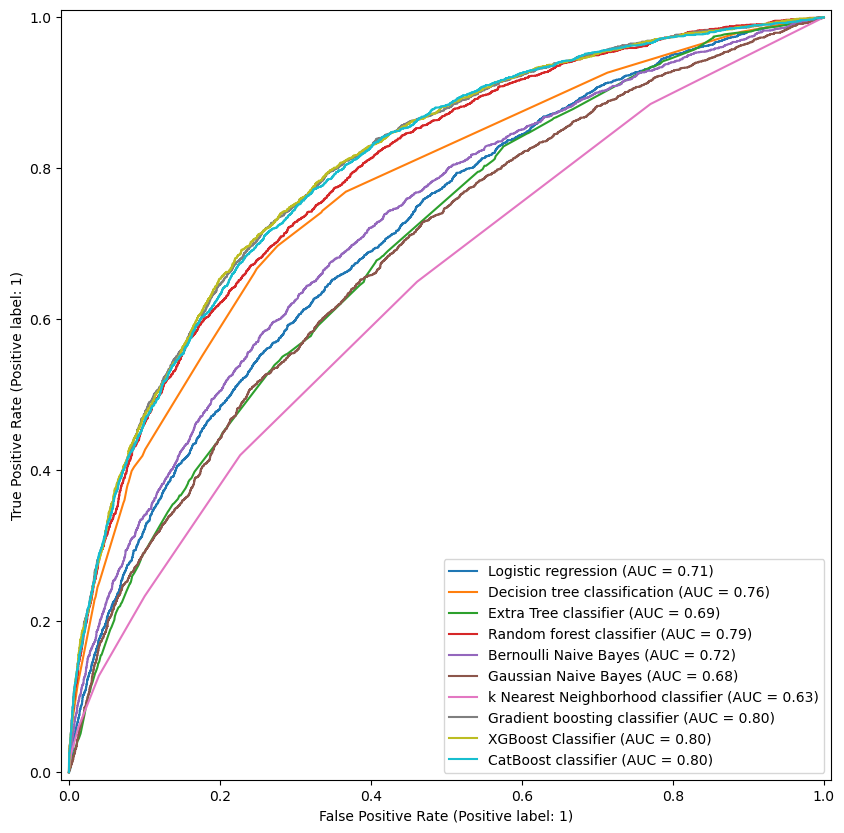

In [90]:
fig, ax = plt.subplots(figsize=(10, 10))

RocCurveDisplay.from_estimator(grid_search_logreg.best_estimator_, X_test, y_test, name='Logistic regression', ax=ax)

RocCurveDisplay.from_estimator(grid_search_dtc.best_estimator_, X_test, y_test,name='Decision tree classification', ax=ax)

RocCurveDisplay.from_estimator(grid_search_ext.best_estimator_, X_test, y_test,name='Extra Tree classifier',ax=ax)

RocCurveDisplay.from_estimator(grid_search_rfc.best_estimator_, X_test, y_test, name='Random forest classifier', ax=ax)

RocCurveDisplay.from_estimator(grid_search_bnb.best_estimator_, X_test, y_test,name='Bernoulli Naive Bayes',ax=ax)

RocCurveDisplay.from_estimator(gnb, X_test, y_test,name='Gaussian Naive Bayes',ax=ax)

RocCurveDisplay.from_estimator(grid_search_kNN.best_estimator_, X_test, y_test, name='k Nearest Neighborhood classifier', ax=ax)

RocCurveDisplay.from_estimator(grid_search_gbc.best_estimator_, X_test, y_test, name='Gradient boosting classifier', ax=ax)

RocCurveDisplay.from_estimator(grid_search_xg.best_estimator_, X_test, y_test, name='XGBoost Classifier', ax=ax)

RocCurveDisplay.from_estimator(grid_search_cb.best_estimator_, X_test, y_test,name='CatBoost classifier',ax=ax)



plt.show()

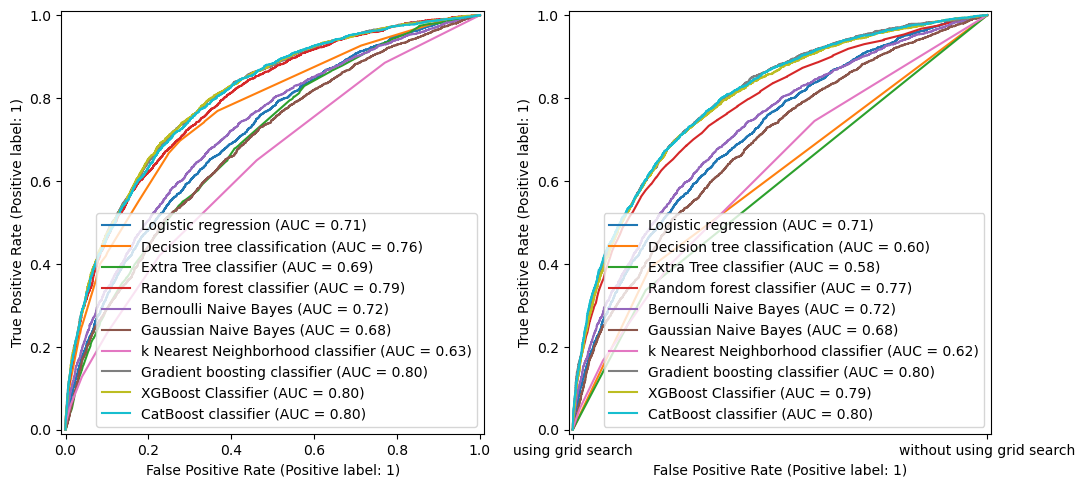

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# using grid search
RocCurveDisplay.from_estimator(grid_search_logreg.best_estimator_, X_test, y_test, name='Logistic regression', ax=ax1)

RocCurveDisplay.from_estimator(grid_search_dtc.best_estimator_, X_test, y_test,name='Decision tree classification', ax=ax1)

RocCurveDisplay.from_estimator(grid_search_ext.best_estimator_, X_test, y_test,name='Extra Tree classifier',ax=ax1)

RocCurveDisplay.from_estimator(grid_search_rfc.best_estimator_, X_test, y_test, name='Random forest classifier', ax=ax1)

RocCurveDisplay.from_estimator(grid_search_bnb.best_estimator_, X_test, y_test,name='Bernoulli Naive Bayes',ax=ax1)

RocCurveDisplay.from_estimator(gnb, X_test, y_test,name='Gaussian Naive Bayes',ax=ax1)

RocCurveDisplay.from_estimator(grid_search_kNN.best_estimator_, X_test, y_test, name='k Nearest Neighborhood classifier', ax=ax1)

RocCurveDisplay.from_estimator(grid_search_gbc.best_estimator_, X_test, y_test, name='Gradient boosting classifier', ax=ax1)

RocCurveDisplay.from_estimator(grid_search_xg.best_estimator_, X_test, y_test, name='XGBoost Classifier', ax=ax1)

RocCurveDisplay.from_estimator(grid_search_cb.best_estimator_, X_test, y_test,name='CatBoost classifier',ax=ax1)


# without using grid search
RocCurveDisplay.from_estimator(logreg, X_test, y_test, name='Logistic regression', ax=ax2)

RocCurveDisplay.from_estimator(dtc, X_test, y_test,name='Decision tree classification', ax=ax2)

RocCurveDisplay.from_estimator(ext, X_test, y_test,name='Extra Tree classifier',ax=ax2)

RocCurveDisplay.from_estimator(rfc, X_test, y_test, name='Random forest classifier', ax=ax2)

RocCurveDisplay.from_estimator(bnb, X_test, y_test,name='Bernoulli Naive Bayes',ax=ax2)

RocCurveDisplay.from_estimator(gnb, X_test, y_test,name='Gaussian Naive Bayes',ax=ax2)

RocCurveDisplay.from_estimator(kNN, X_test, y_test, name='k Nearest Neighborhood classifier', ax=ax2)

RocCurveDisplay.from_estimator(gbc, X_test, y_test, name='Gradient boosting classifier', ax=ax2)

RocCurveDisplay.from_estimator(xg, X_test, y_test, name='XGBoost Classifier', ax=ax2)

RocCurveDisplay.from_estimator(cb, X_test, y_test,name='CatBoost classifier',ax=ax2)


plt.xticks([0,1], ['using grid search', 'without using grid search'])

plt.show()

